# Baseball Case Study Project

In [1]:
from IPython.display import Image
Image(url= "https://www.techrepublic.com/a/hub/i/r/2020/08/20/2f98c64a-7115-4526-9444-e6789caa8ec3/thumbnail/768x432/1d10d6dcf836a994d5e5416ac8527bae/20200818-baseball-karen-2.jpg")

# 1.Introduction

#### Baseball is a bat-and-ball game played between two opposing teams, typically of nine players each, that take turns batting and fielding. The game proceeds when a player on the fielding team, called the pitcher, throws a ball which a player on the batting team tries to hit with a bat. The objective of the offensive team (batting team) is to hit the ball into the field of play, allowing its players to run the bases, having them advance counter-clockwise around four bases to score what are called "runs". The objective of the defensive team (fielding team) is to prevent batters from becoming runners, and to prevent runners' advance around the bases.
#### A run is scored when a runner legally advances around the bases in order and touches home plate (the place where the player started as a batter). The team that scores the most runs by the end of the game is the winner.
#### The first objective of the batting team is to have a player reach first base safely. A player on the batting team who reaches first base without being called "out" can attempt to advance to subsequent bases as a runner, either immediately or during teammates' turns batting. The fielding team tries to prevent runs by getting batters or runners "out", which forces them out of the field of play. Both the pitcher and fielders have methods of getting the batting team's players out. The opposing teams switch back and forth between batting and fielding; the batting team's turn to bat is over once the fielding team records three outs. One turn batting for each team constitutes an inning. A game is usually composed of nine innings, and the team with the greater number of runs at the end of the game wins. If scores are tied at the end of nine innings, extra innings are usually played. Baseball has no game clock, although most games end in the ninth inning.
#### The game consists of 9 innings, usually Both teams get to bat each inning A team's at-bat is over when they get 3 outs in an inning. In Major League Baseball, there are two leagues - the National League and the American League, and they have slightly different rules.
#### A team typically uses multiple pitchers in a game. There is a pitcher who starts the game, called the starting pitcher, and there are relief pitchers, pitchers who replace the starting pitcher late in the game. The other players, called position players, typically play the whole game, but not always. They can be replaced at any time by a bench player, an extra player who didn't start the game.

# 2.Dataset Information

##### Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

##### Output: Number of predicted wins (W)
### There are 25 players on each team. There are 9 defensive positions:
##### Pitcher
##### Catcher
##### First base
##### Second base
##### Third base
##### Shortstop
##### Left field
##### Center field
##### Right field

# 3. Details about the dataset

### Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below. A full list of the variables can be found here.
###### W - Wins
###### R - Runs scored
###### AB - At bats
###### H - Hits by batters
###### 2B - Doubles
###### 3B - Triples
###### HR - Homeruns by batters
###### BB - Walks by batters
###### SO - Strikeouts by batters
###### SB - Stolen bases
###### RA - Opponents runs scored
###### ER - Earned runs allowed
###### ERA - Earned run average
###### CG - Complete games
###### SHO - Shutouts
###### SV - Saves
###### E - Errors
###### Here I am loading the data set into a variable i.e. “bb” and processing the first 30 rows and 17 columns.

# 4.Importing All Necessary libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing
from scipy import stats
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 5. Loading Data Set

In [2]:
df = pd.read_csv('baseball.csv')
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Next_Tmax, Next_Tmin are label columns while remaning are the Features columns.

# 6.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [3]:
df.shape

(30, 17)

#### By using shape I got 30 rows and 17 columns.

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Get all the columns Information by using df.columns.

In [5]:
# checking columns types and null values

pd.set_option('display.max_rows',None)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### Also, most of the column are int64 in nature and ERA is of float64 data type.

In [6]:
# removing the duplicates

df.drop_duplicates(inplace = True)
df.shape

(30, 17)

#### After using dupllicates I can see there is no duplicate value in this dataset.

In [7]:
# replacing all the zero values in CG column.

df['CG'] = df['CG'].replace(0,df['CG'].mean())

In [8]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

#### By Using nunique I got an idea of continuous & Categorical Columns.
#### As in this Dataset most of the columns are continuous to predict Baseball Dataset.

In [9]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.813333  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.503845   4.120177   7.869335   13.958889  
min    478.000000   2.940000   1.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   2.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.466667  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

#### From the Above statistics data show that their is no outliers.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is no null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are not near to 0 values.
#### d) By checking the difference between the 75% and max value there are no outliers.

# 7.Data visualization

### Data visualization
##### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.
##### According to my perception I have done below Data visualization in this Project.
### Pair plot
##### Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.
### Strip Plot
##### A strip plot is a graphical data anlysis technique for summarizing a univariate data set.A strip chart is handy when taking a look at a small set of one-dimensional data. It shows all the data, and since there aren't too many points cluttering the plot, it is informative.A strip is basically a scatter plot where the x axis represents a categorical variable While Y represents Label Column of the Dataset.
### Cat Plot
##### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
### JointPlot
##### Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.Using joint plot to plot the regression line that best fits the data points.
### Violin Plot
##### A violin plot plays a similar role as a box and whisker plot.A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimato It shows the distribution of quantitative data across several levels of one categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
### Line Plot
##### A line plot is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.
### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.
### Factor Plot
##### A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page. The underlying plot generated can be any univariate or bivariate plot. The scatter plot is the most common application.

# Pair Plot

#### Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

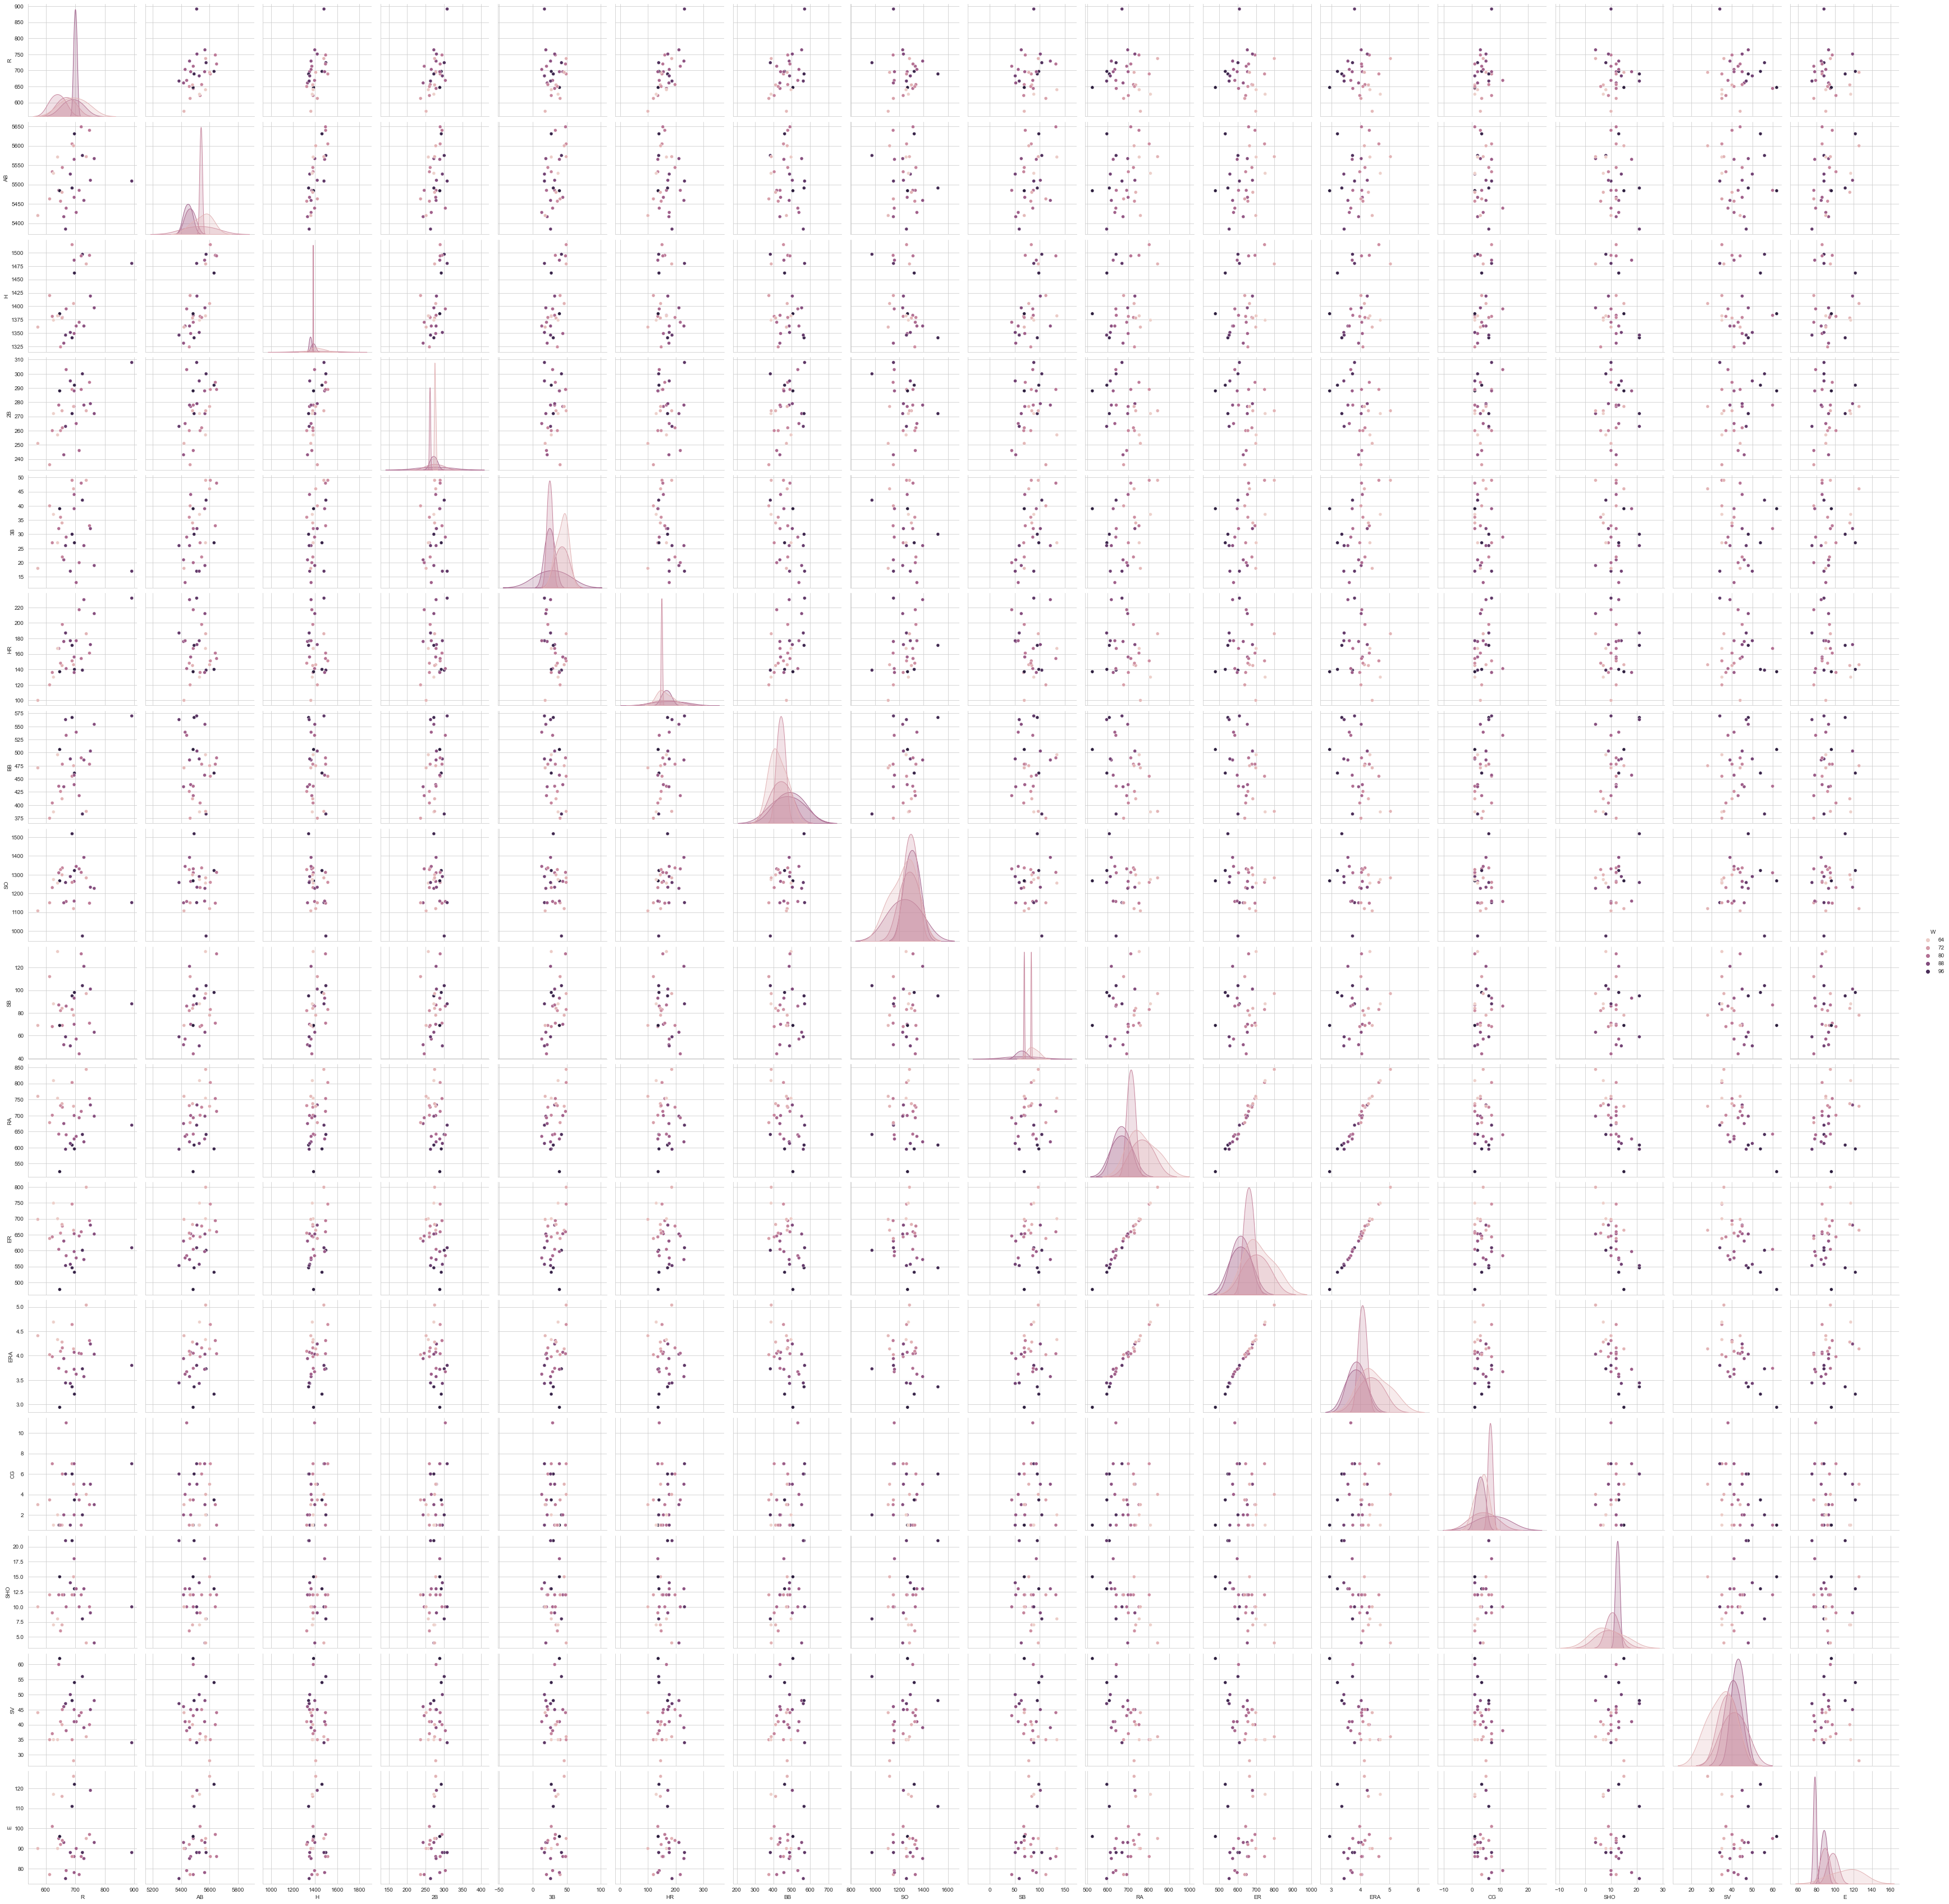

In [10]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="W",height=3);
plt.show()

##### From the above pair plot I can see that all the features have a relationship between all features Columns.

# Violinplot

## R - Runs scored

In [10]:
# W vs R
df['R'].value_counts()

696    2
689    2
703    1
669    1
644    1
720    1
647    1
713    1
650    1
655    1
656    1
724    1
661    1
729    1
667    1
737    1
573    1
613    1
683    1
748    1
622    1
751    1
626    1
694    1
697    1
891    1
764    1
640    1
Name: R, dtype: int64

<AxesSubplot:xlabel='R'>

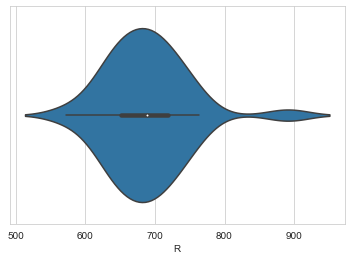

In [17]:
sns.violinplot(x=df['R'], inner = "box")

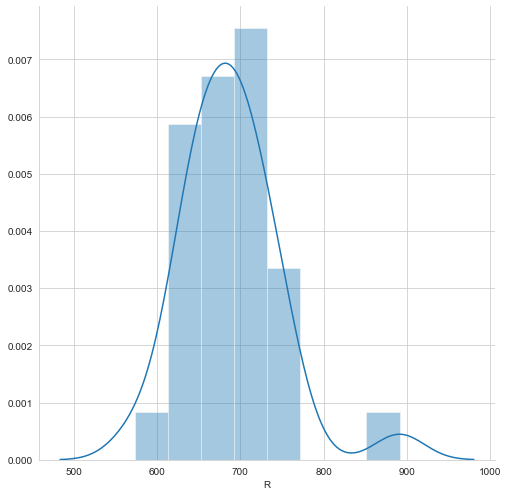

In [23]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"R")\
   .add_legend();
plt.show()

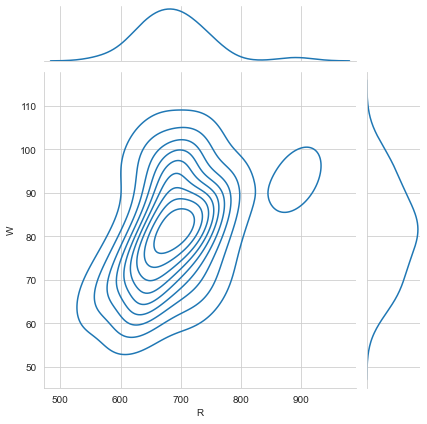

In [29]:
sns.jointplot(df['R'],df['W'], kind='kde')

<AxesSubplot:xlabel='W', ylabel='R'>

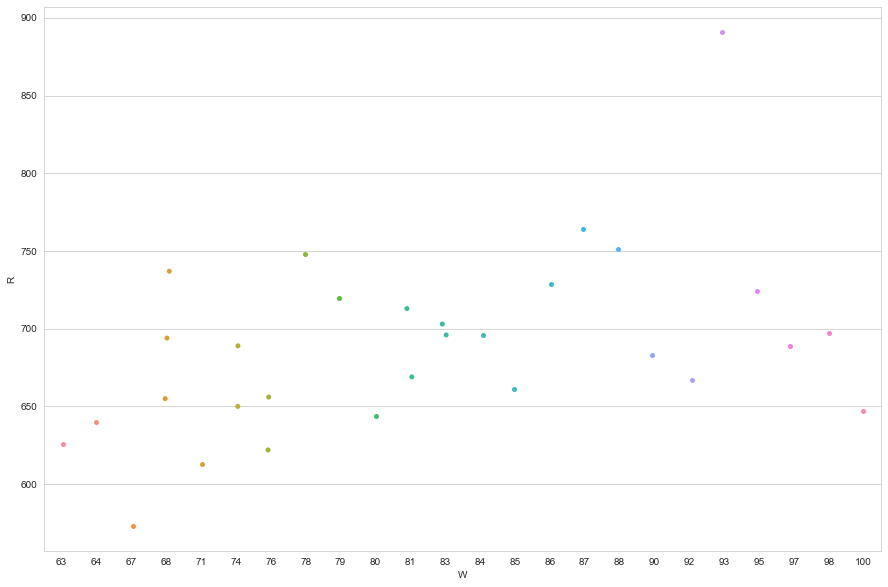

In [41]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['R'])

<AxesSubplot:xlabel='W', ylabel='R'>

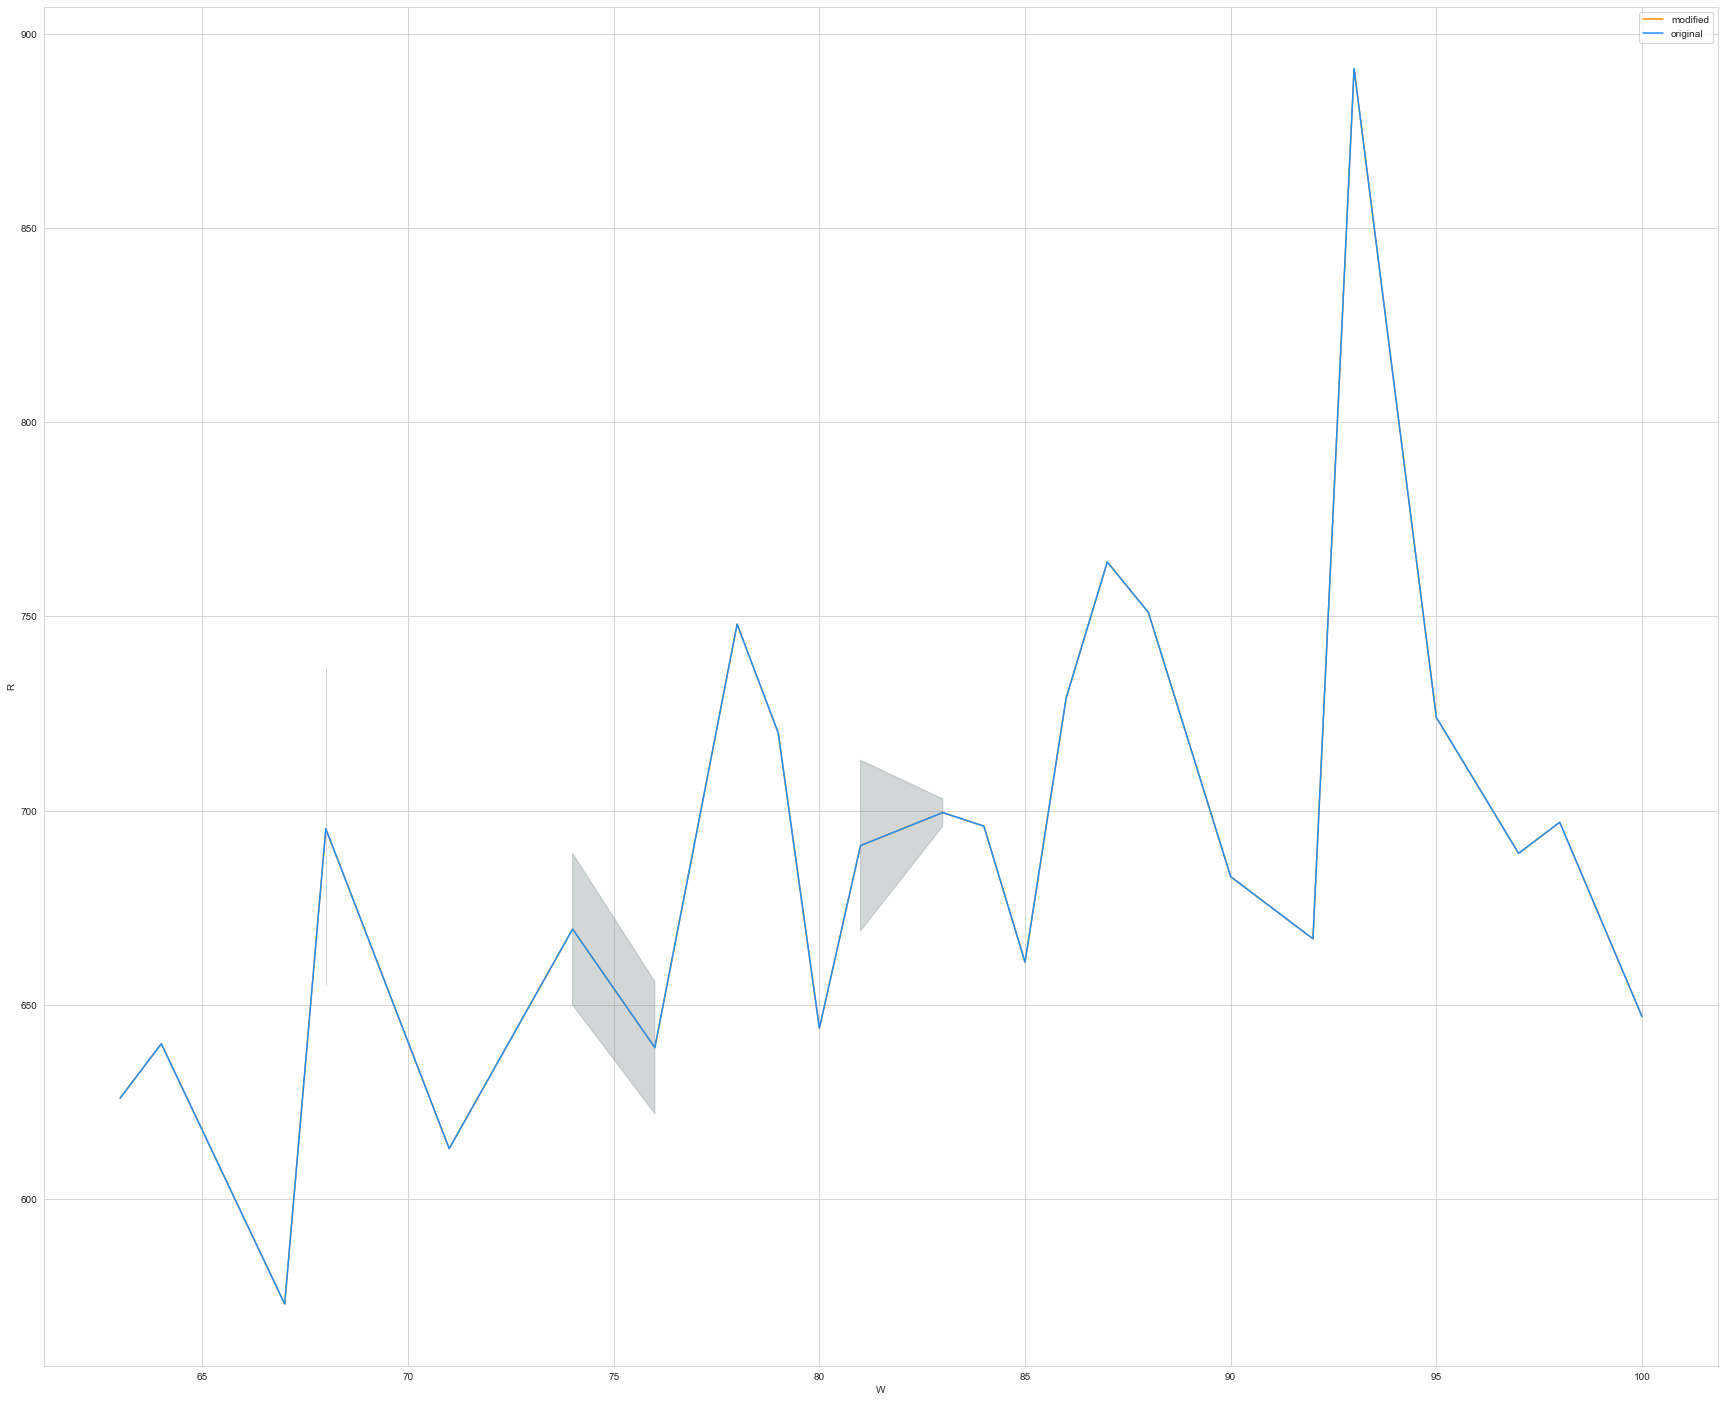

In [34]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['R'].interpolate(), color='darkorange', label = 'modified')
sns.lineplot(x=df['W'], y=df['R'].fillna(np.inf), color='dodgerblue', label = 'original')

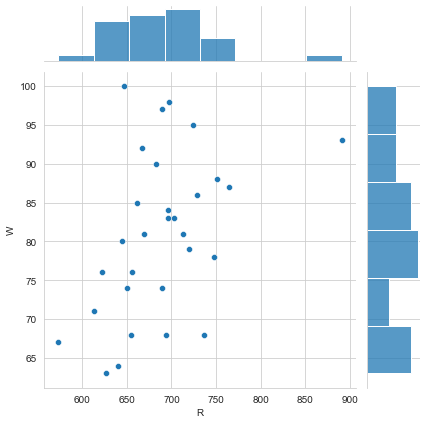

In [35]:
sns.jointplot(df['R'],df['W'])

#### From The Above Plots And Charts I can see 696 runs have been scored which is highest among all the matches of baseball.

## AB - At bats

In [11]:
# W vs AB
df['AB'].value_counts()

5485    2
5631    1
5467    1
5572    1
5509    1
5575    1
5640    1
5385    1
5567    1
5511    1
5649    1
5459    1
5480    1
5463    1
5529    1
5533    1
5565    1
5439    1
5600    1
5527    1
5605    1
5544    1
5417    1
5484    1
5420    1
5491    1
5428    1
5457    1
5571    1
Name: AB, dtype: int64

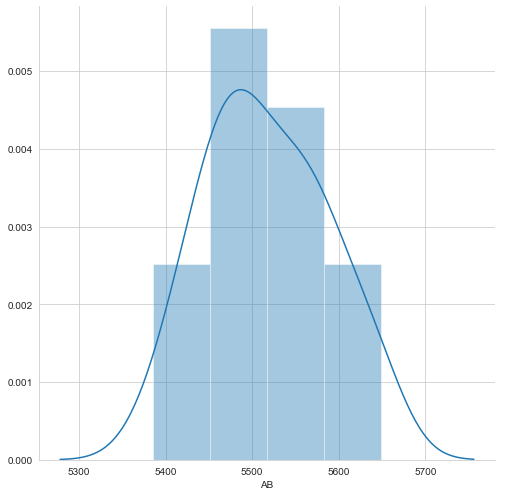

In [20]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"AB")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='AB'>

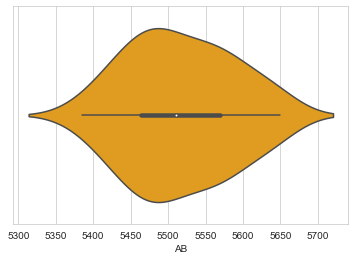

In [22]:
sns.violinplot(x=df['AB'], inner = "box", color='orange')

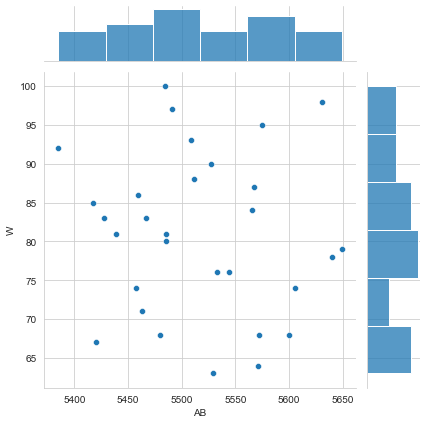

In [27]:
sns.jointplot(df['AB'],df['W'])

<AxesSubplot:xlabel='W', ylabel='AB'>

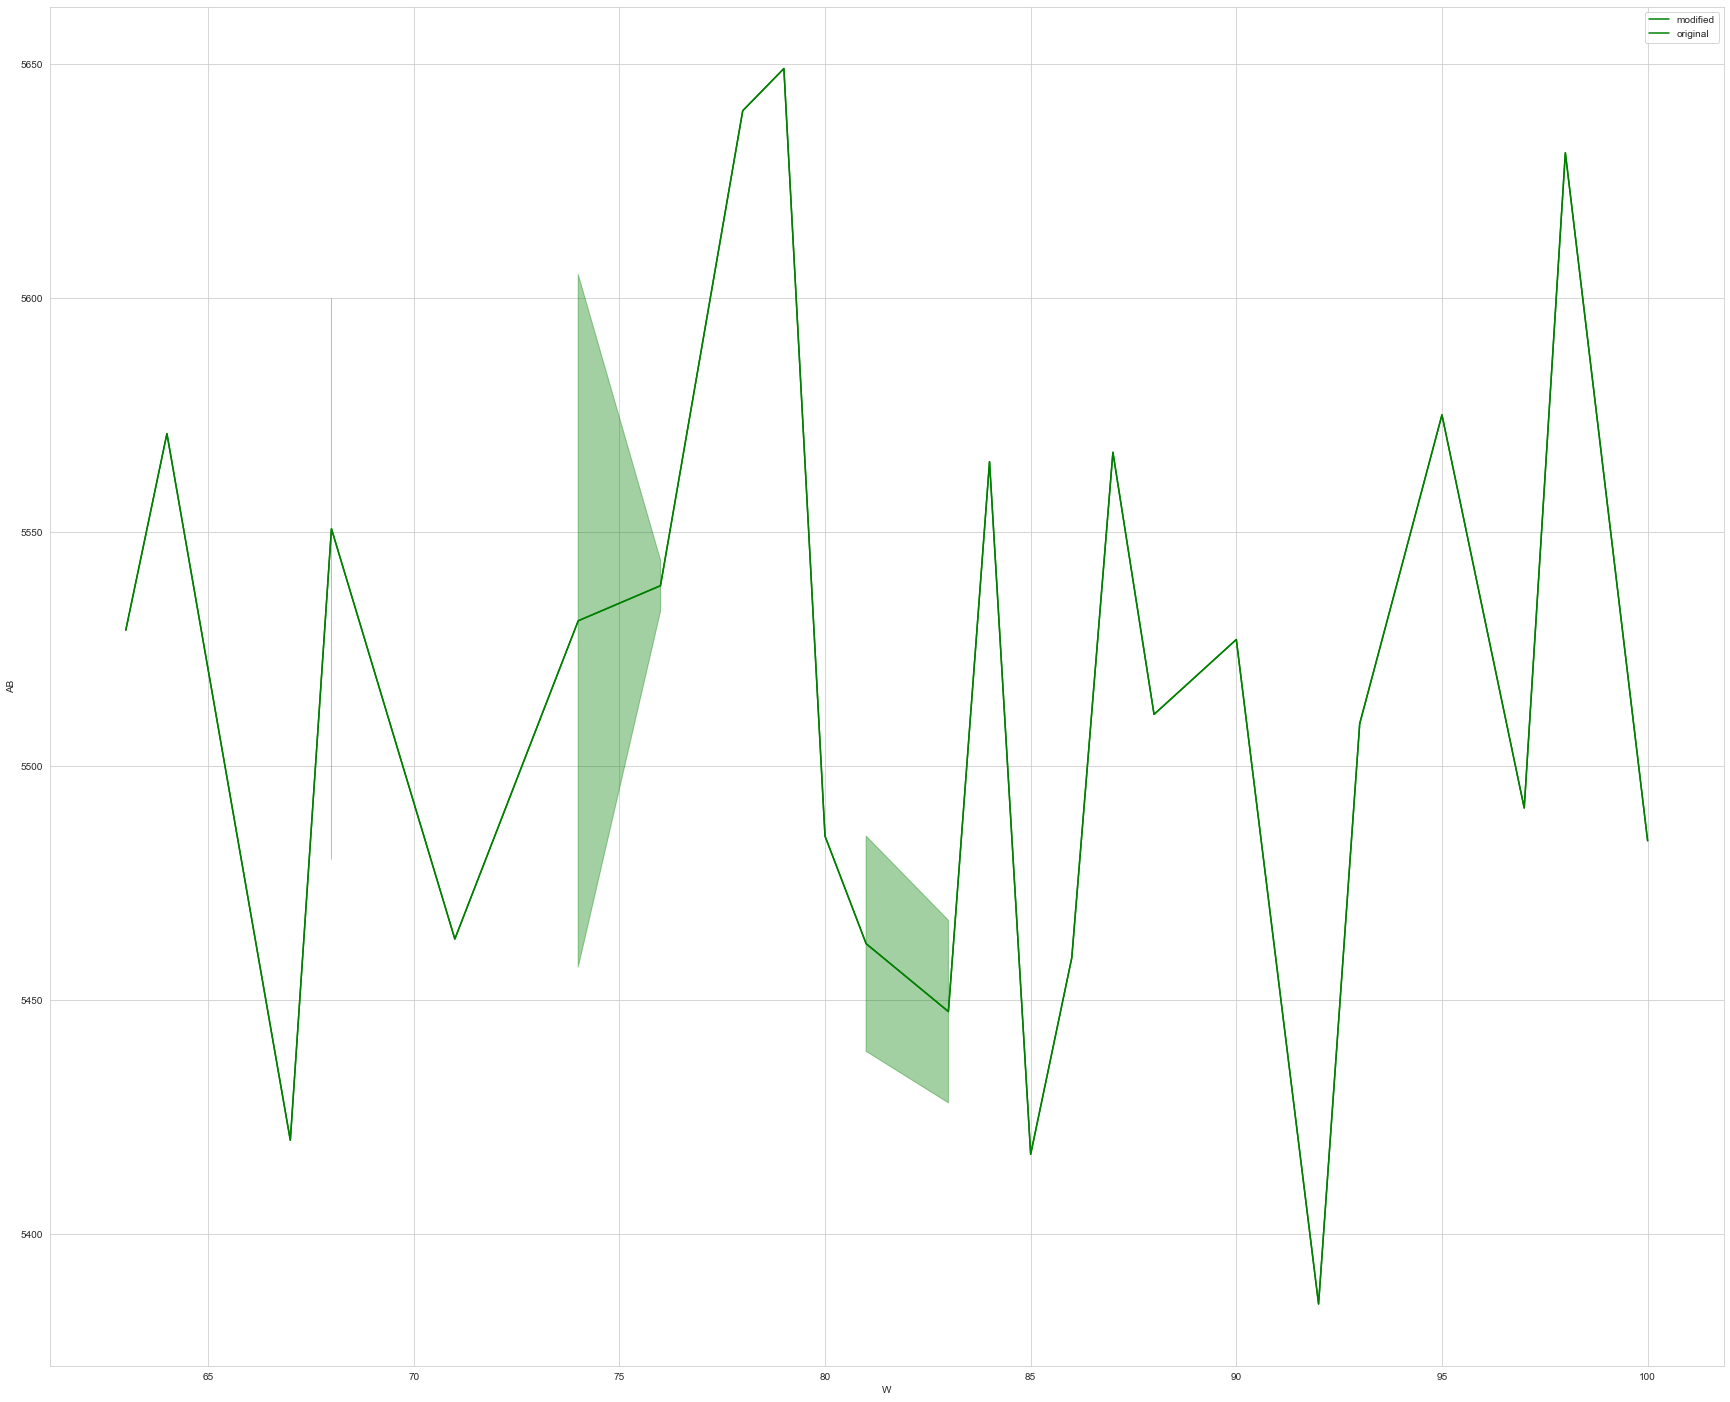

In [36]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['AB'].interpolate(), color='green', label = 'modified')
sns.lineplot(x=df['W'], y=df['AB'].fillna(np.inf), color='green', label = 'original')

<AxesSubplot:xlabel='W', ylabel='AB'>

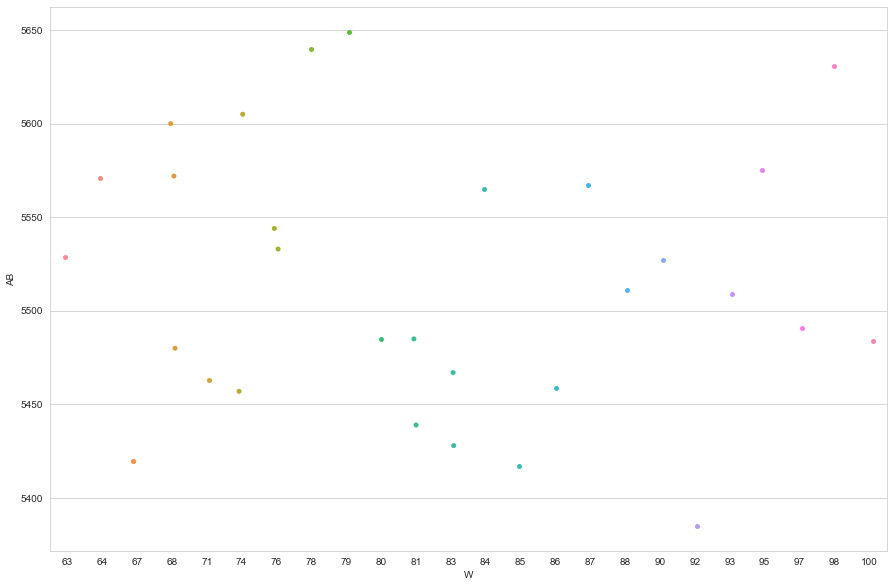

In [53]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['AB'])

#### From The Above Plots And Charts I can see 5485 runs have been scored while batting first which is highest runs in baseball.

## H - Hits by batters

In [12]:
# W vs H
df['H'].value_counts()

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

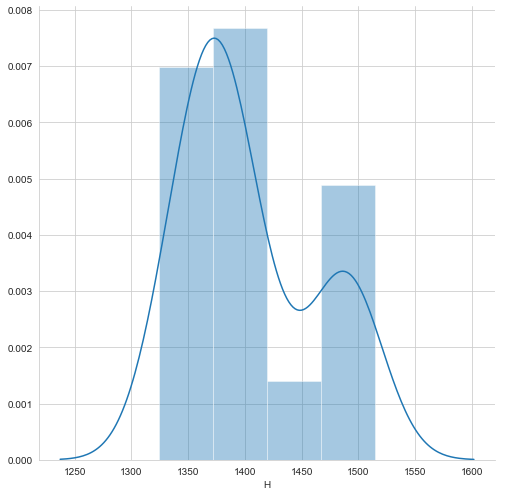

In [42]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"H")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='H'>

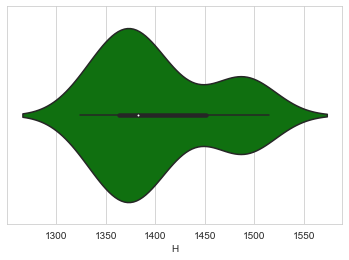

In [43]:
sns.violinplot(x=df['H'], inner = "box", color='green')

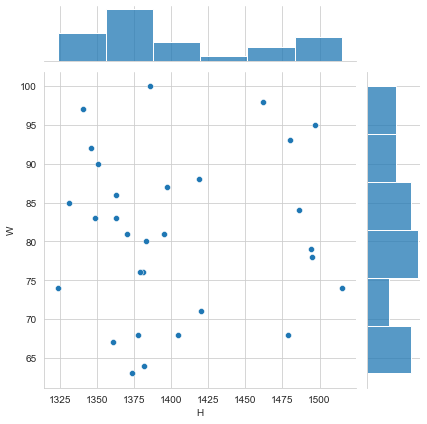

In [44]:
sns.jointplot(df['H'],df['W'])

<AxesSubplot:xlabel='W', ylabel='H'>

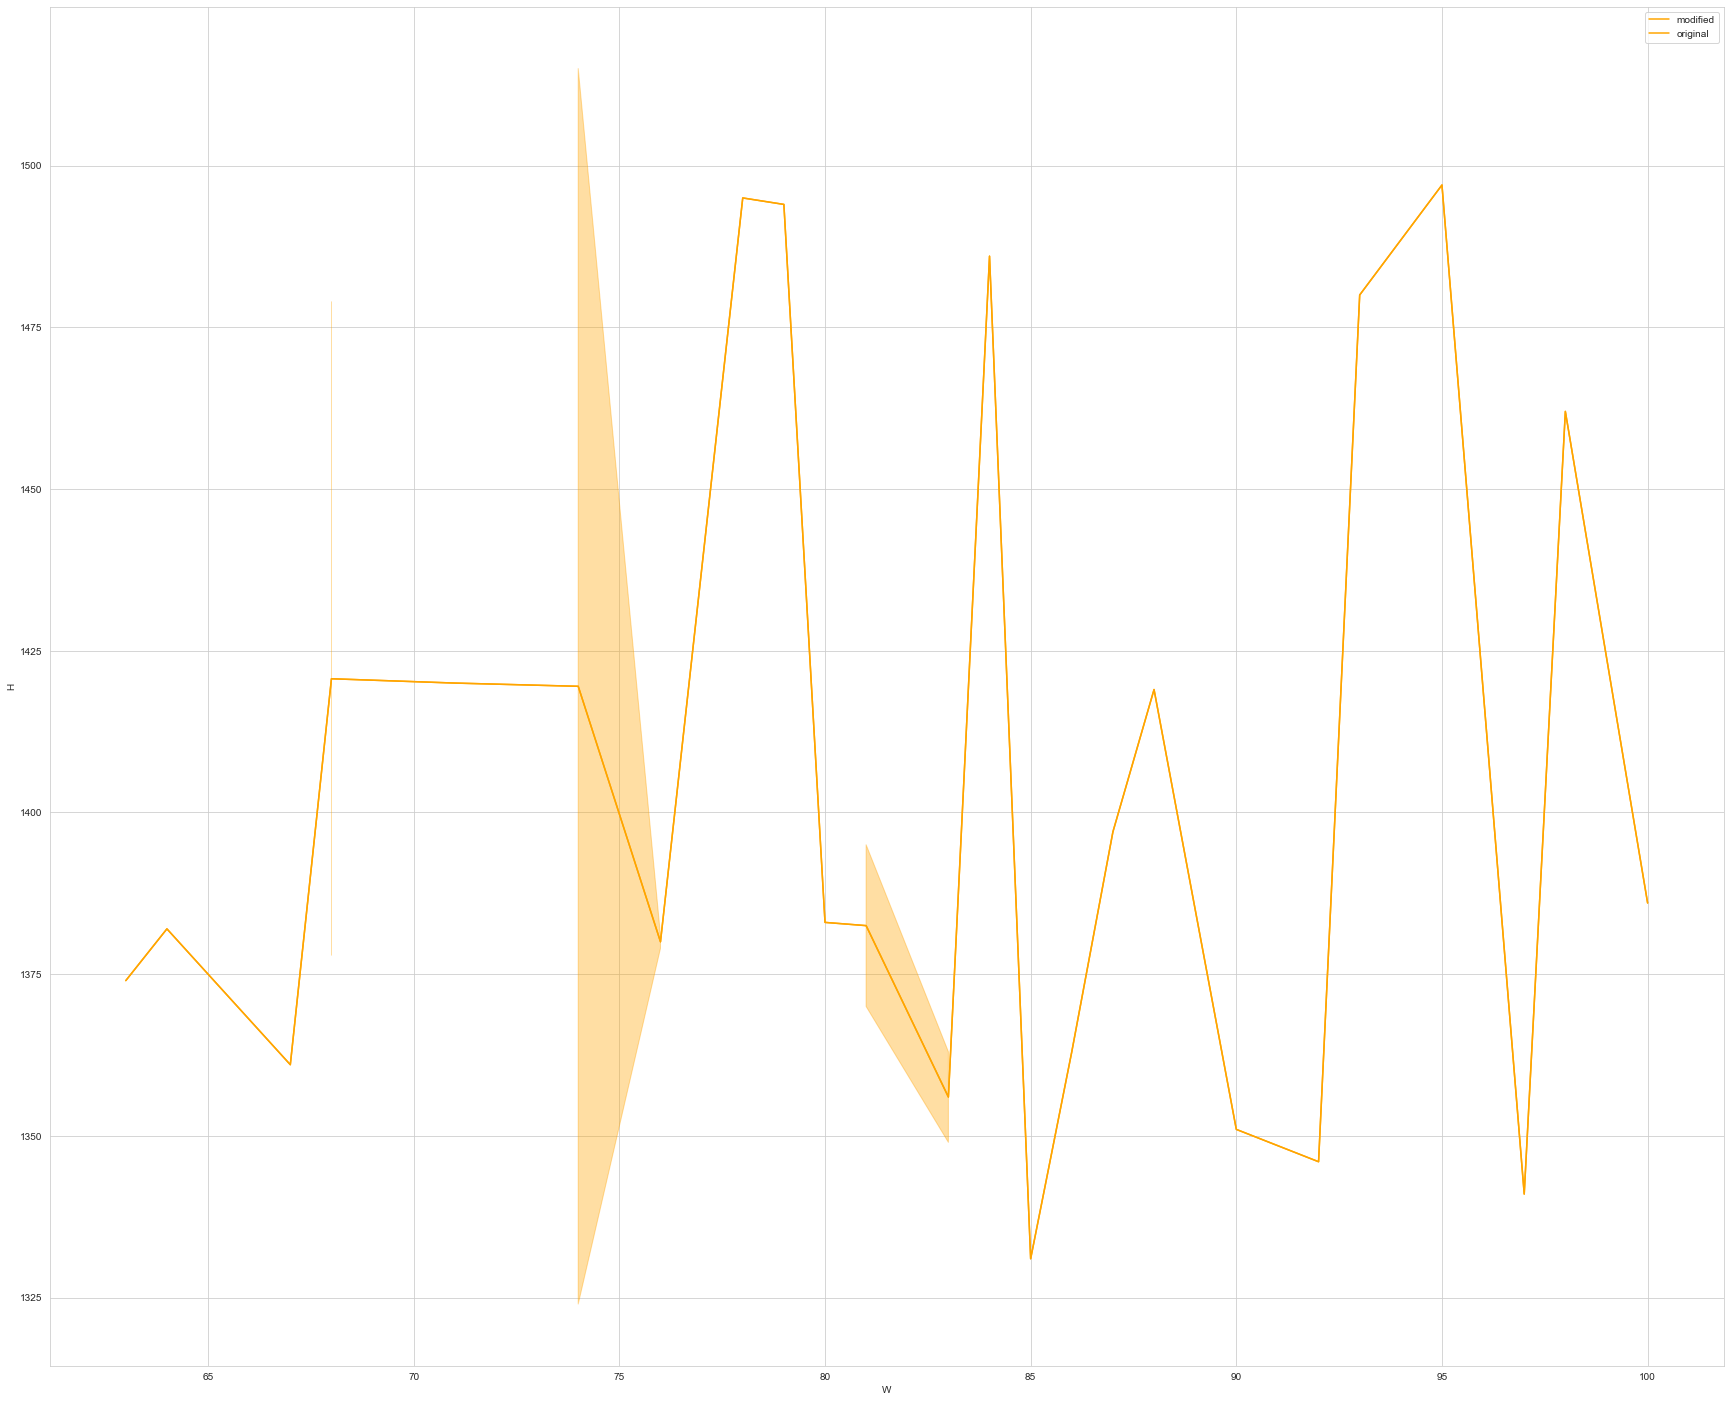

In [45]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['H'].interpolate(), color='orange', label = 'modified')
sns.lineplot(x=df['W'], y=df['H'].fillna(np.inf), color='orange', label = 'original')

<AxesSubplot:xlabel='W', ylabel='H'>

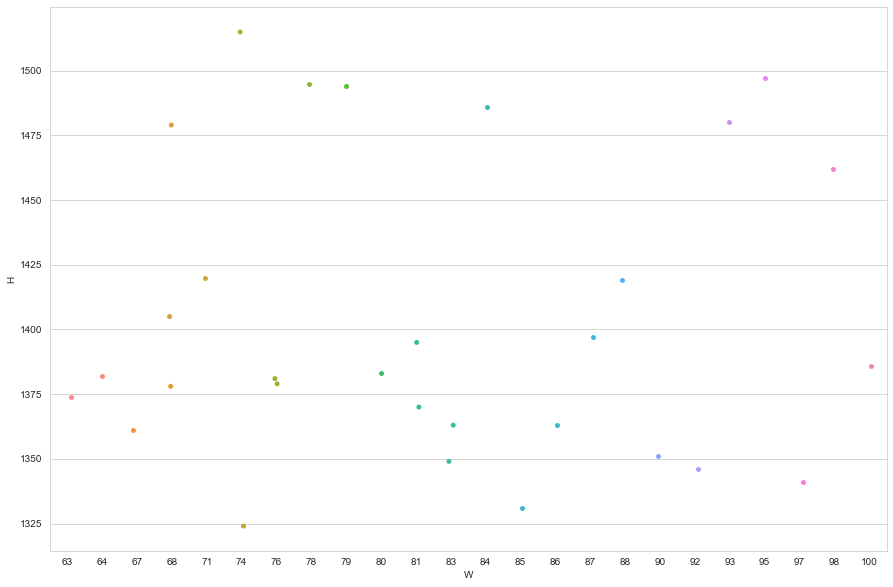

In [52]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['H'])

#### From The Above Plots And Charts I can see 13683 runs have been hits in baseball dataset.

## 2B - Doubles

In [13]:
# W vs 2B
df['2B'].value_counts()

272    3
288    2
278    2
289    2
277    2
260    2
274    2
251    1
236    1
294    1
295    1
262    1
265    1
257    1
263    1
292    1
303    1
243    1
308    1
246    1
279    1
300    1
Name: 2B, dtype: int64

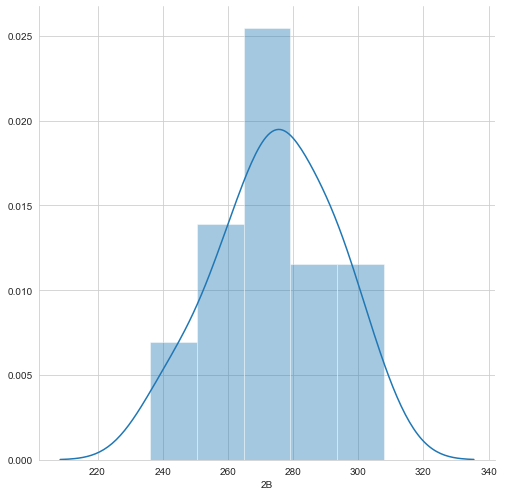

In [47]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"2B")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='2B'>

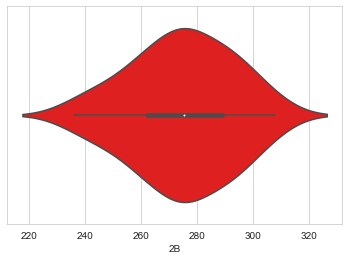

In [48]:
sns.violinplot(x=df['2B'], inner = "box", color='red')

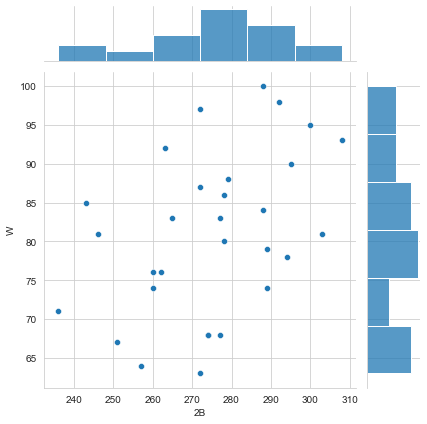

In [49]:
sns.jointplot(df['2B'],df['W'])

<AxesSubplot:xlabel='W', ylabel='2B'>

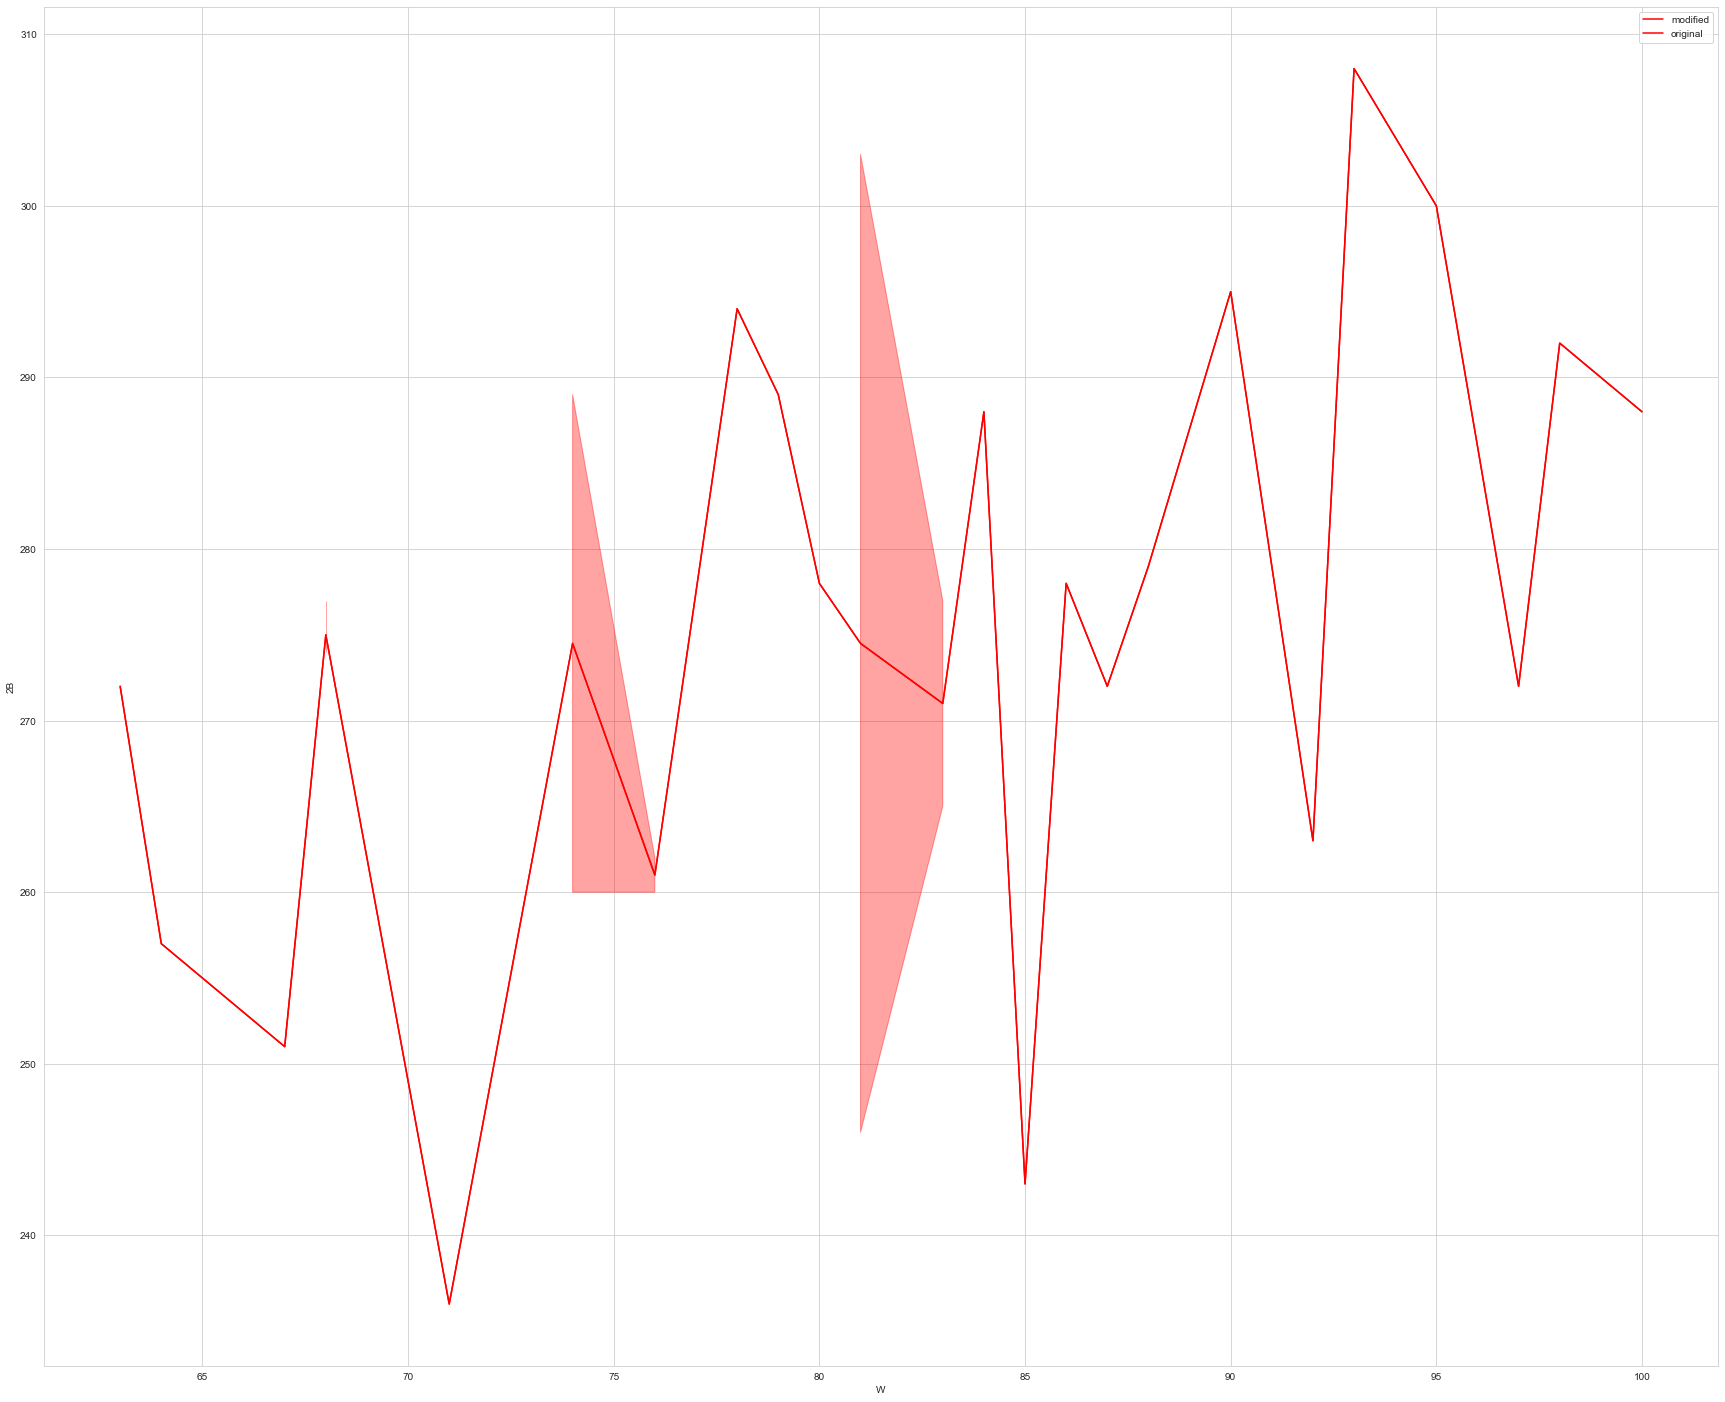

In [51]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['2B'].interpolate(), color='red', label = 'modified')
sns.lineplot(x=df['W'], y=df['2B'].fillna(np.inf), color='red', label = 'original')

<AxesSubplot:xlabel='W', ylabel='2B'>

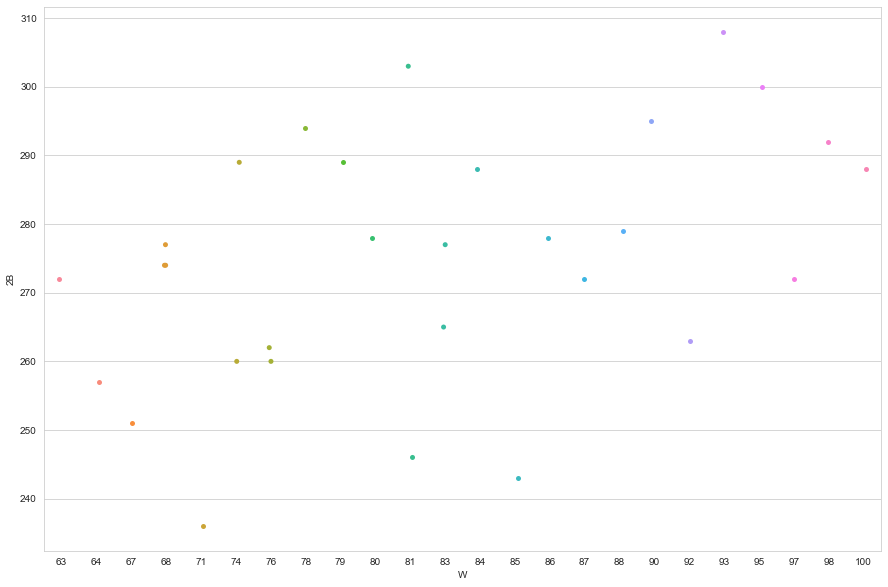

In [54]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['2B'])

#### From The Above Plots And Charts I can see 272 doubles have been taken in this dataset.

## 3B - Triples

In [14]:
# W vs 3B
df['3B'].value_counts()

27    3
32    2
17    2
26    2
39    2
49    2
44    1
33    1
34    1
36    1
37    1
40    1
42    1
30    1
13    1
46    1
29    1
18    1
19    1
20    1
21    1
22    1
48    1
Name: 3B, dtype: int64

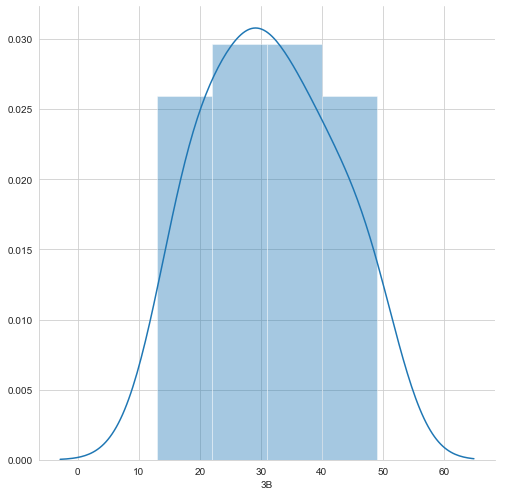

In [55]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"3B")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='3B'>

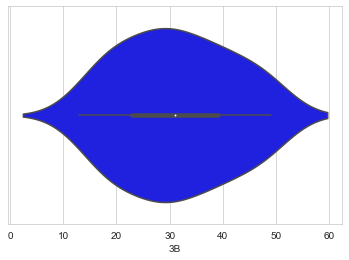

In [56]:
sns.violinplot(x=df['3B'], inner = "box", color='blue')

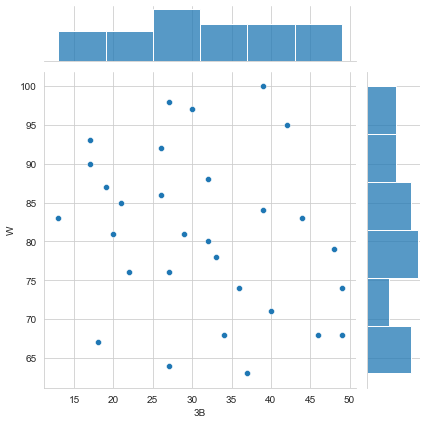

In [57]:
sns.jointplot(df['3B'],df['W'])

<AxesSubplot:xlabel='W', ylabel='3B'>

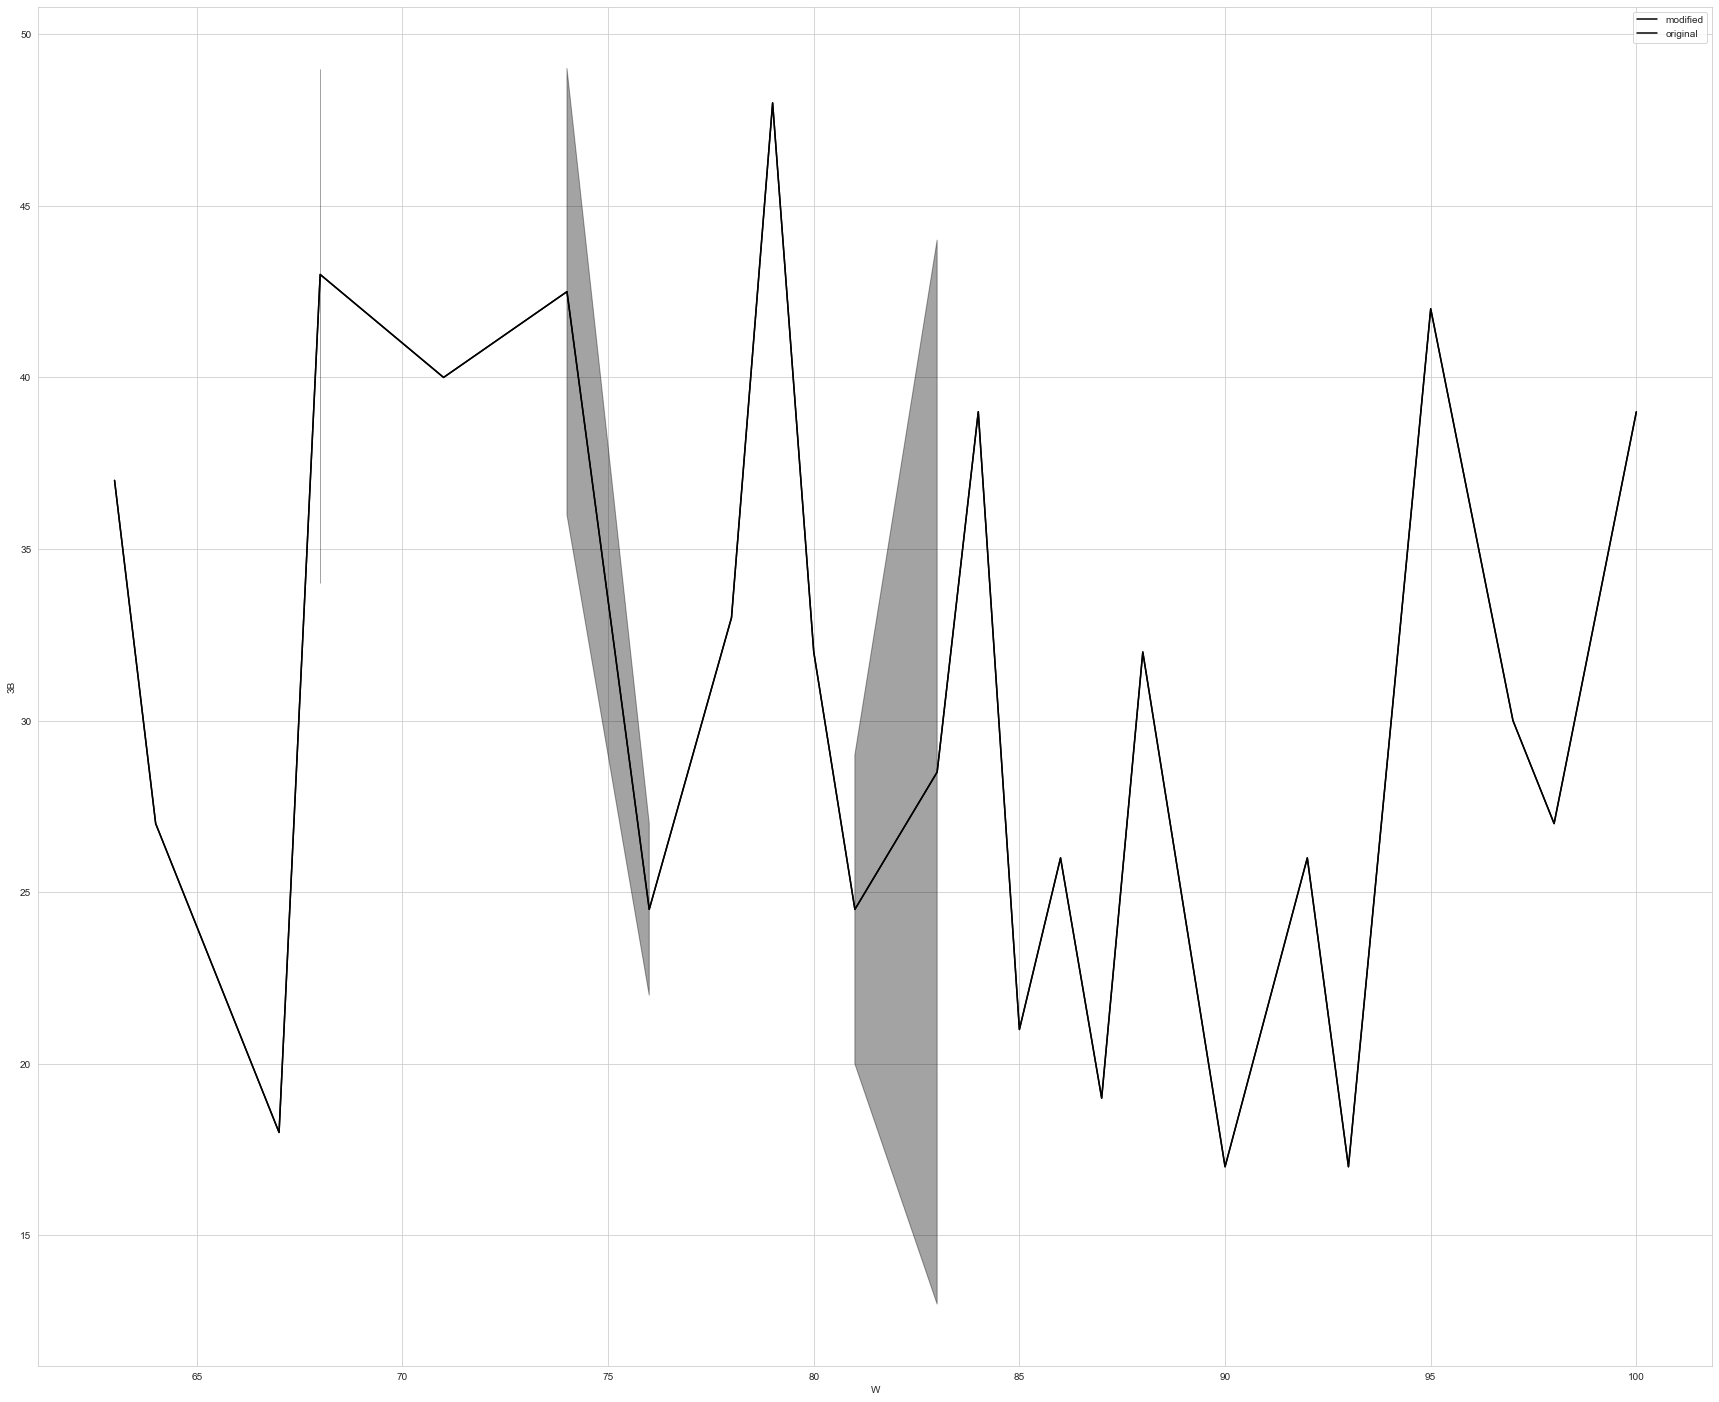

In [58]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['3B'].interpolate(), color='black', label = 'modified')
sns.lineplot(x=df['W'], y=df['3B'].fillna(np.inf), color='black', label = 'original')

<AxesSubplot:xlabel='W', ylabel='3B'>

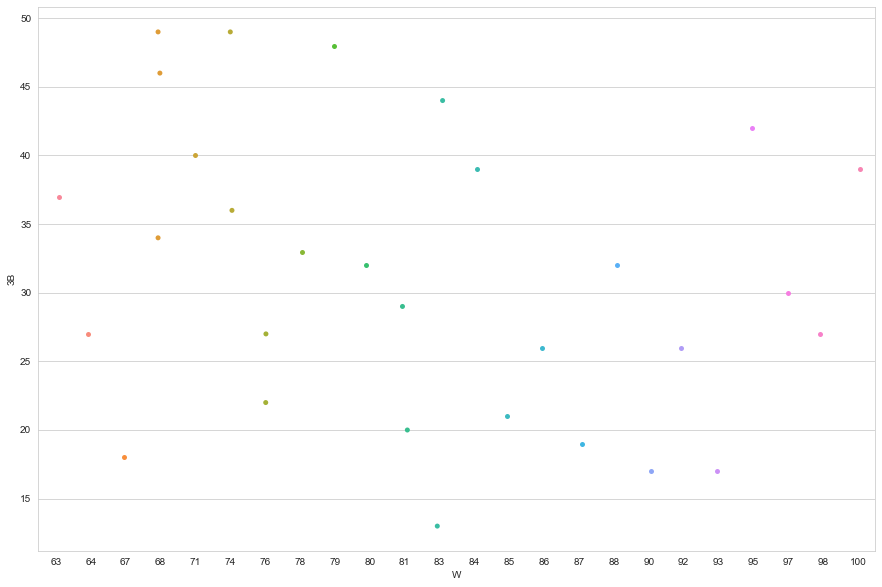

In [59]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['3B'])

#### From The Above Plots And Charts I can see 27 triples have been taken in this dataset.

# HR -  Homeruns by batters

In [15]:
# W vs HR
df['HR'].value_counts()

177    2
136    2
167    2
187    1
151    1
198    1
148    1
137    1
139    1
140    1
141    1
145    1
146    1
212    1
154    1
217    1
186    1
156    1
161    1
100    1
230    1
232    1
171    1
172    1
176    1
120    1
130    1
Name: HR, dtype: int64

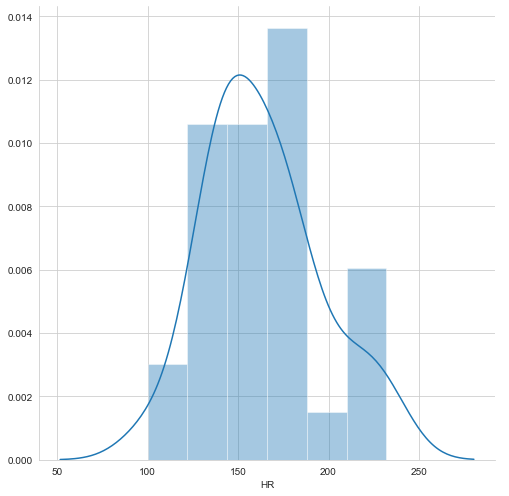

In [60]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"HR")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='HR'>

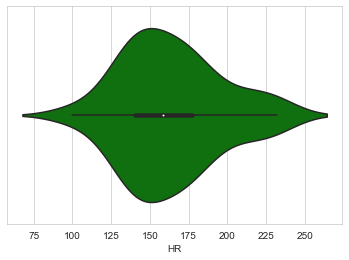

In [61]:
sns.violinplot(x=df['HR'], inner = "box", color='green')

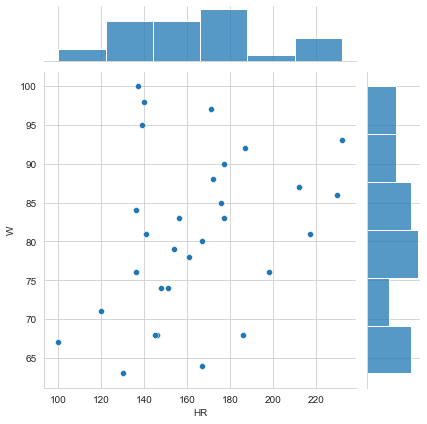

In [62]:
sns.jointplot(df['HR'],df['W'])

<AxesSubplot:xlabel='W', ylabel='HR'>

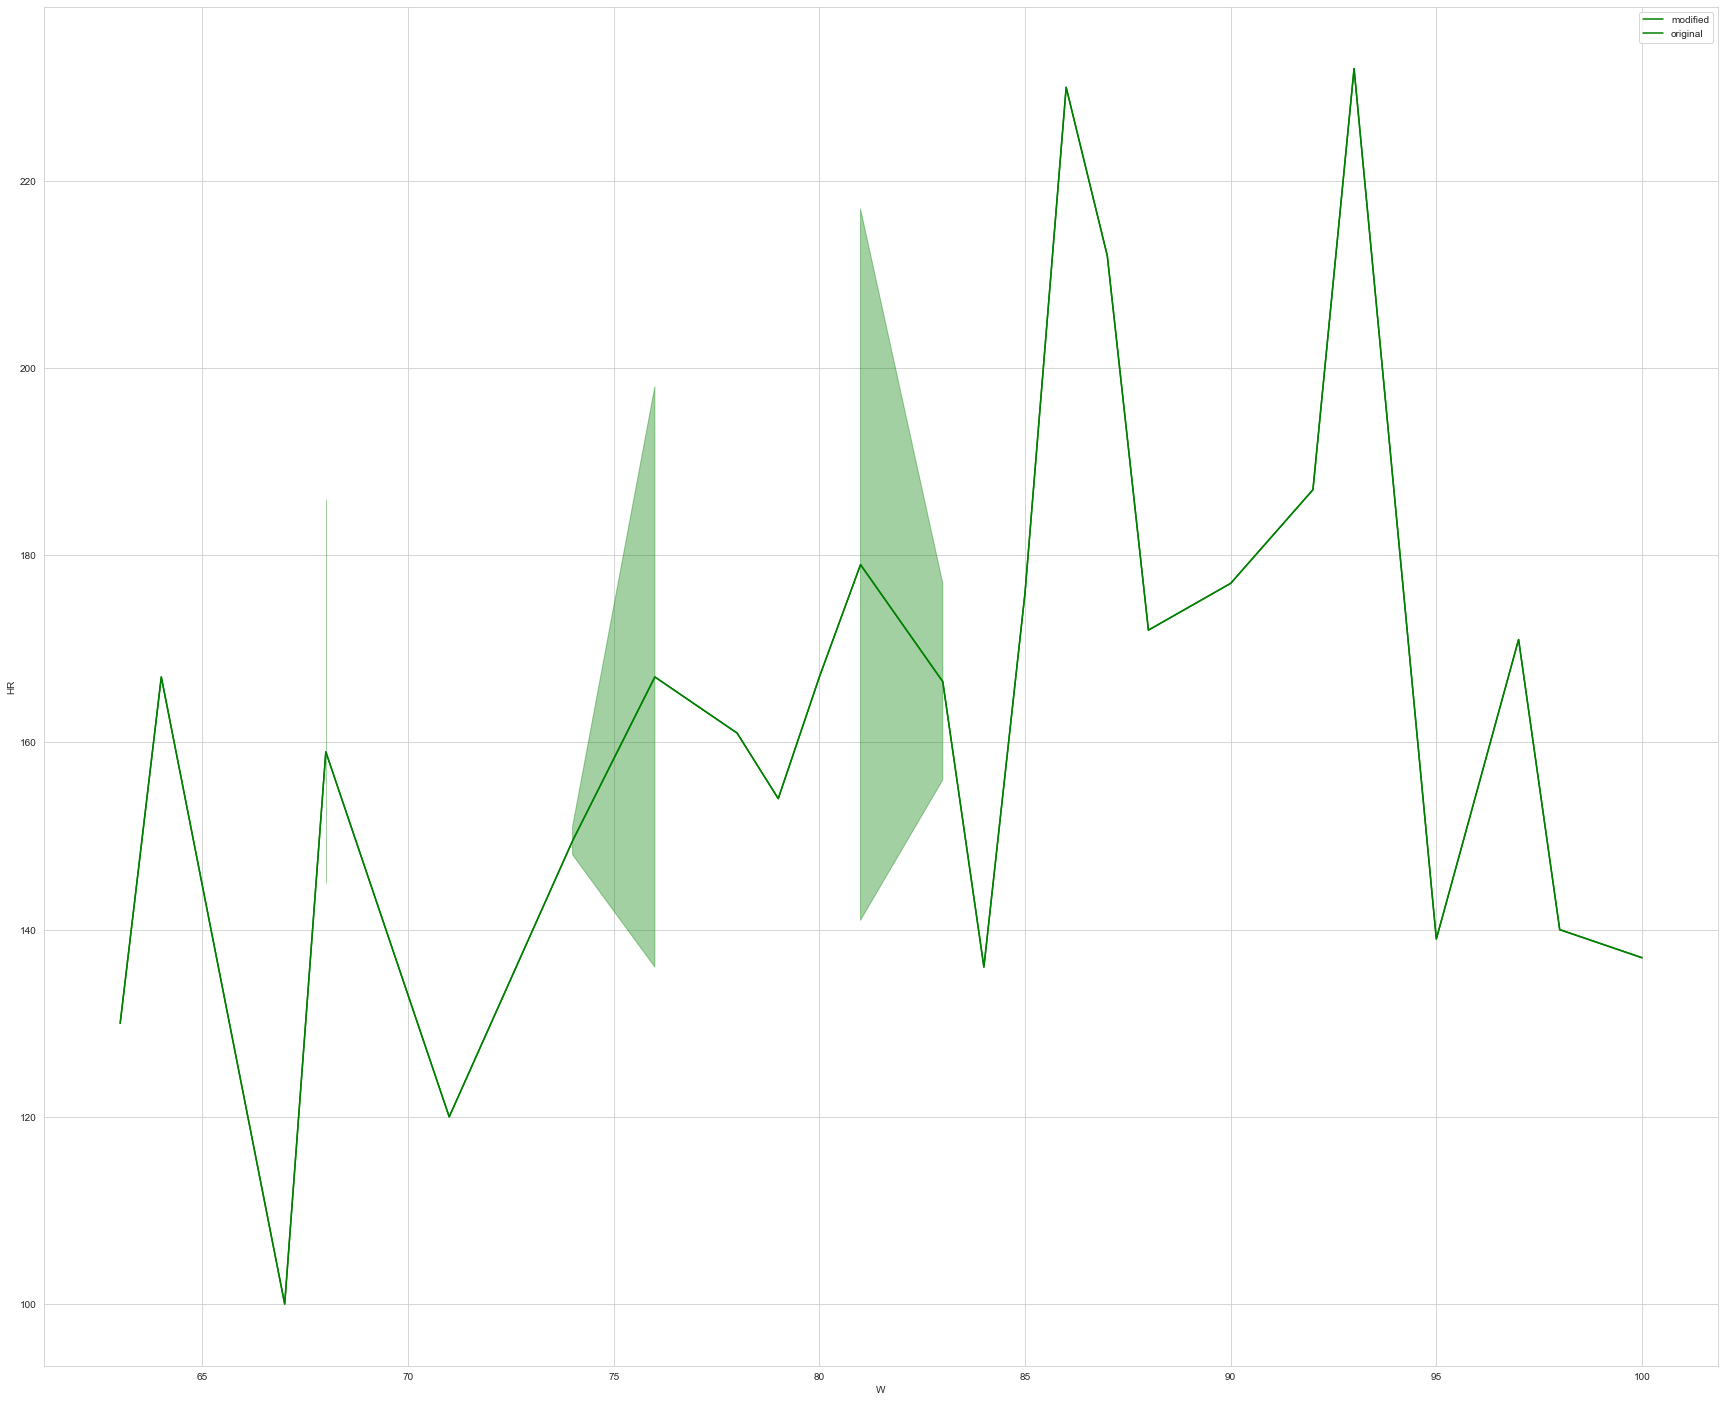

In [64]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['HR'].interpolate(), color='green', label = 'modified')
sns.lineplot(x=df['W'], y=df['HR'].fillna(np.inf), color='green', label = 'original')

<AxesSubplot:xlabel='W', ylabel='HR'>

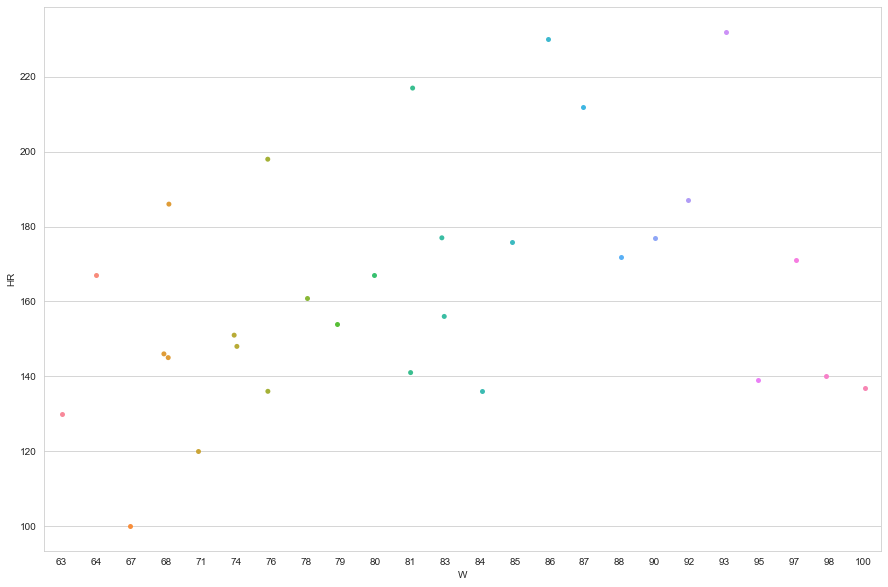

In [65]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['HR'])

#### From The Above Plots And Charts I can see 177 homeruns have been scored  in this dataset.

# BB - Walks by batters

In [16]:
# W vs BB
df['BB'].value_counts()

478    2
570    1
471    1
490    1
439    1
455    1
388    1
457    1
461    1
375    1
426    1
435    1
404    1
533    1
383    1
539    1
475    1
412    1
418    1
486    1
488    1
554    1
496    1
563    1
436    1
567    1
503    1
506    1
387    1
Name: BB, dtype: int64

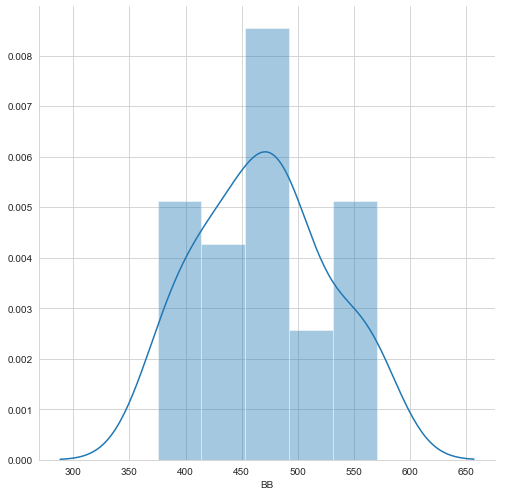

In [66]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"BB")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='BB'>

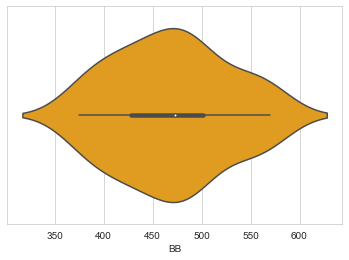

In [67]:
sns.violinplot(x=df['BB'], inner = "box", color='orange')

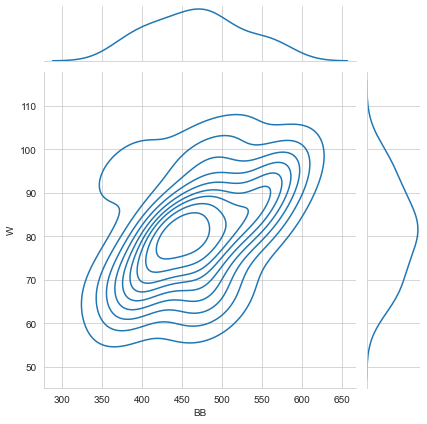

In [68]:
sns.jointplot(df['BB'],df['W'],kind='kde')

<AxesSubplot:xlabel='W', ylabel='BB'>

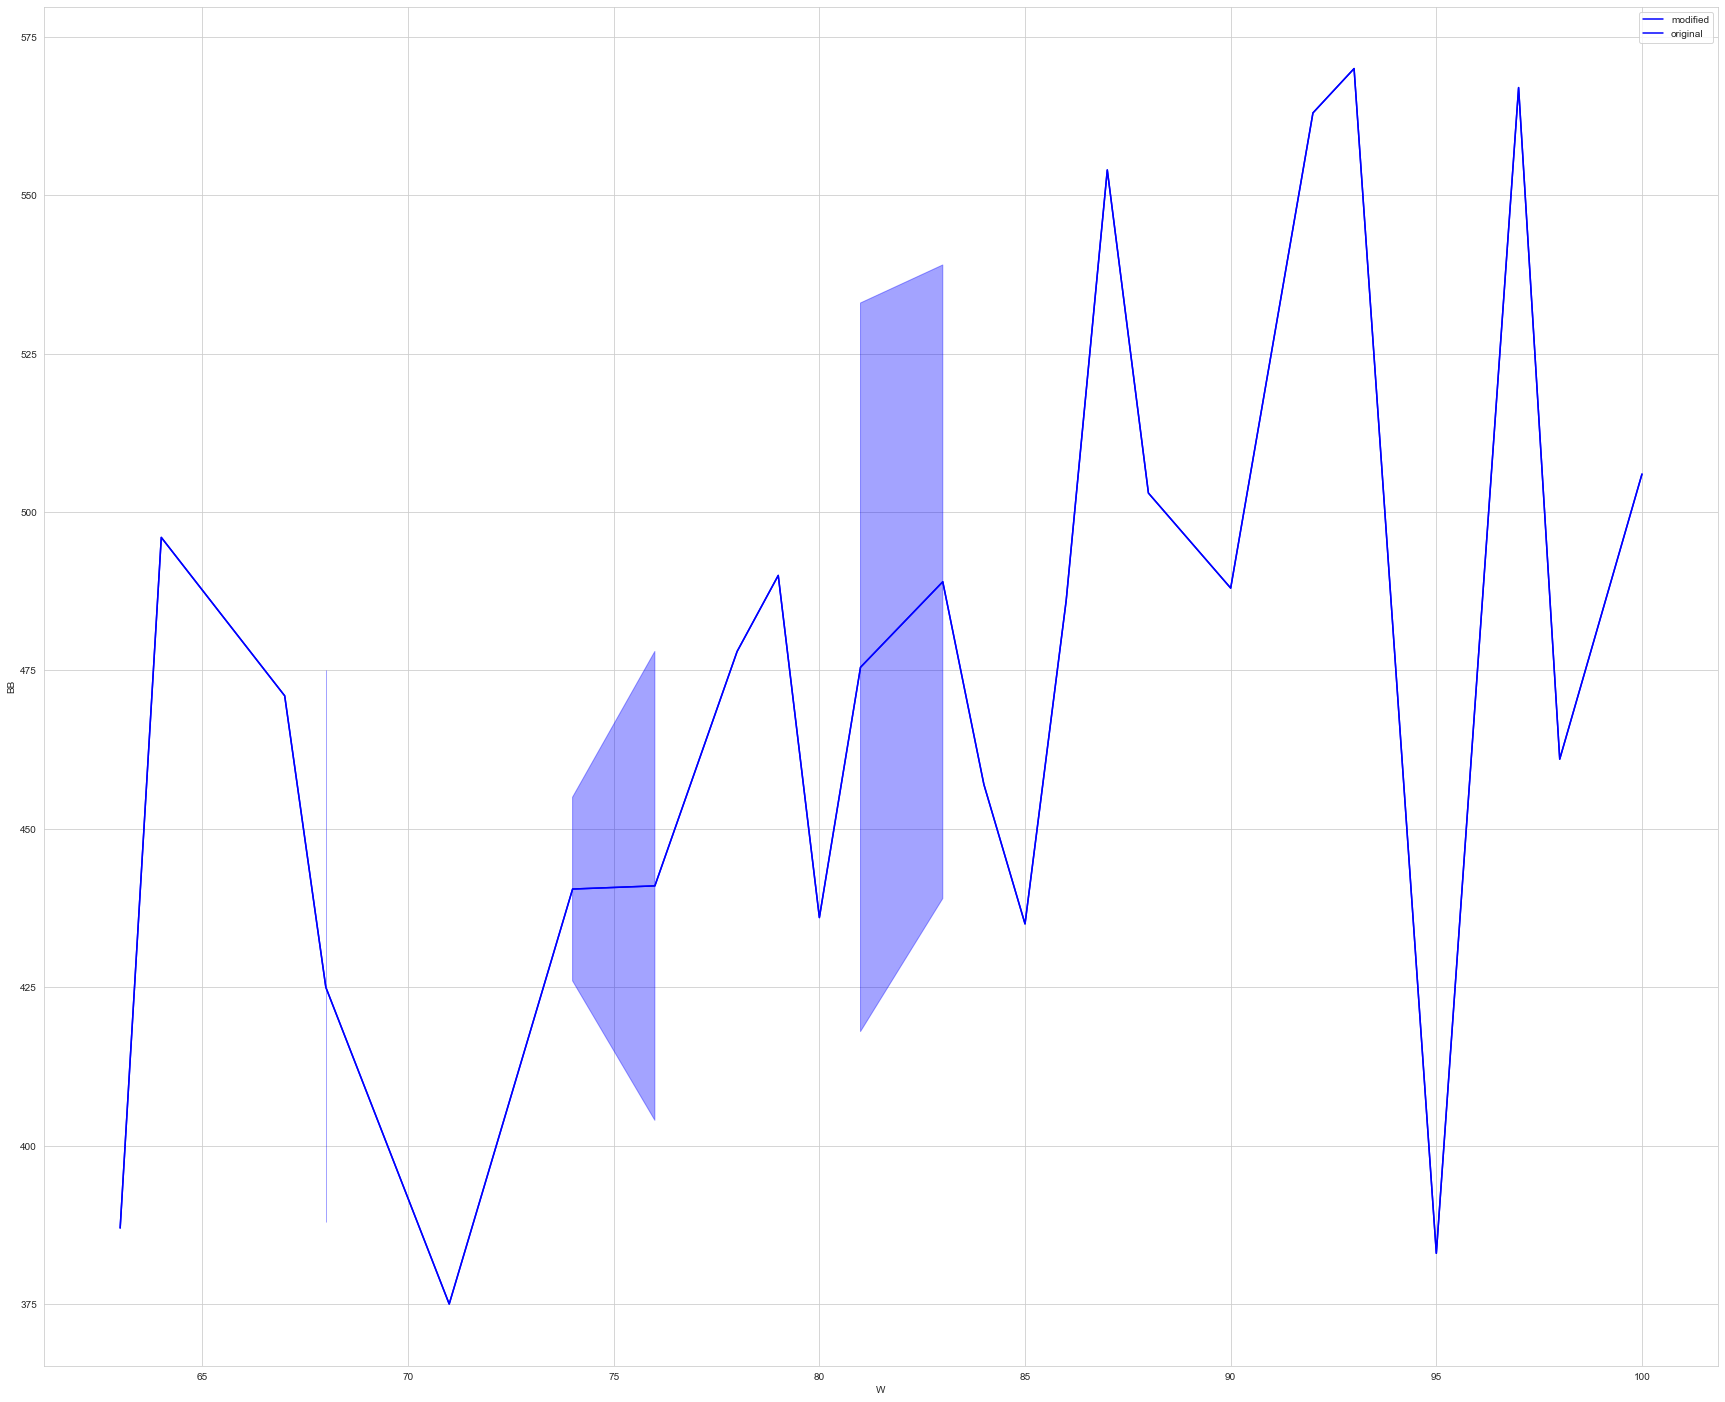

In [69]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['BB'].interpolate(), color='blue', label = 'modified')
sns.lineplot(x=df['W'], y=df['BB'].fillna(np.inf), color='blue', label = 'original')

<AxesSubplot:xlabel='W', ylabel='BB'>

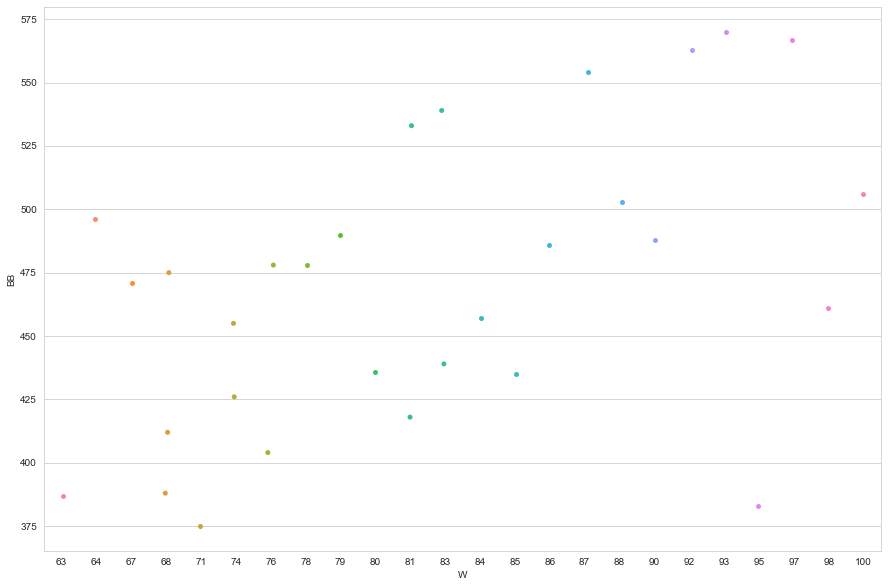

In [70]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['BB'])

#### From The Above Plots And Charts I can see 478 walk by a batters have been scored in this dataset.

# SO - Strikeouts by batters	 

In [17]:
# W vs SO
df['SO'].value_counts()

1150    2
1151    1
1119    1
1267    1
1283    1
1157    1
1159    1
1290    1
1227    1
973     1
1299    1
1231    1
1233    1
1107    1
1310    1
1312    1
1255    1
1322    1
1259    1
1264    1
1327    1
1392    1
1331    1
1258    1
1336    1
1274    1
1518    1
1148    1
1344    1
Name: SO, dtype: int64

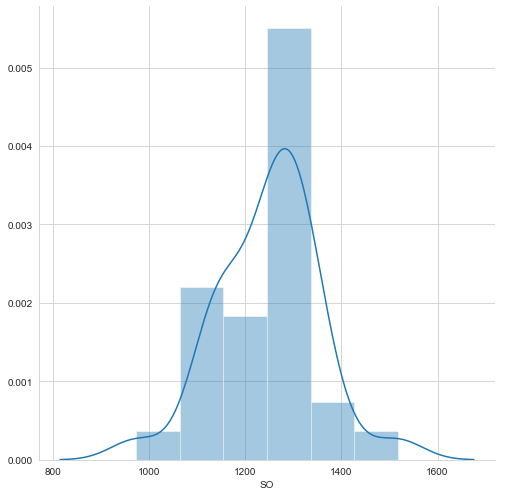

In [71]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"SO")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='SO'>

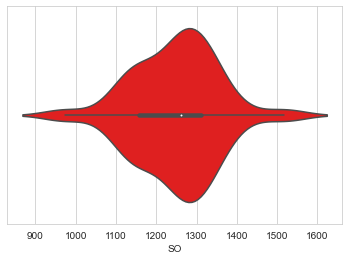

In [72]:
sns.violinplot(x=df['SO'], inner = "box", color='red')

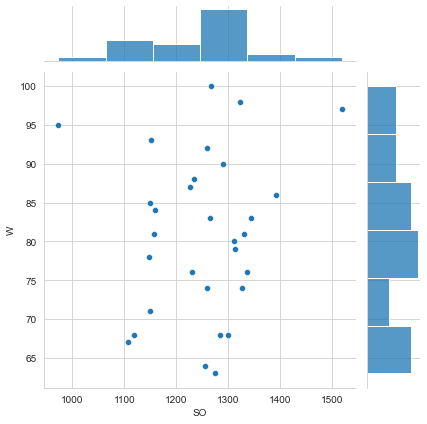

In [74]:
sns.jointplot(df['SO'],df['W'])

<AxesSubplot:xlabel='W', ylabel='SO'>

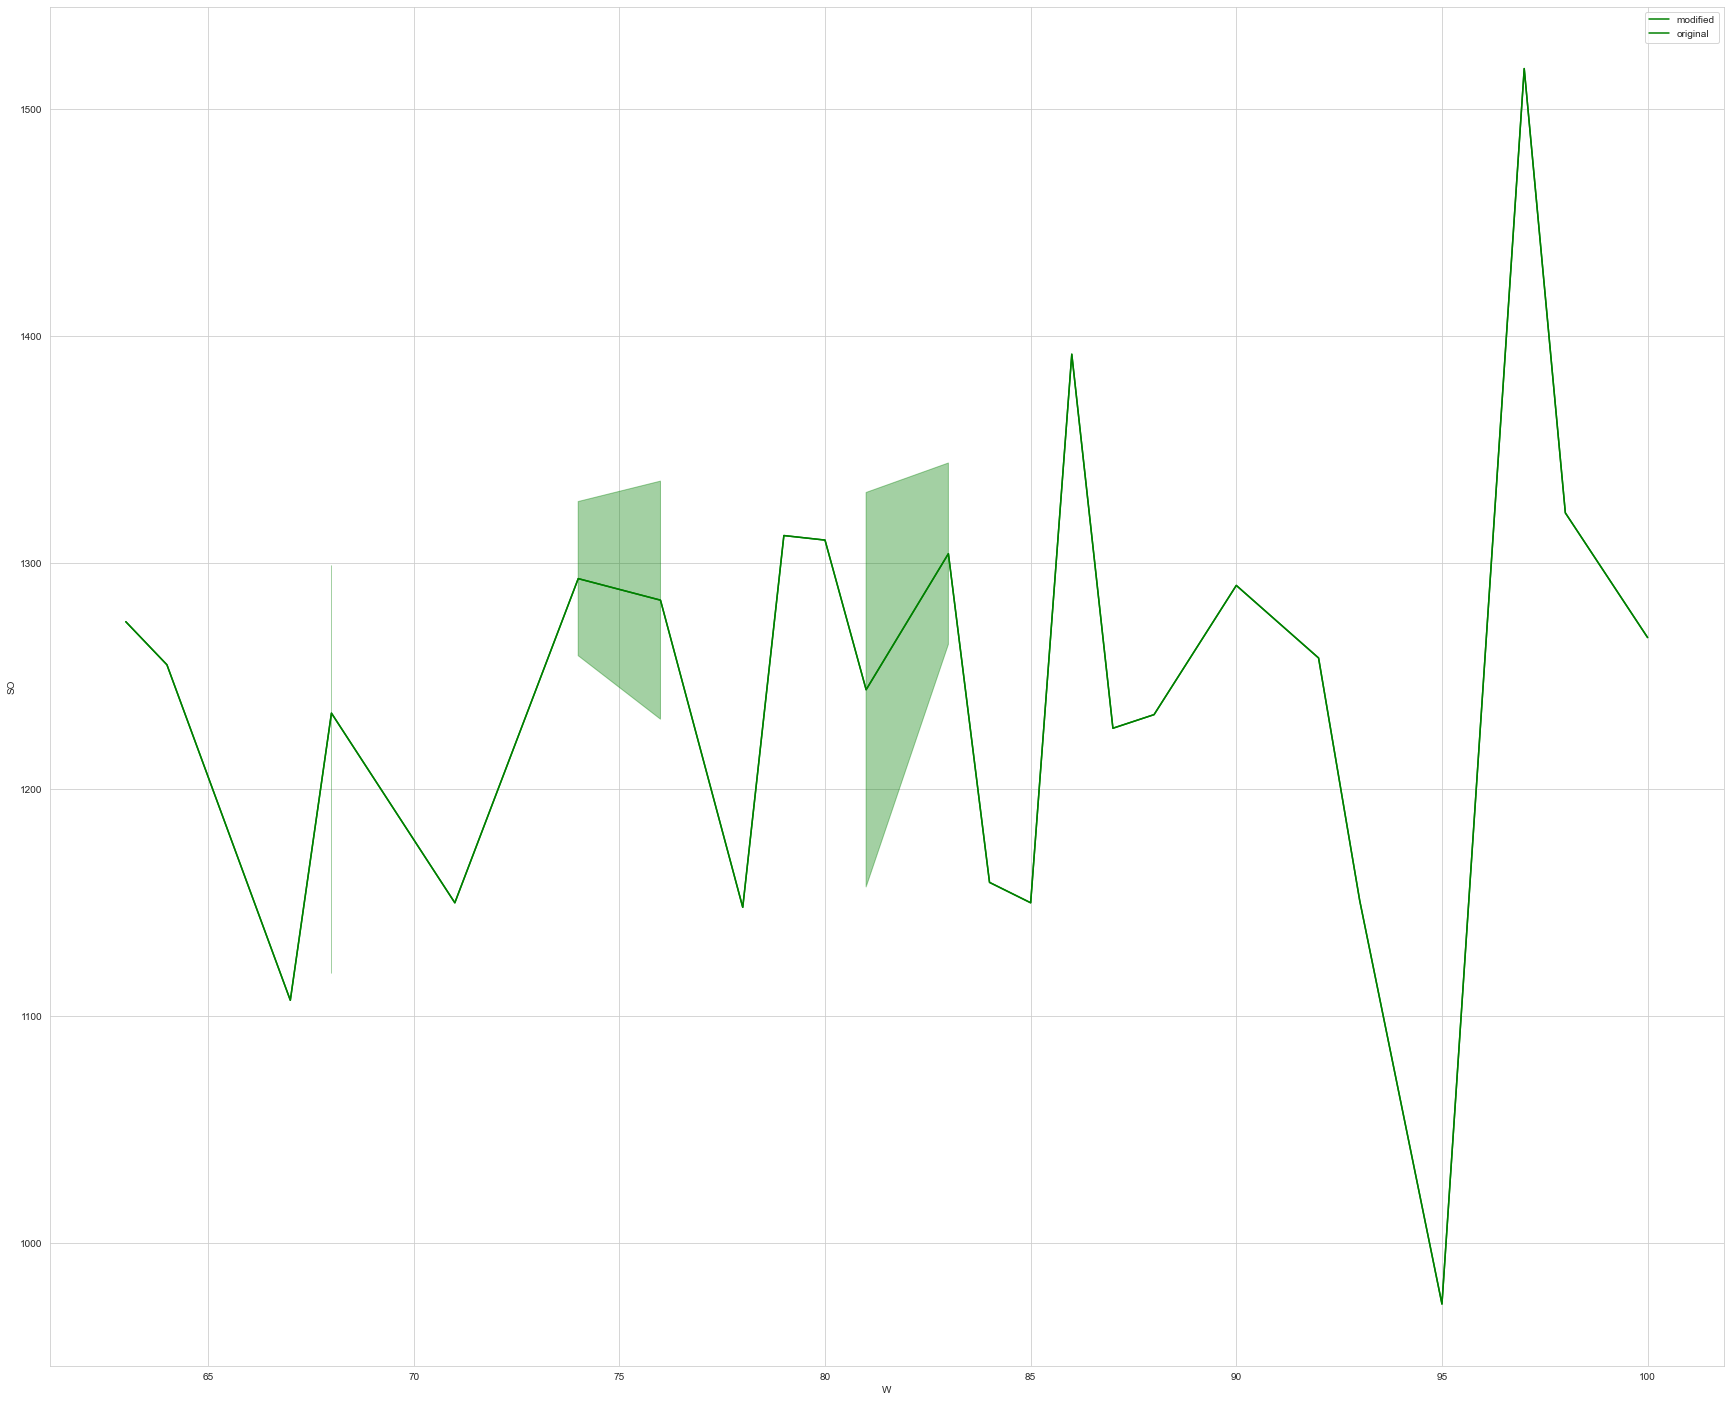

In [75]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['SO'].interpolate(), color='green', label = 'modified')
sns.lineplot(x=df['W'], y=df['SO'].fillna(np.inf), color='green', label = 'original')

<AxesSubplot:xlabel='W', ylabel='SO'>

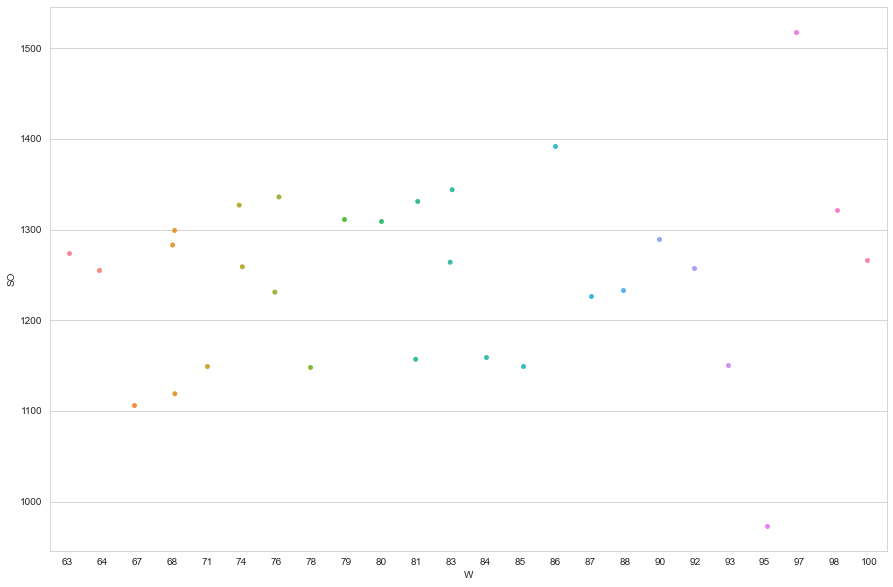

In [76]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['SO'])

#### From The Above Plots And Charts I can see 1150 strike outs have been made in this dataset.

# SB - Stolen bases

In [18]:
# W vs SB
df['SB'].value_counts()

69     3
88     2
63     1
93     1
132    1
70     1
71     1
78     1
82     1
83     1
84     1
86     1
87     1
95     1
59     1
97     1
98     1
101    1
134    1
104    1
44     1
68     1
112    1
51     1
52     1
57     1
121    1
Name: SB, dtype: int64

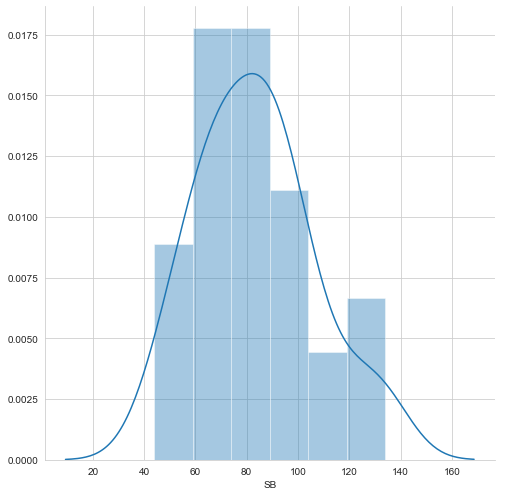

In [77]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"SB")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='SB'>

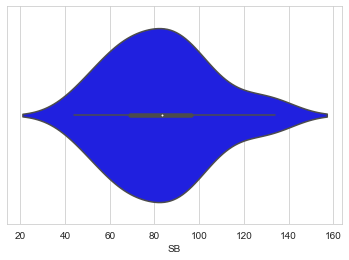

In [78]:
sns.violinplot(x=df['SB'], inner = "box", color='blue')

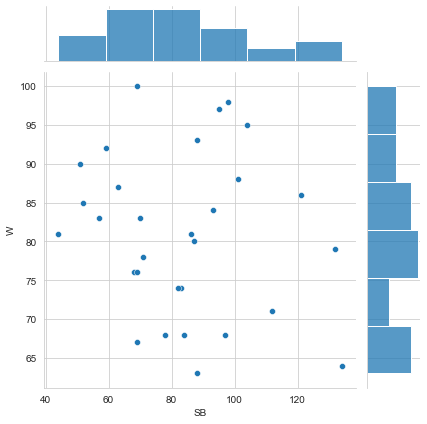

In [79]:
sns.jointplot(df['SB'],df['W'])

<AxesSubplot:xlabel='W', ylabel='SB'>

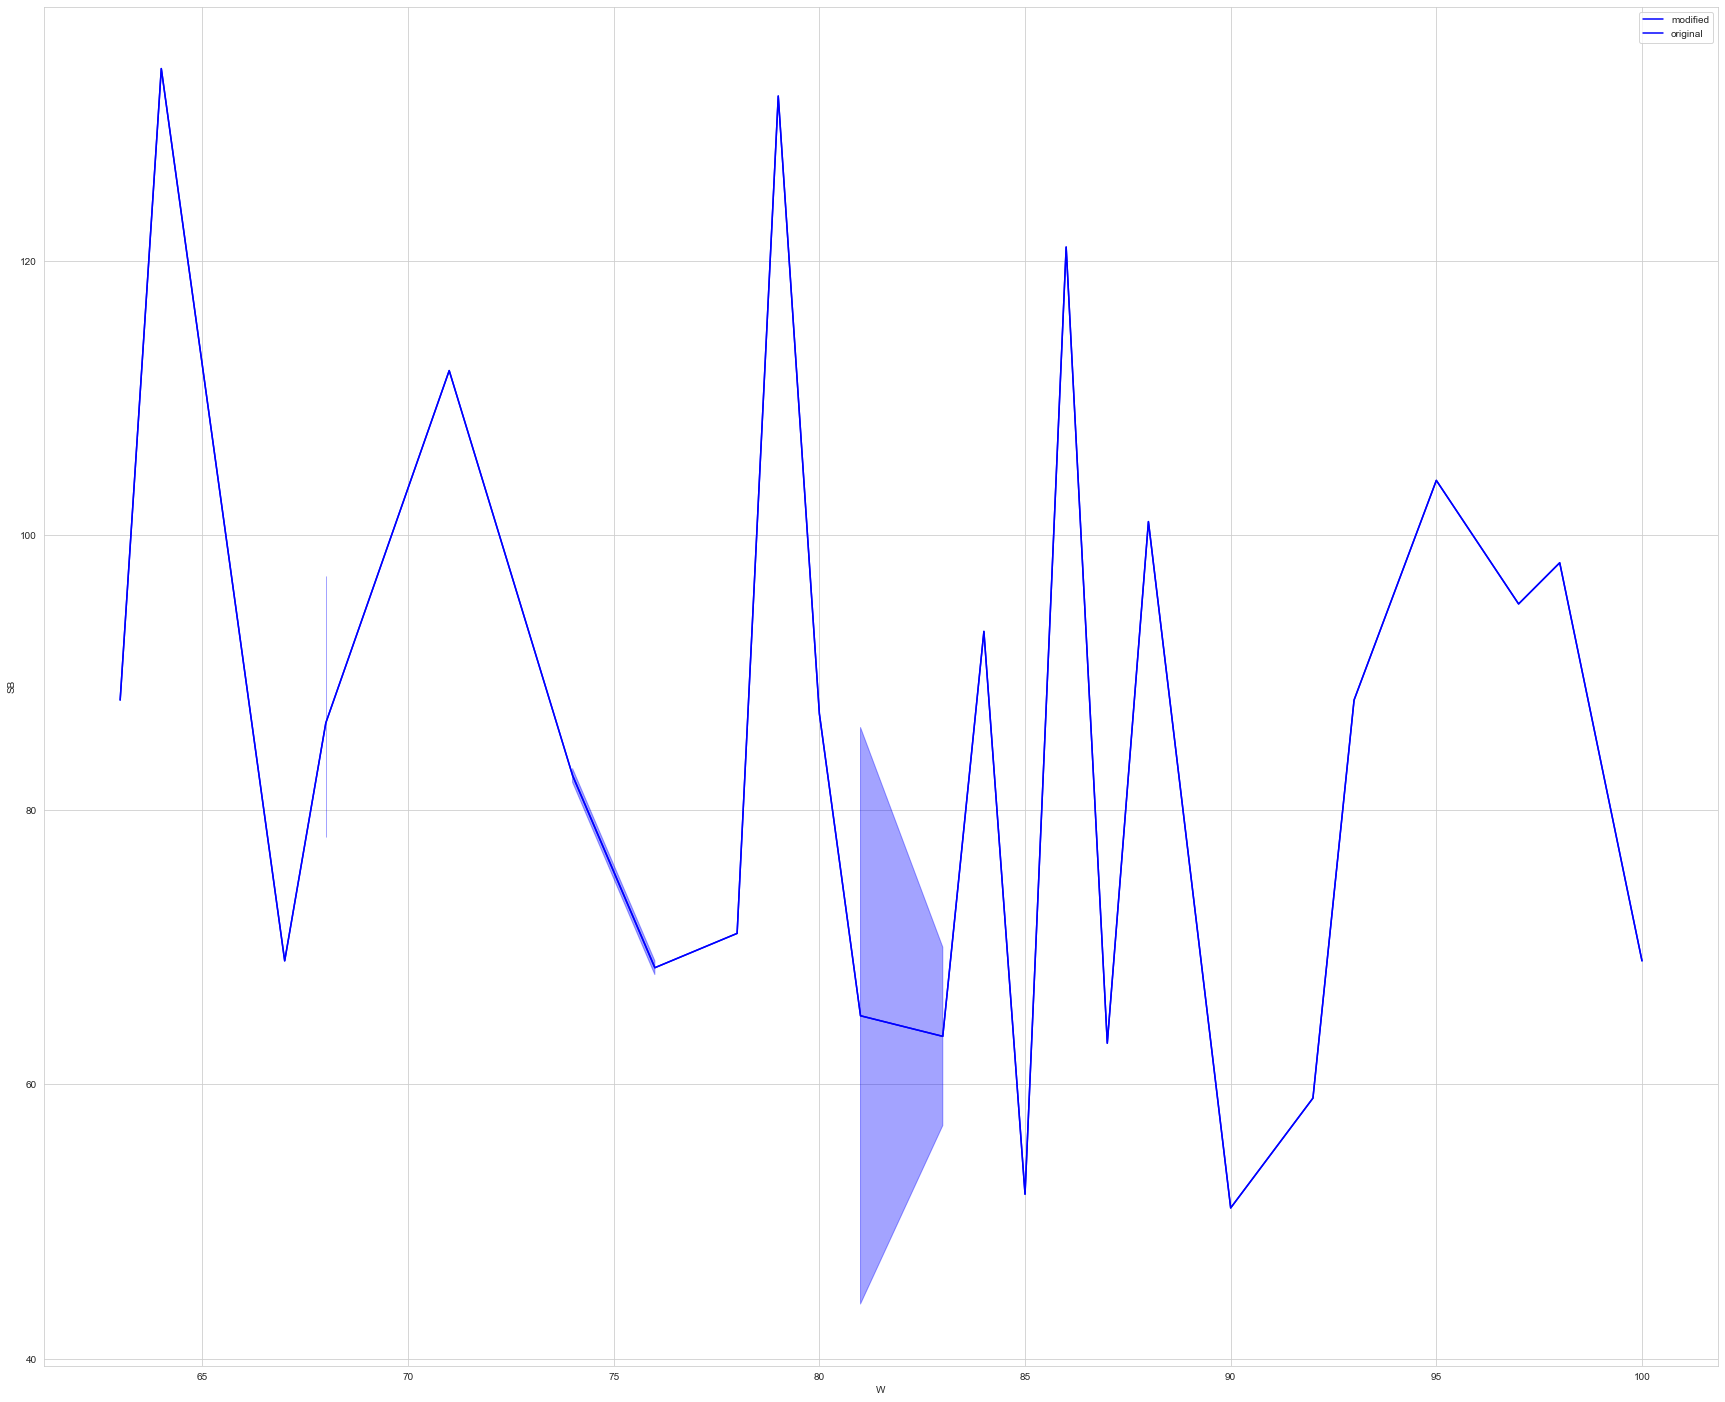

In [80]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['SB'].interpolate(), color='blue', label = 'modified')
sns.lineplot(x=df['W'], y=df['SB'].fillna(np.inf), color='blue', label = 'original')

<AxesSubplot:xlabel='W', ylabel='SB'>

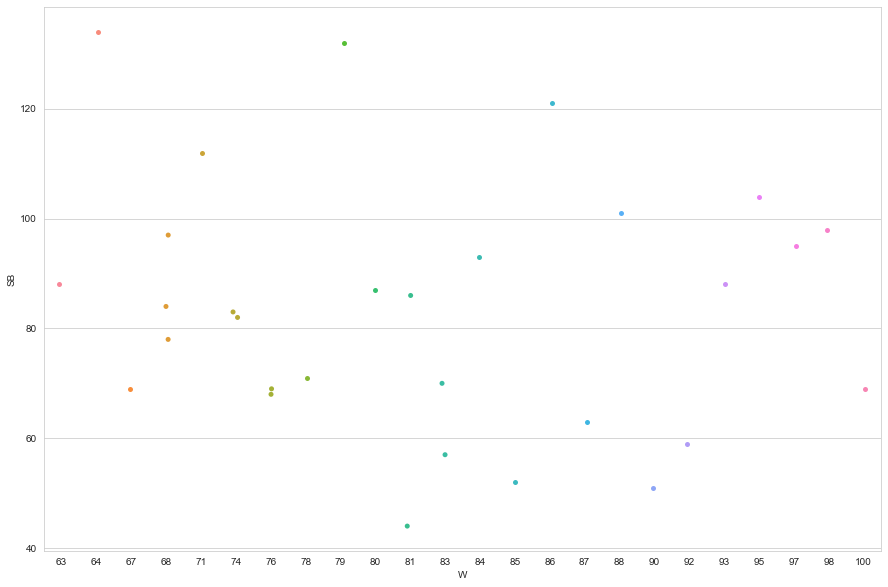

In [81]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['SB'])

#### From The Above Plots And Charts I can see 69 stolen basses have been taken in this dataset.

# RA - Opponents runs scored

In [19]:
# W vs RA
df['RA'].value_counts()

701    1
700    1
641    1
642    1
713    1
844    1
525    1
595    1
596    1
726    1
729    1
731    1
733    1
670    1
608    1
737    1
803    1
613    1
678    1
809    1
618    1
675    1
753    1
754    1
627    1
693    1
760    1
698    1
635    1
640    1
Name: RA, dtype: int64

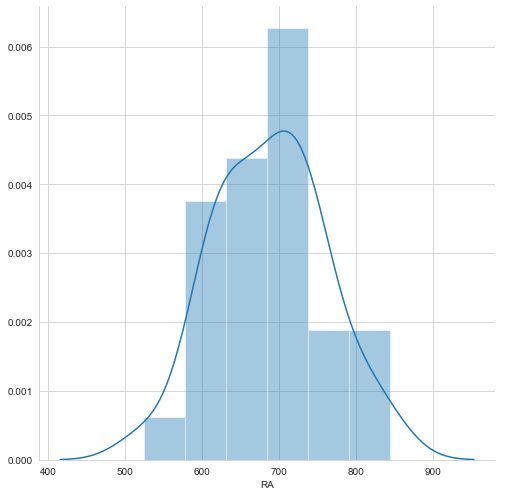

In [82]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"RA")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='RA'>

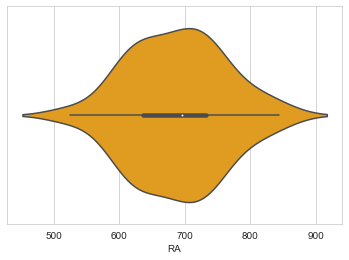

In [83]:
sns.violinplot(x=df['RA'], inner = "box", color='orange')

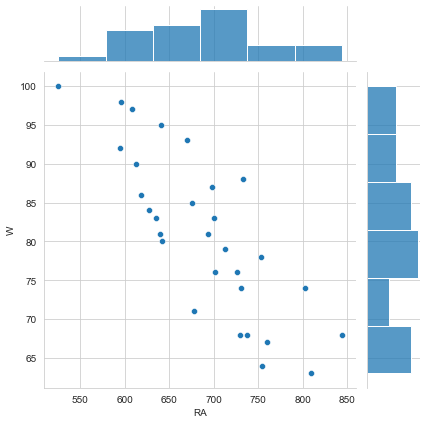

In [84]:
sns.jointplot(df['RA'],df['W'])

<AxesSubplot:xlabel='W', ylabel='RA'>

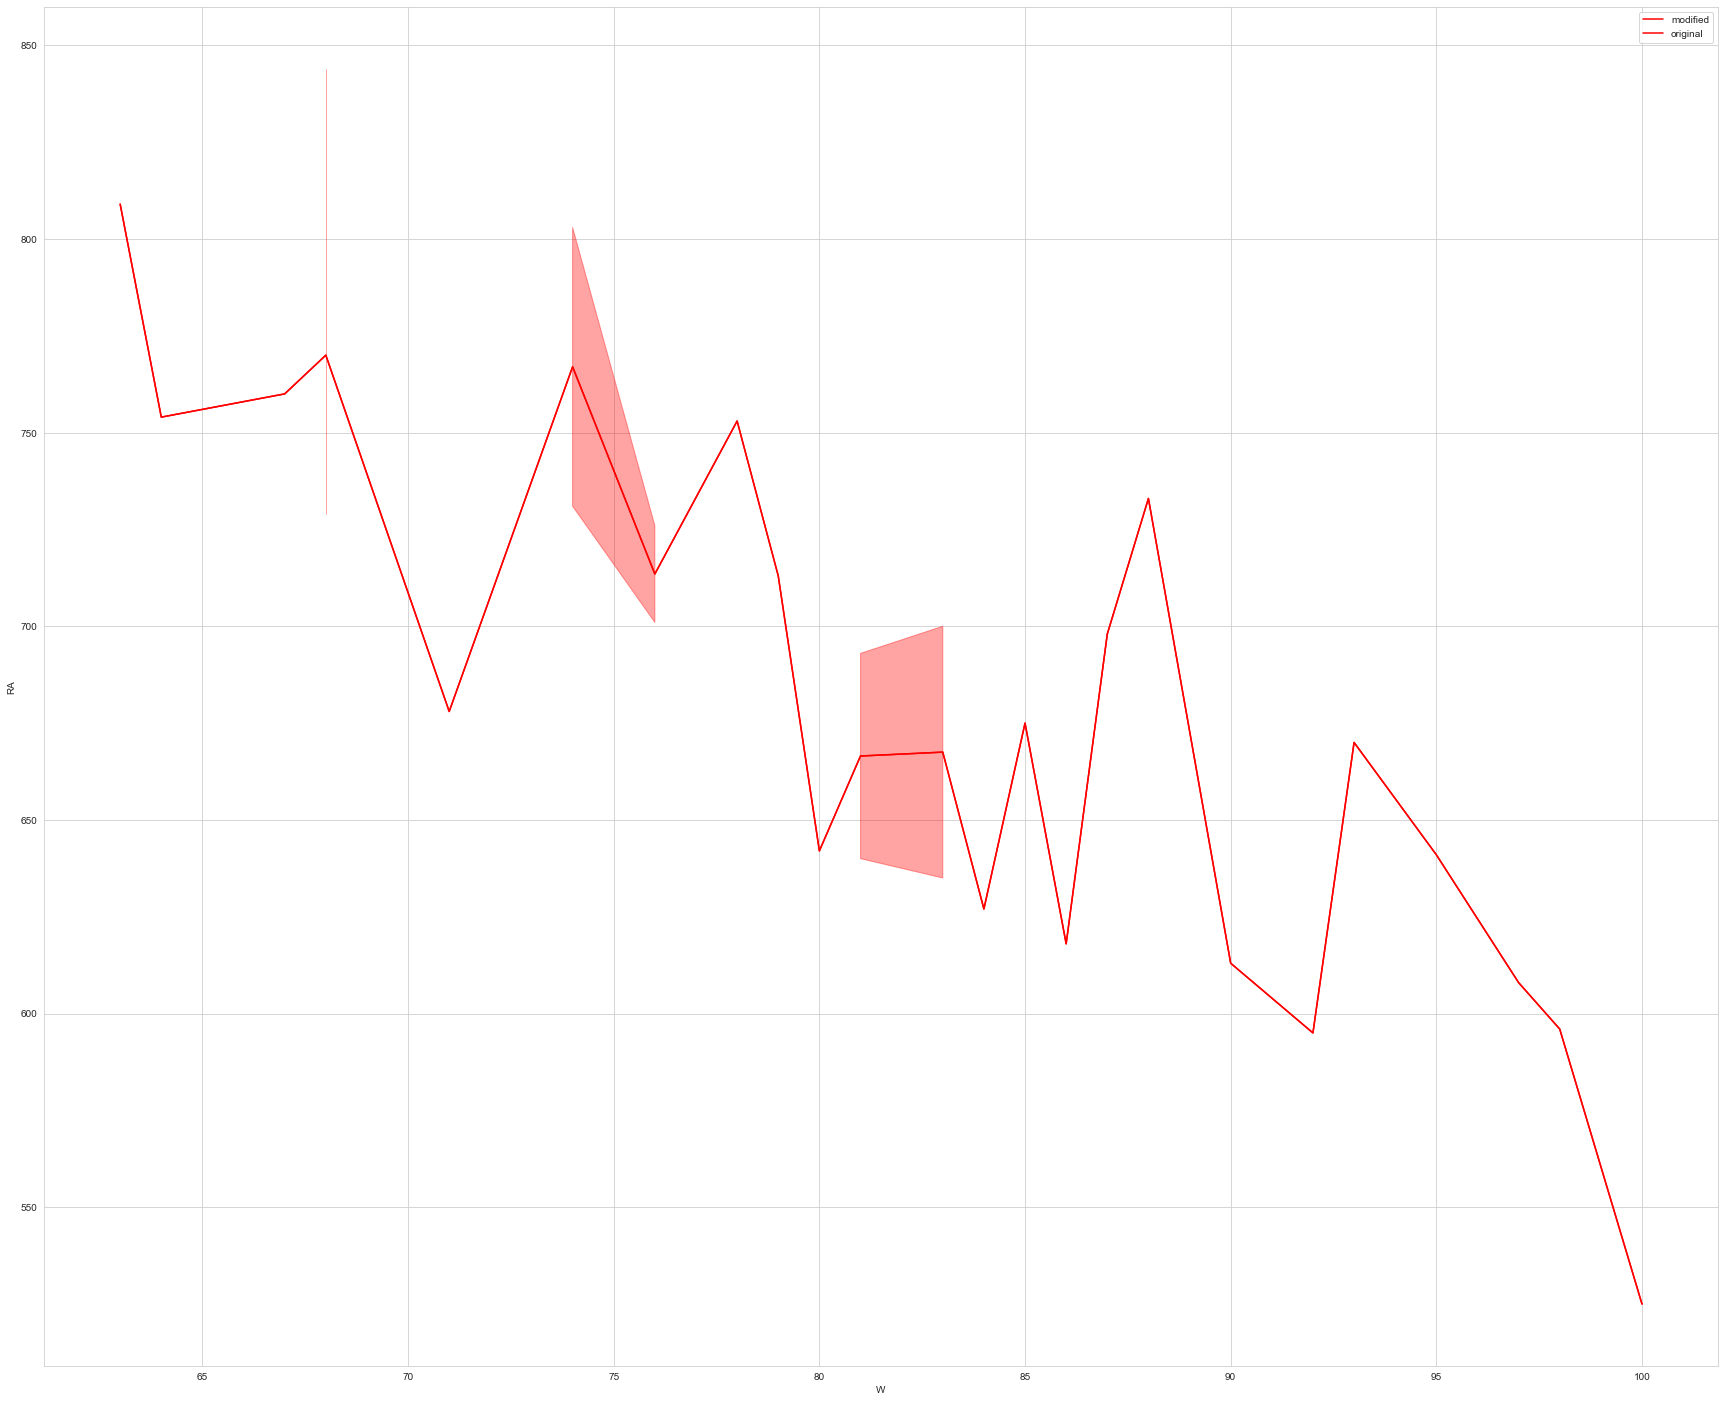

In [86]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['RA'].interpolate(), color='red', label = 'modified')
sns.lineplot(x=df['W'], y=df['RA'].fillna(np.inf), color='red', label = 'original')

<AxesSubplot:xlabel='W', ylabel='RA'>

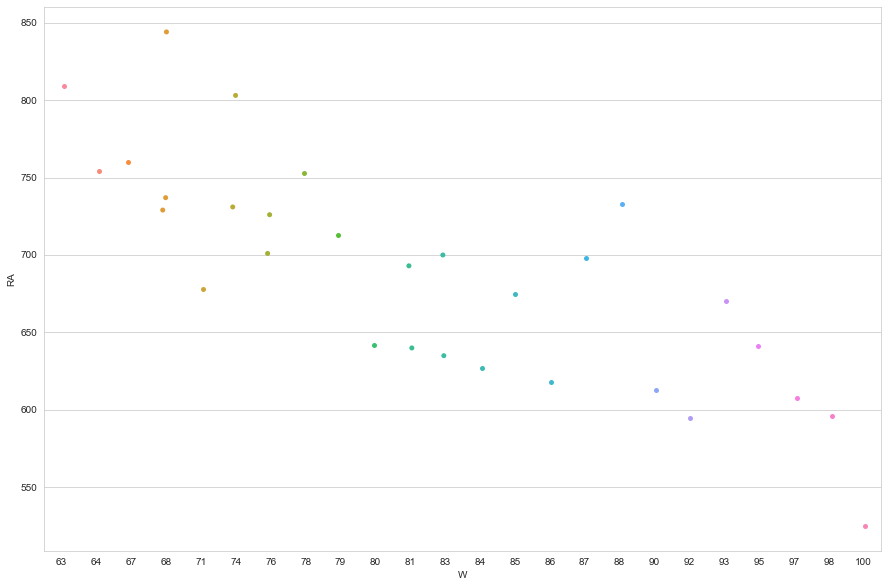

In [87]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['RA'])

#### From The Above Plots And Charts I can see 701 runs has been made by the opponents in this dataset

# ER - Earned runs allowed

In [20]:
# W vs ER
df['ER'].value_counts()

638    1
572    1
643    1
646    1
584    1
652    1
653    1
655    1
659    1
532    1
597    1
664    1
601    1
557    1
604    1
694    1
478    1
799    1
609    1
546    1
677    1
680    1
553    1
746    1
749    1
682    1
700    1
630    1
698    1
577    1
Name: ER, dtype: int64

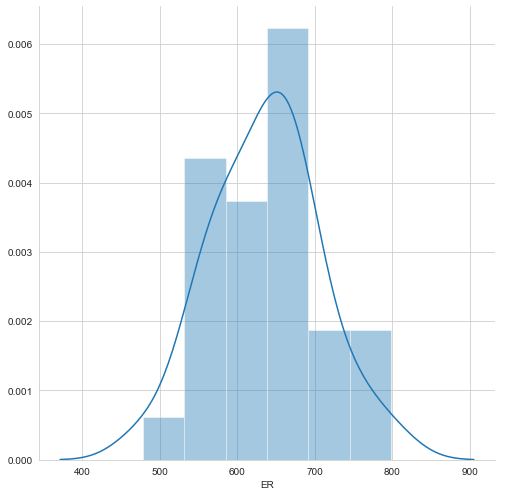

In [88]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"ER")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='ER'>

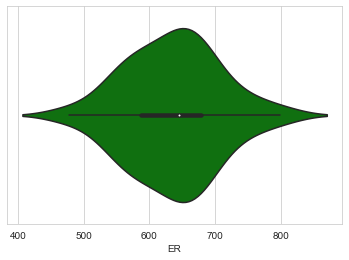

In [90]:
sns.violinplot(x=df['ER'], inner = "box", color='green')

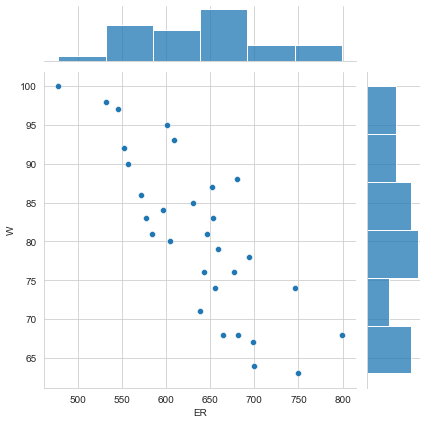

In [91]:
sns.jointplot(df['ER'],df['W'])

<AxesSubplot:xlabel='W', ylabel='ER'>

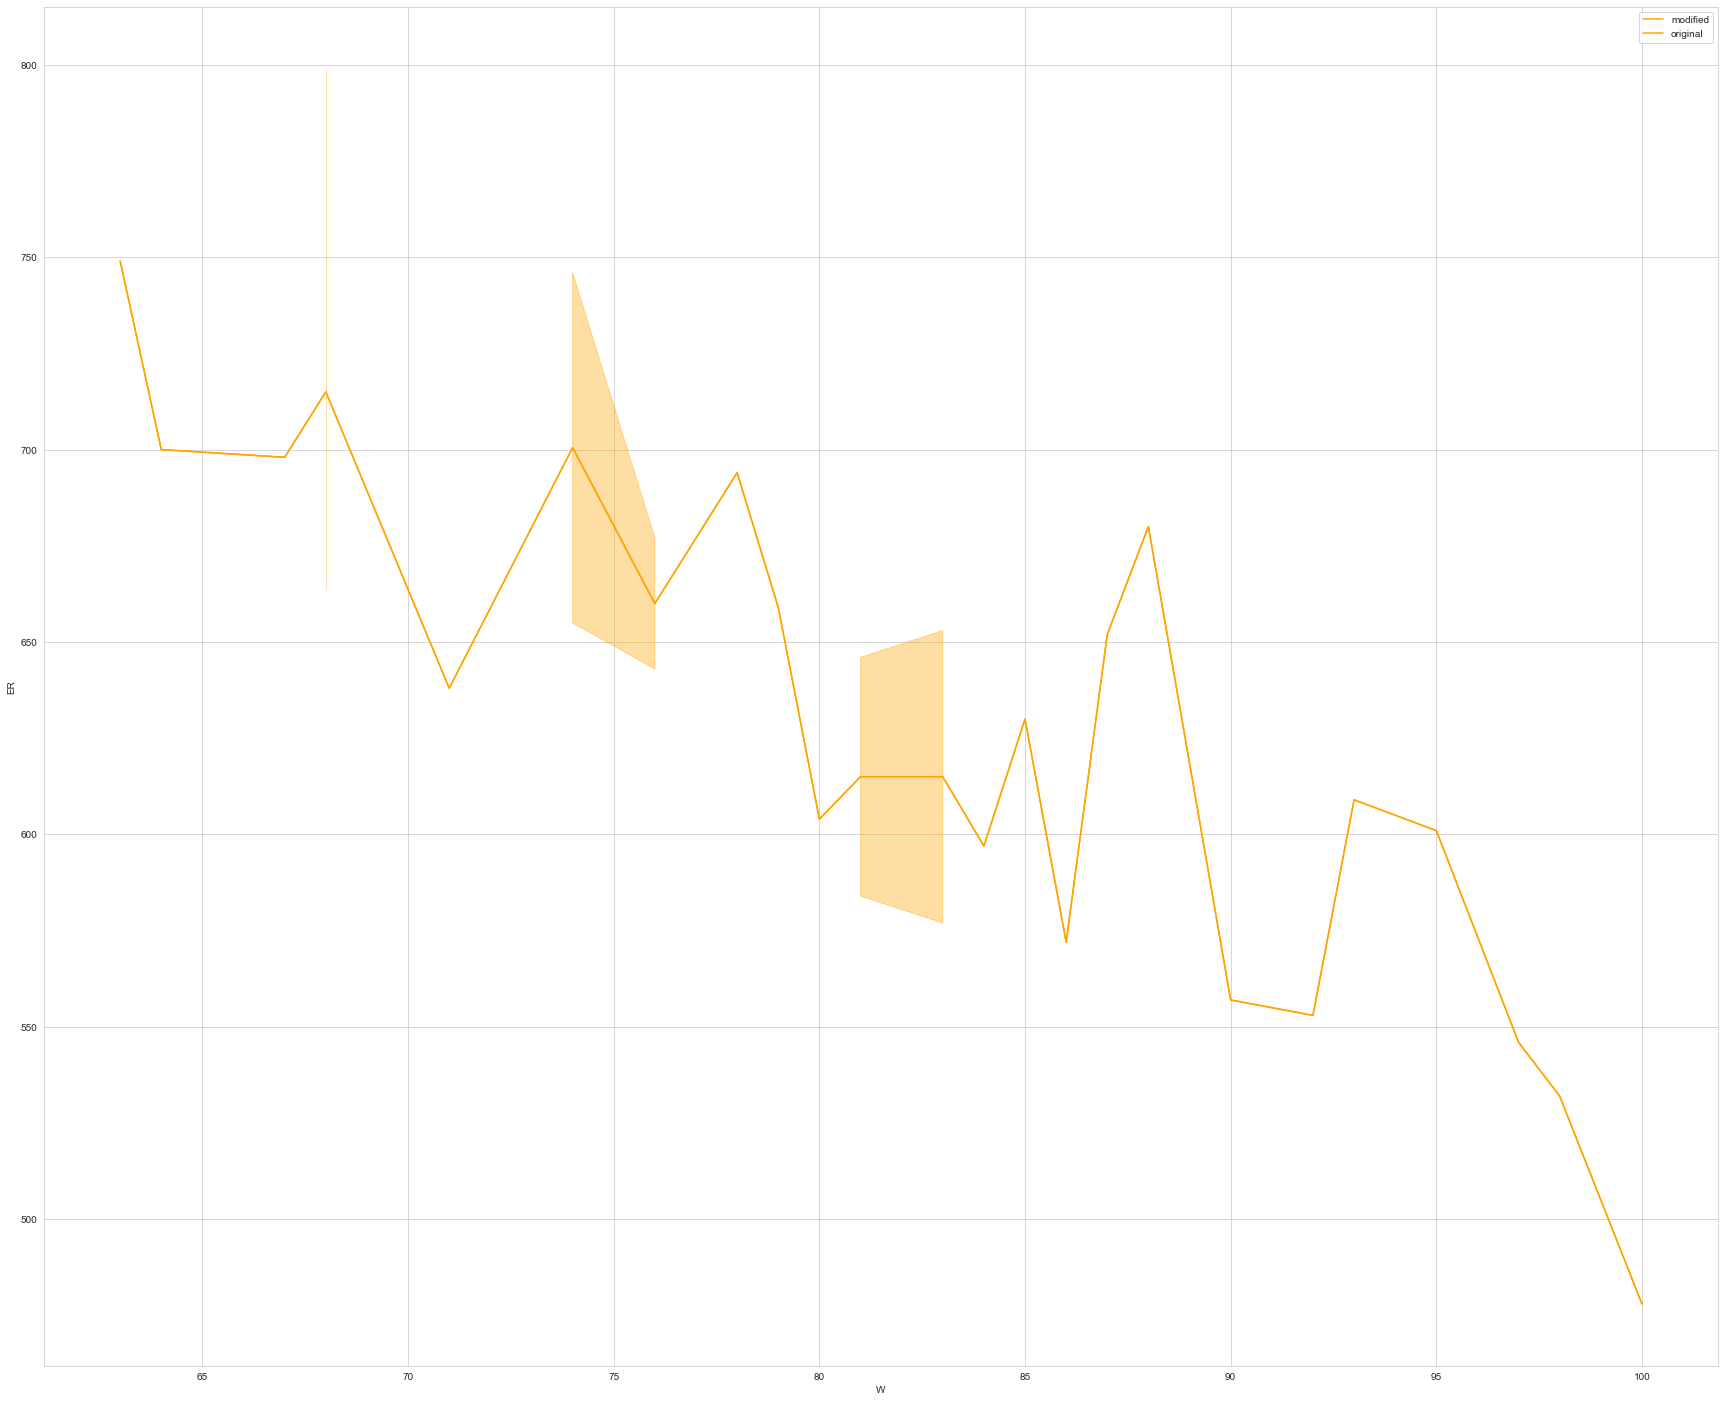

In [92]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['ER'].interpolate(), color='orange', label = 'modified')
sns.lineplot(x=df['W'], y=df['ER'].fillna(np.inf), color='orange', label = 'original')

<AxesSubplot:xlabel='W', ylabel='ER'>

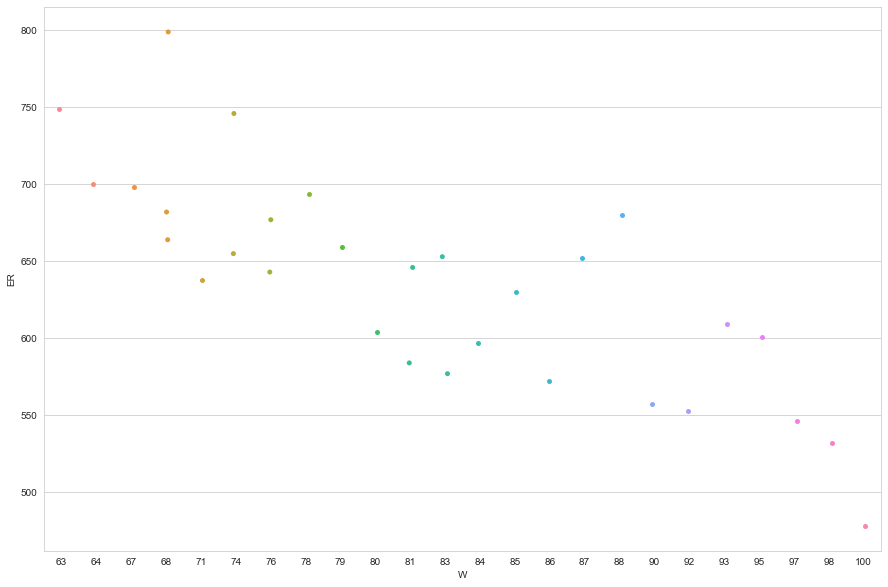

In [93]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['ER'])

### From The Above Plots And Charts I can see 638 earned runs has been score in this dataset

# ERA -  Earned run average

In [21]:
# W vs ERA
df['ERA'].value_counts()

3.57    1
3.72    1
4.03    1
4.69    1
4.31    1
3.67    1
3.94    1
3.62    1
4.14    1
4.16    1
3.98    1
4.04    1
4.28    1
3.80    1
4.24    1
4.09    1
3.44    1
4.07    1
3.43    1
4.64    1
3.21    1
5.04    1
4.33    1
4.02    1
4.05    1
2.94    1
3.73    1
3.74    1
4.41    1
3.36    1
Name: ERA, dtype: int64

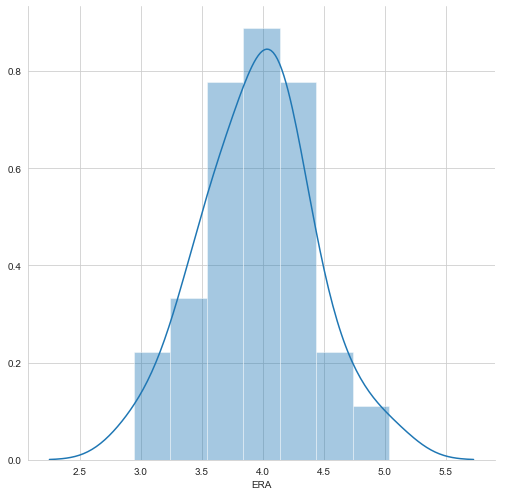

In [94]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"ERA")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='ERA'>

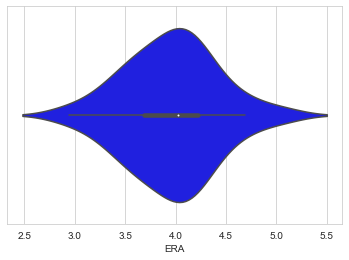

In [95]:
sns.violinplot(x=df['ERA'], inner = "box", color='blue')

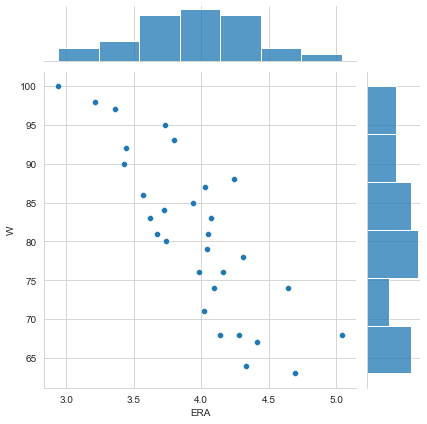

In [96]:
sns.jointplot(df['ERA'],df['W'])

<AxesSubplot:xlabel='W', ylabel='ERA'>

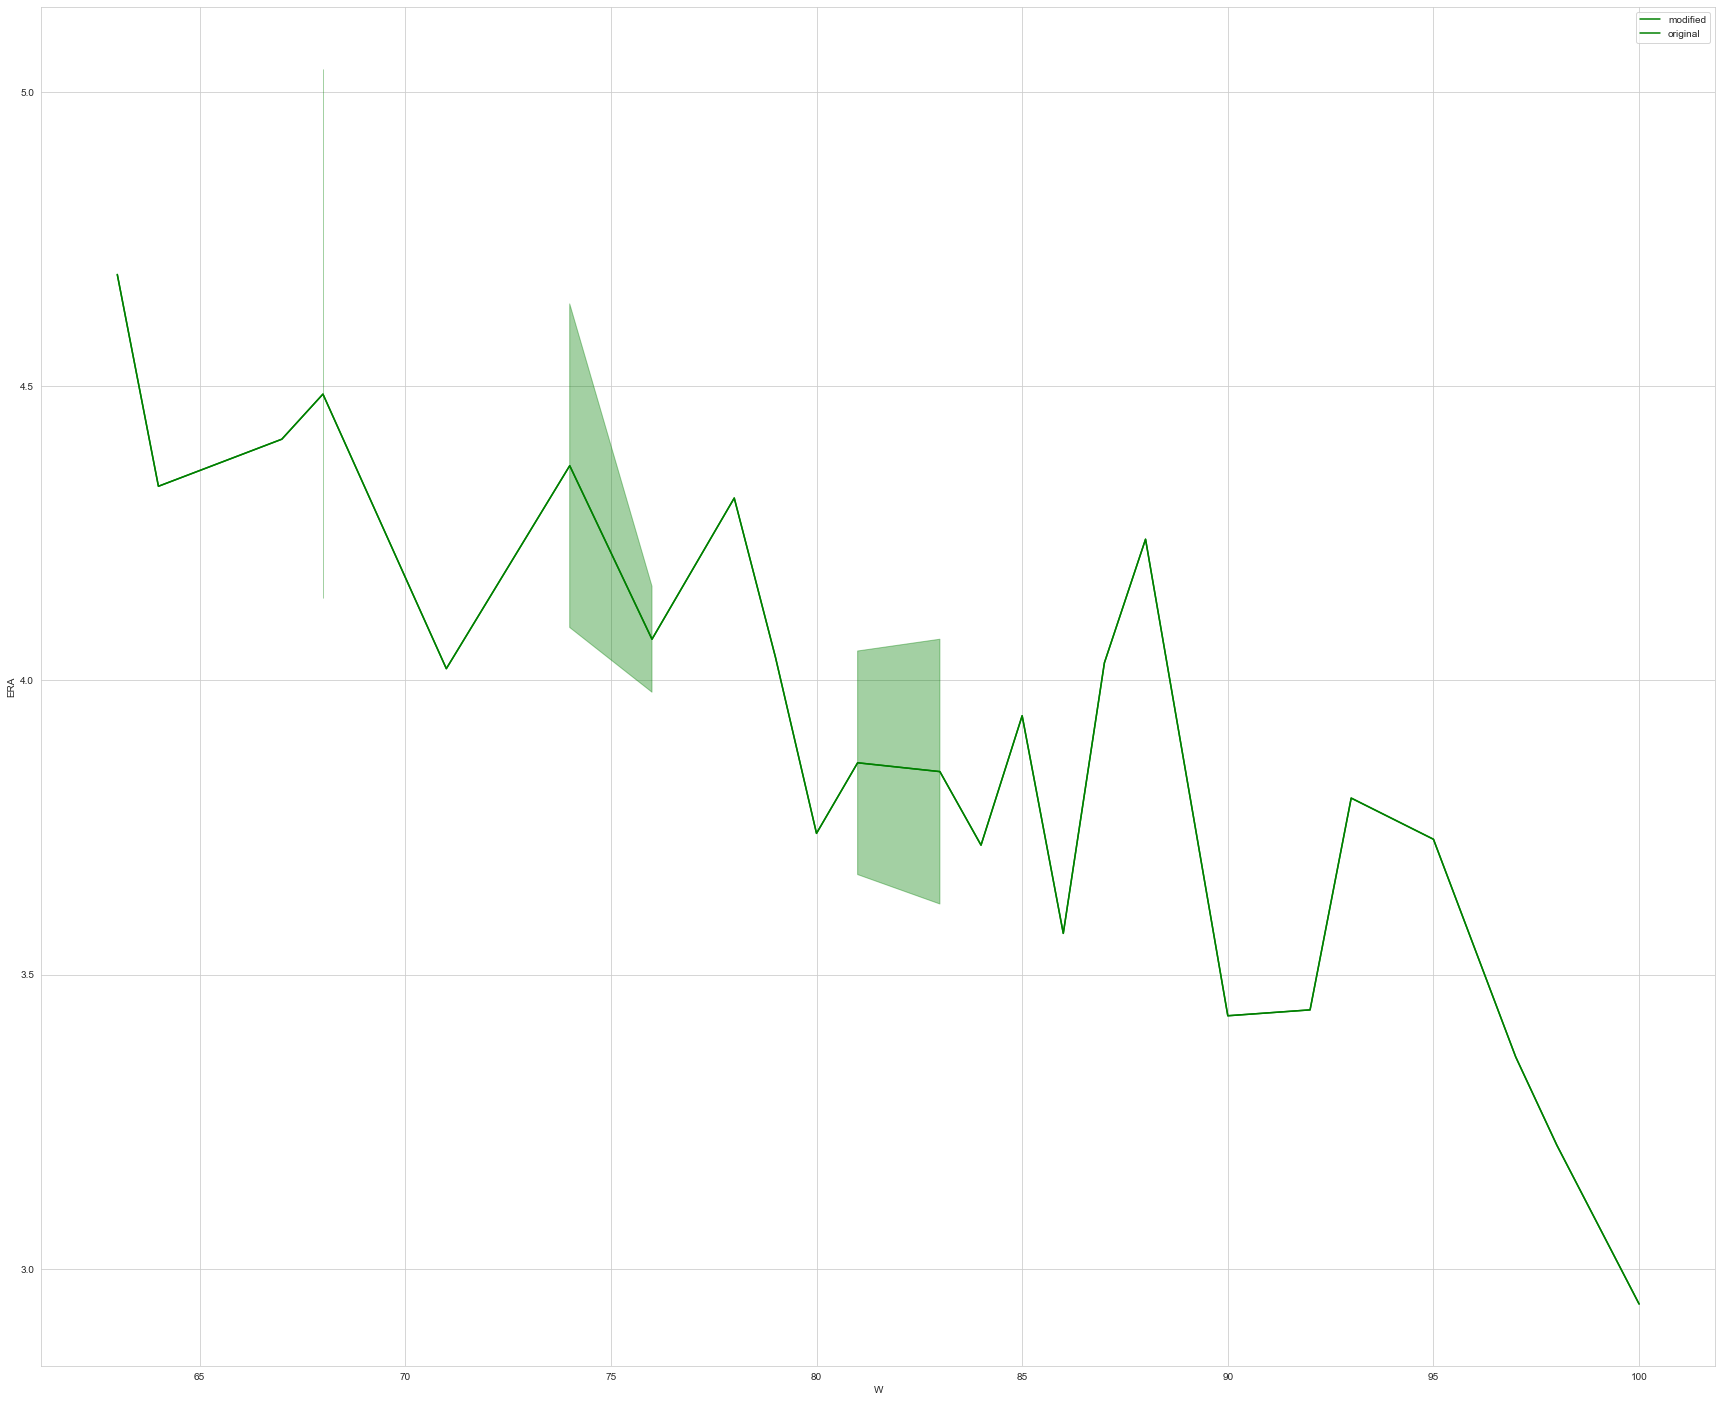

In [97]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['ERA'].interpolate(), color='green', label = 'modified')
sns.lineplot(x=df['W'], y=df['ERA'].fillna(np.inf), color='green', label = 'original')

<AxesSubplot:xlabel='W', ylabel='ERA'>

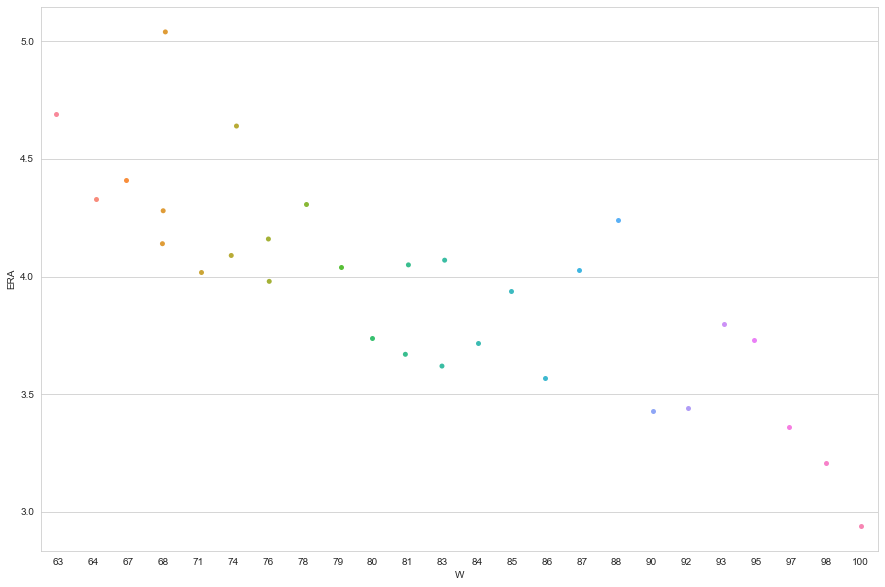

In [98]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['ERA'])

#### From The Above Plots And Charts I can see 3.57 runs have been scored in an average in this dataset which is the highest run average.

# CG - Complete games

In [22]:
# W vs CG
df['CG'].value_counts()

1.000000     7
7.000000     4
2.000000     4
6.000000     3
3.466667     3
5.000000     3
3.000000     3
4.000000     2
11.000000    1
Name: CG, dtype: int64

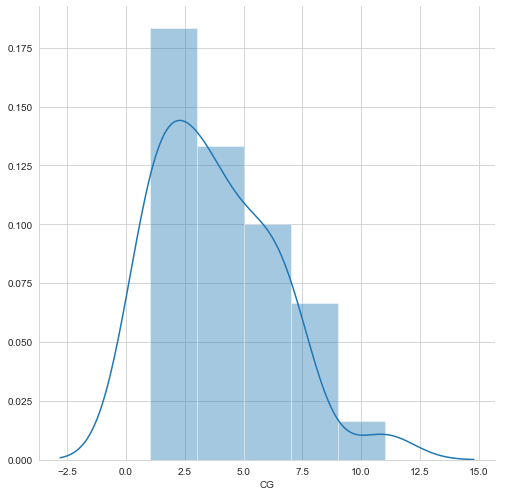

In [99]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"CG")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='CG'>

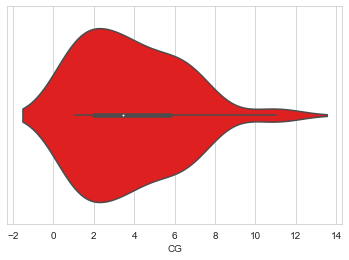

In [101]:
sns.violinplot(x=df['CG'], inner = "box", color='red')

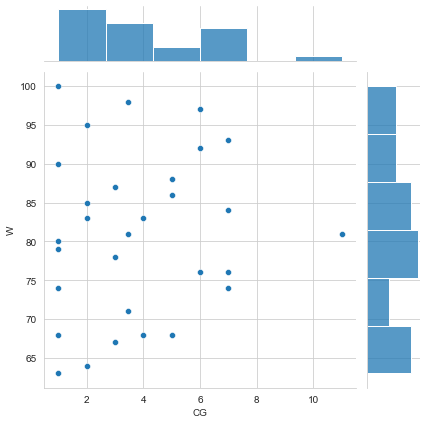

In [102]:
sns.jointplot(df['CG'],df['W'])

<AxesSubplot:xlabel='W', ylabel='CG'>

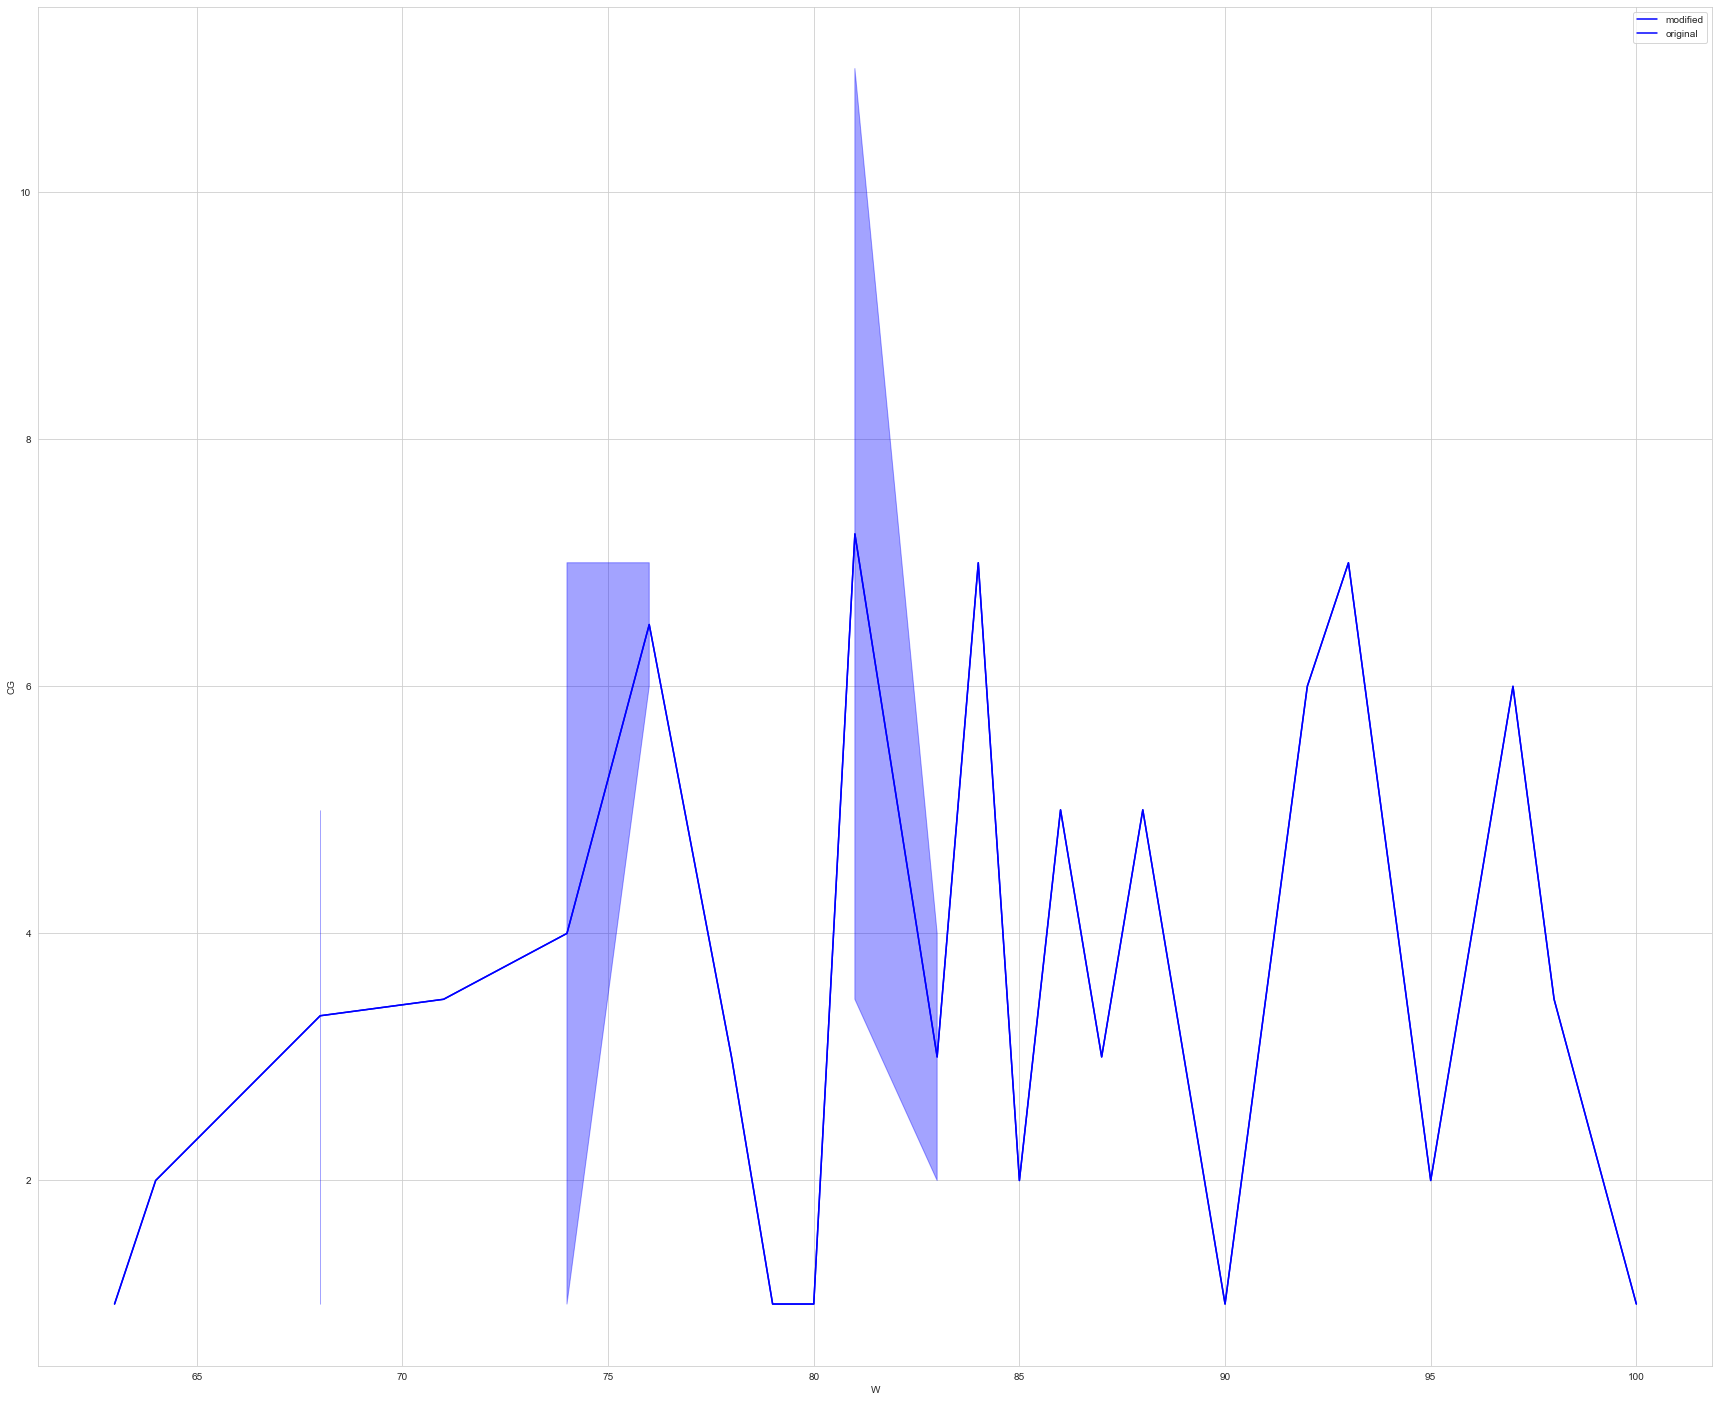

In [103]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['CG'].interpolate(), color='blue', label = 'modified')
sns.lineplot(x=df['W'], y=df['CG'].fillna(np.inf), color='blue', label = 'original')

<AxesSubplot:xlabel='W', ylabel='CG'>

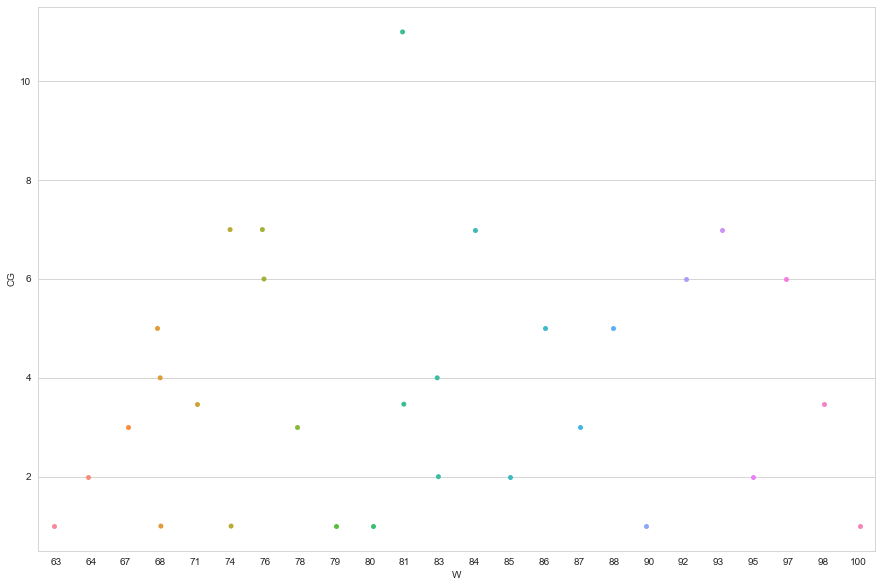

In [104]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['CG'])

#### From The Above Plots And Charts I can see 7 games have been completed in this dataset.

# SHO - Shutouts

In [23]:
# W vs SHO
df['SHO'].value_counts()

12    7
10    5
13    3
21    2
15    2
9     2
8     2
7     2
4     2
18    1
14    1
6     1
Name: SHO, dtype: int64

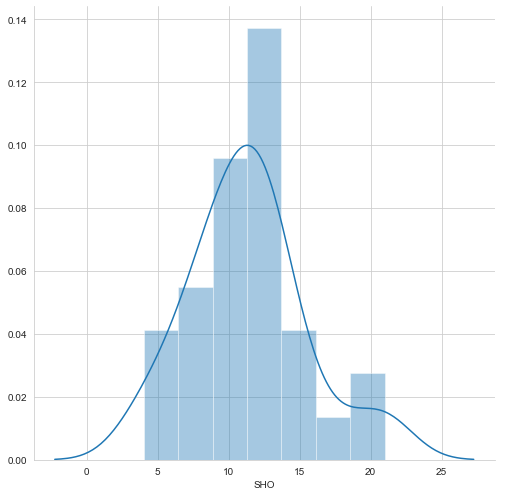

In [105]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"SHO")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='SHO'>

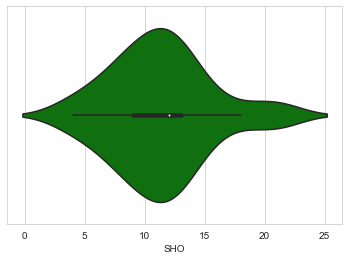

In [107]:
sns.violinplot(x=df['SHO'], inner = "box", color='green')

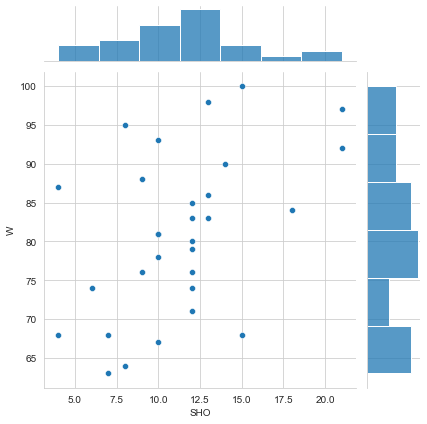

In [108]:
sns.jointplot(df['SHO'],df['W'])

<AxesSubplot:xlabel='W', ylabel='SHO'>

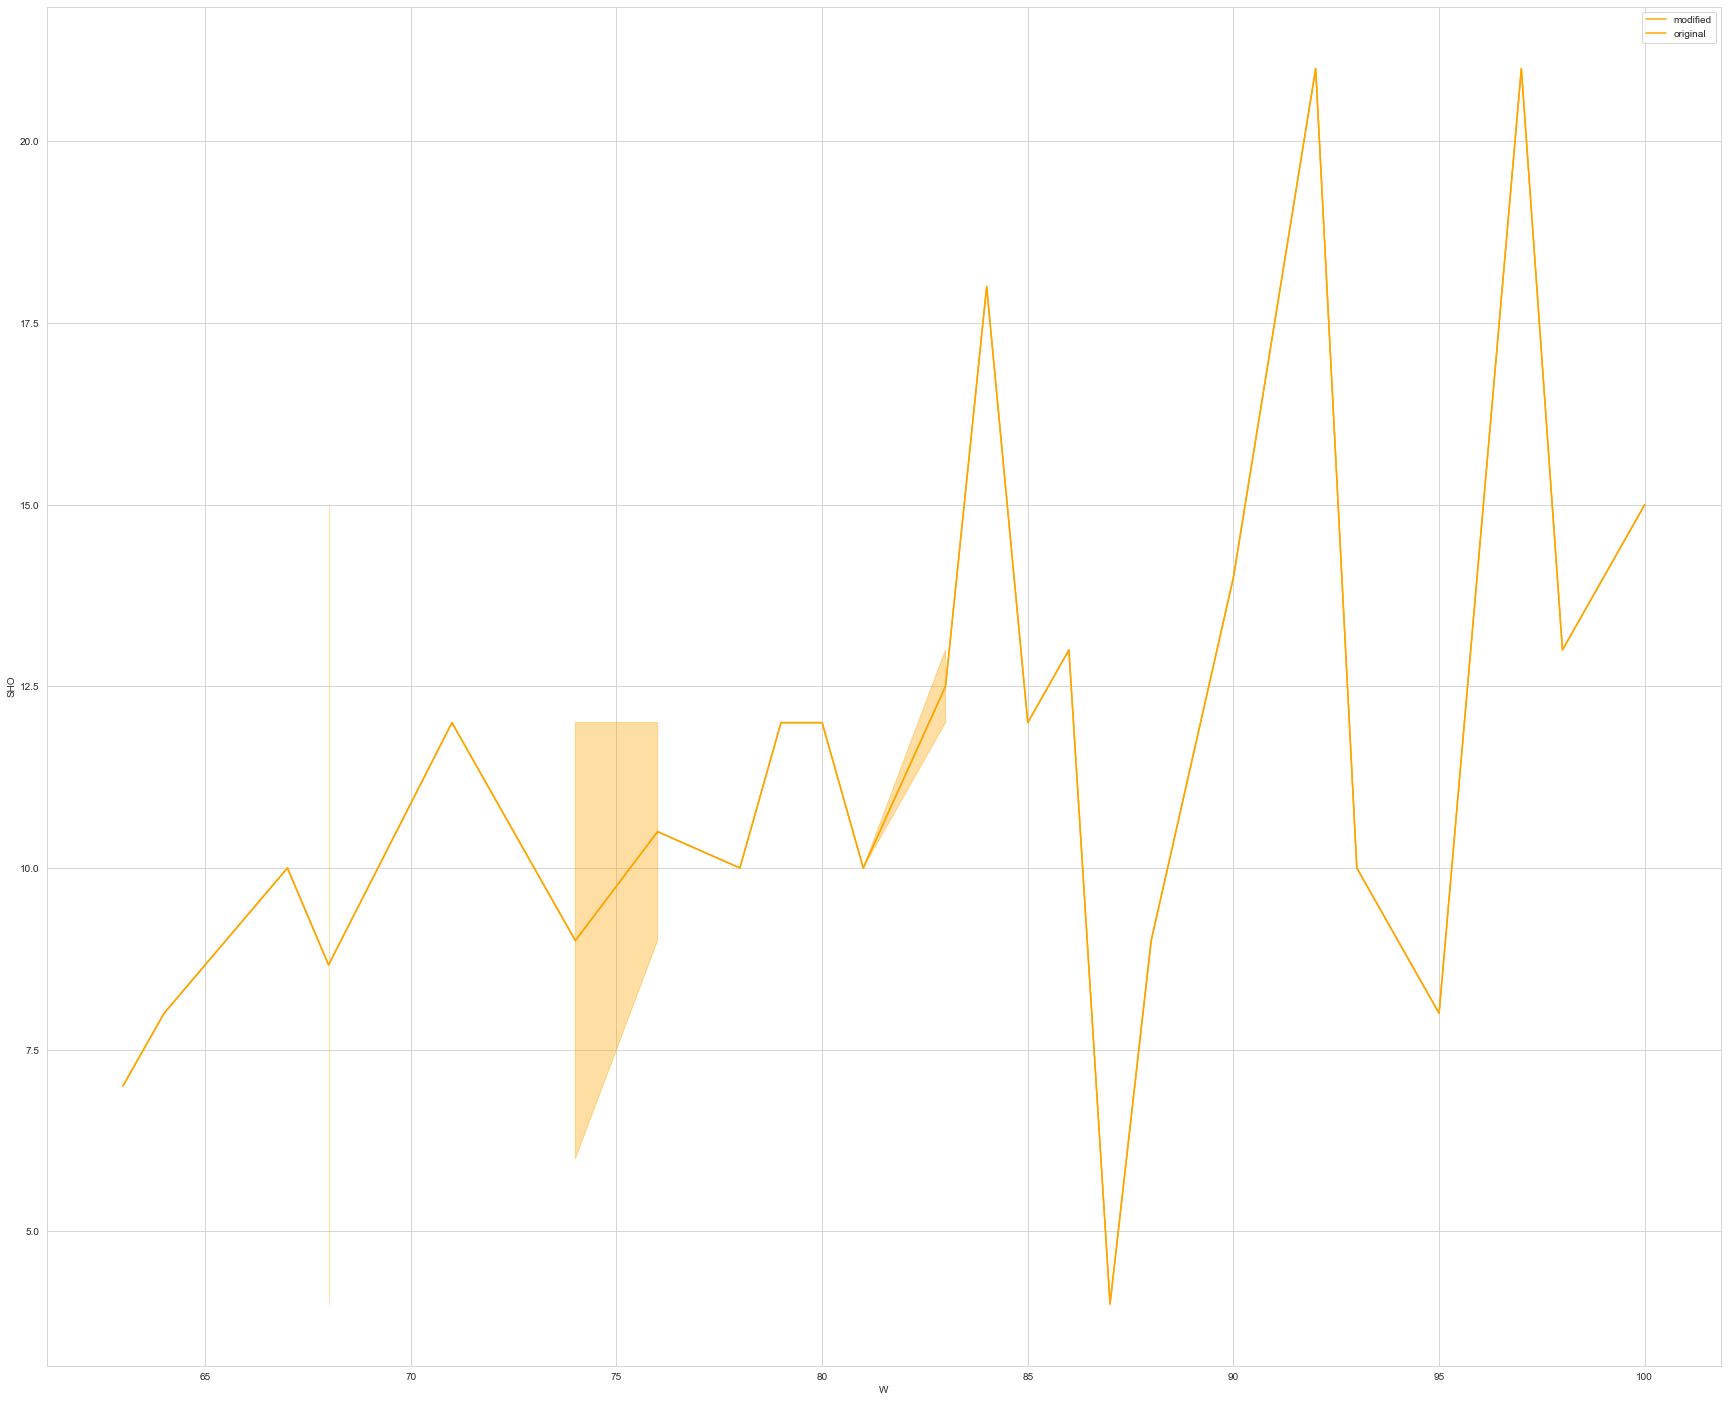

In [110]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['SHO'].interpolate(), color='orange', label = 'modified')
sns.lineplot(x=df['W'], y=df['SHO'].fillna(np.inf), color='orange', label = 'original')

<AxesSubplot:xlabel='W', ylabel='SHO'>

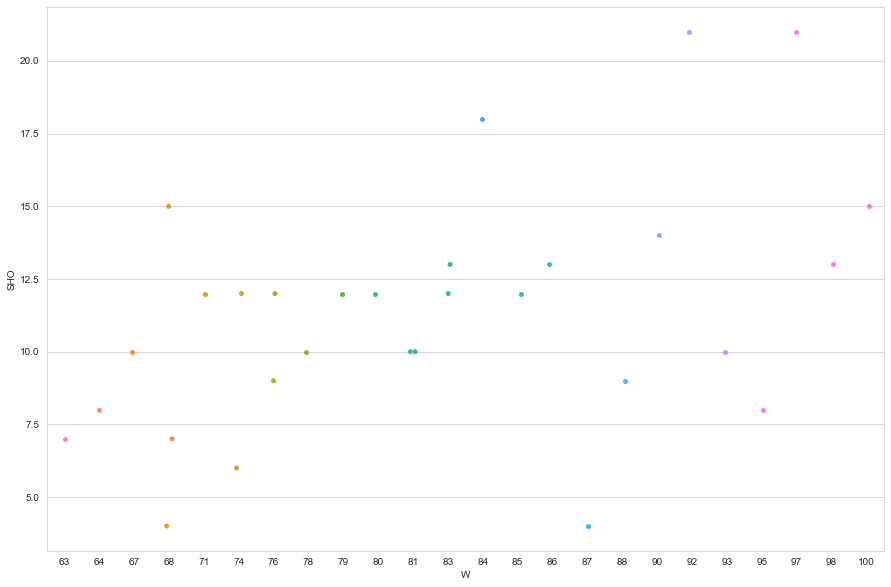

In [111]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['SHO'])

#### From The Above Plots And Charts I can see 12 shutouts have been completed in this dataset.

# SV - Saves

In [24]:
# W vs SV
df['SV'].value_counts()

35    4
45    3
41    3
44    2
48    2
40    2
43    1
36    1
37    1
38    1
39    1
28    1
62    1
46    1
47    1
50    1
54    1
56    1
60    1
34    1
Name: SV, dtype: int64

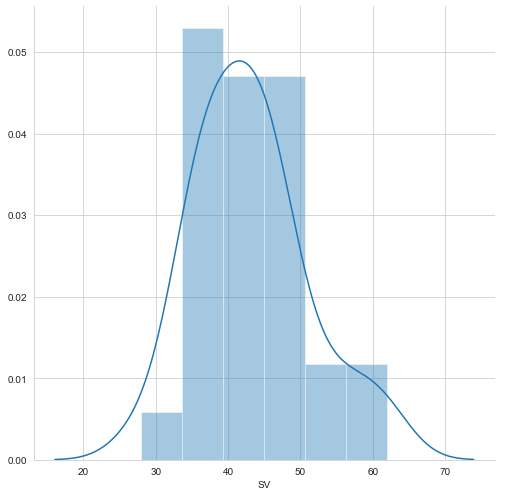

In [112]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"SV")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='SV'>

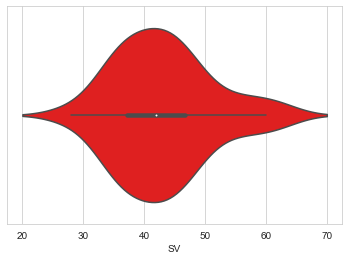

In [113]:
sns.violinplot(x=df['SV'], inner = "box", color='red')

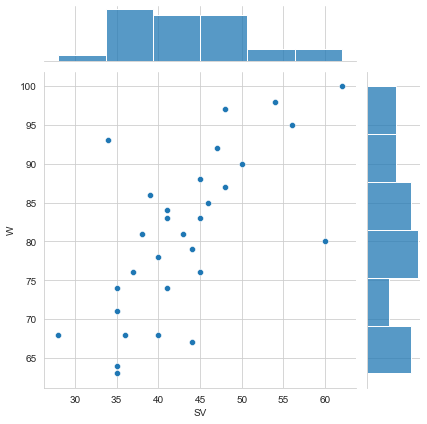

In [114]:
sns.jointplot(df['SV'],df['W'])

<AxesSubplot:xlabel='W', ylabel='SV'>

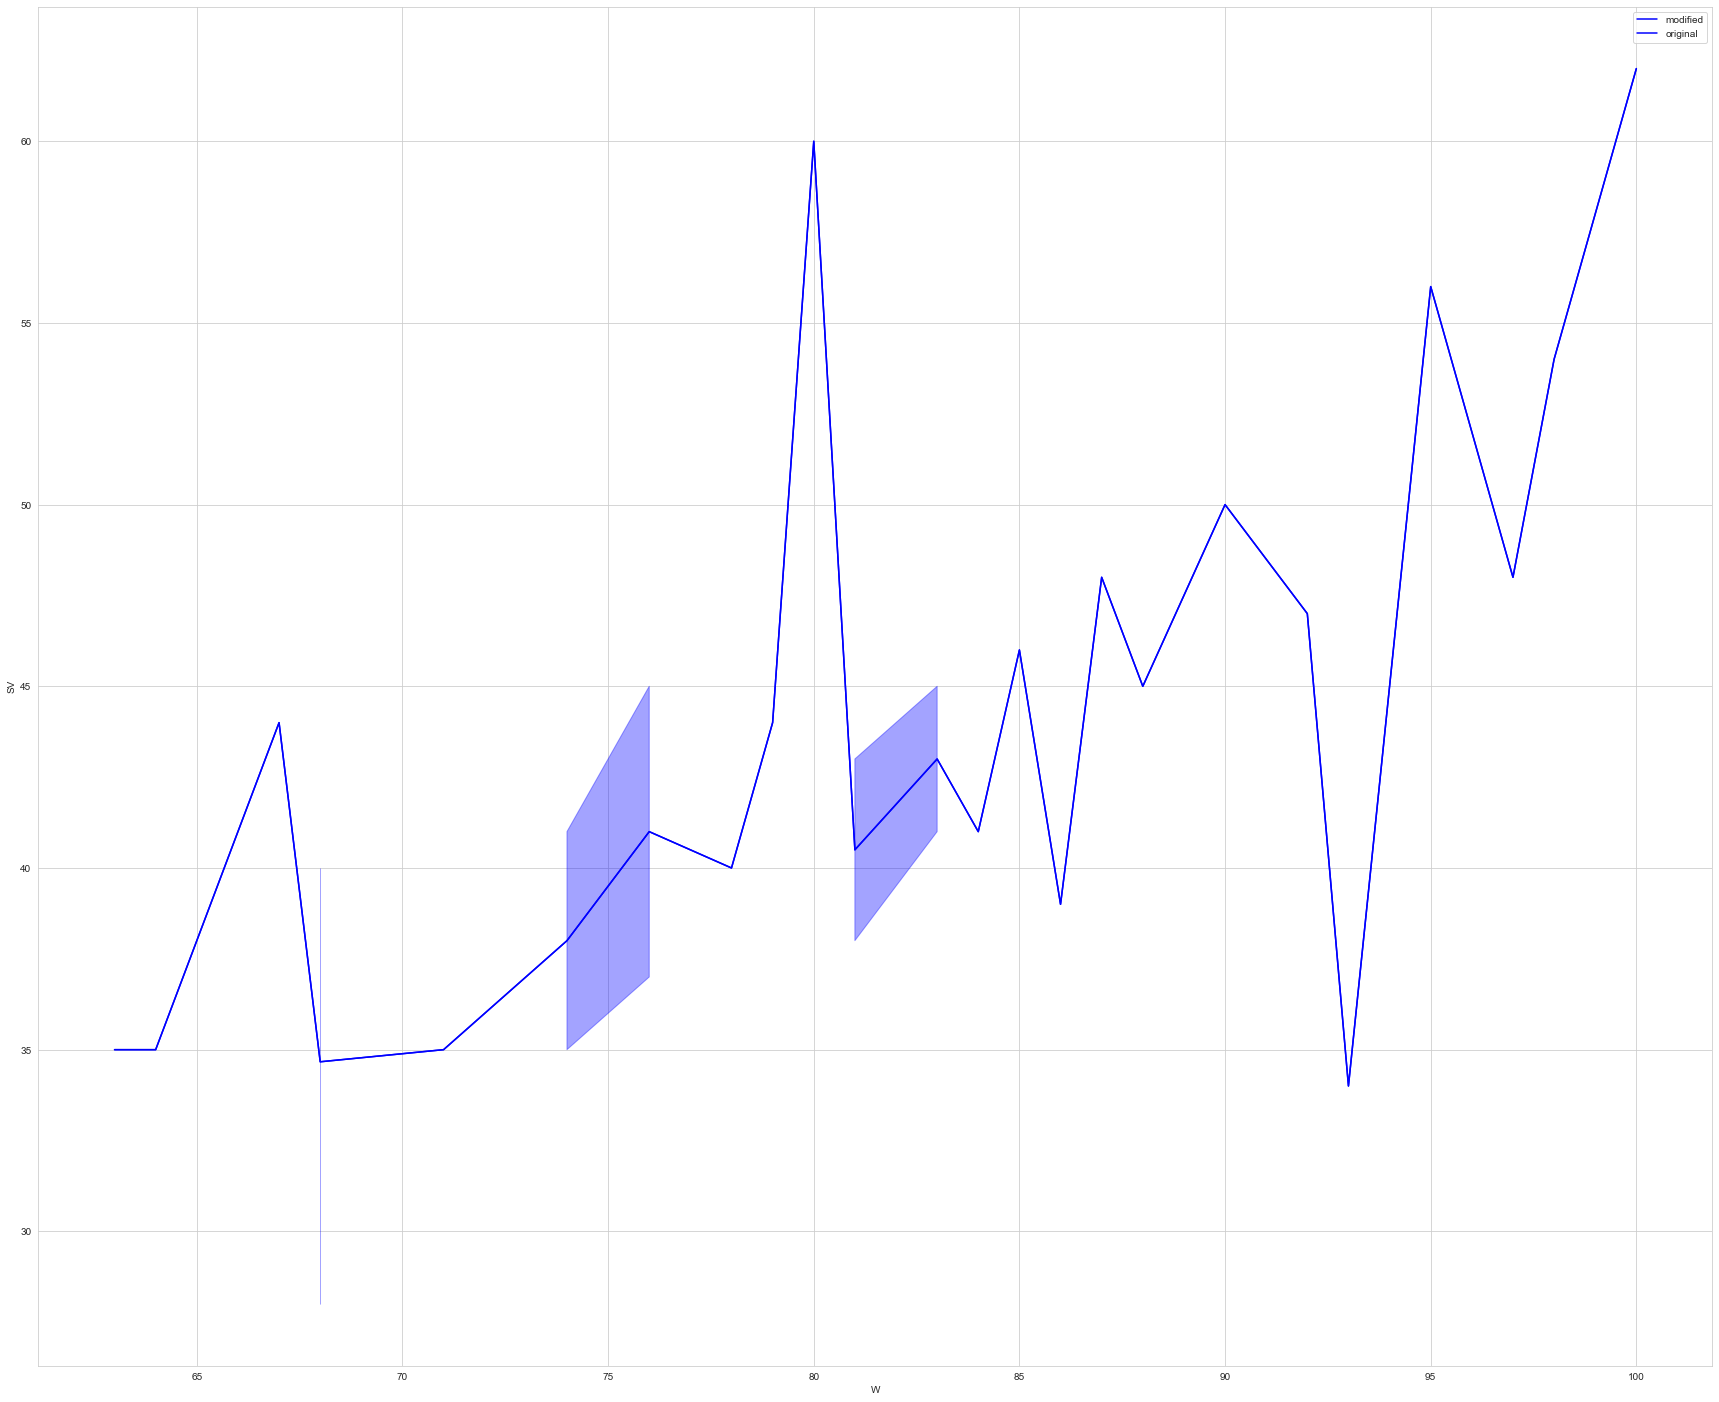

In [115]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['SV'].interpolate(), color='blue', label = 'modified')
sns.lineplot(x=df['W'], y=df['SV'].fillna(np.inf), color='blue', label = 'original')

<AxesSubplot:xlabel='W', ylabel='SV'>

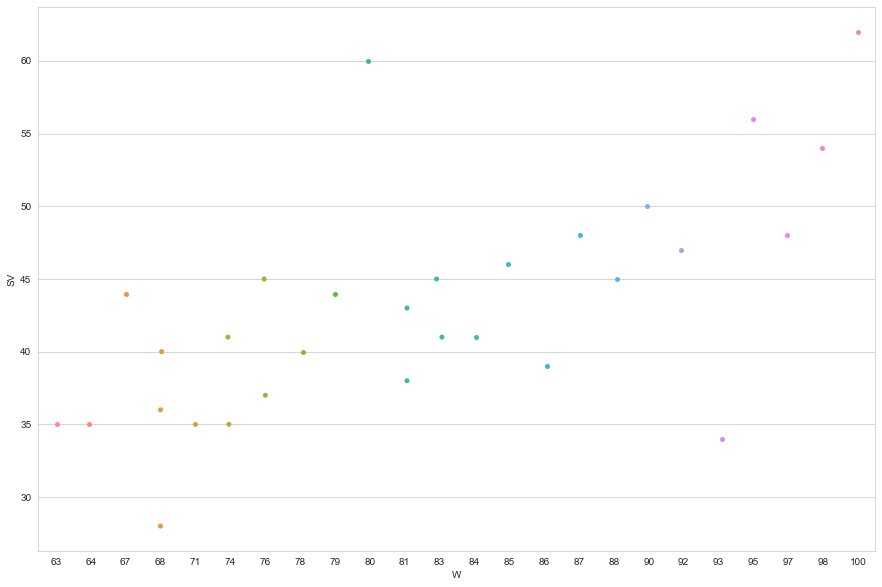

In [120]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['SV'])

#### From The Above Plots And Charts I can see 35 saves have been made in this dataset.

# E - Errors

In [25]:
# W vs E
df['E'].value_counts()

90     3
88     3
86     3
77     2
95     2
93     2
122    1
119    1
126    1
85     1
116    1
94     1
79     1
78     1
75     1
92     1
101    1
111    1
117    1
97     1
96     1
Name: E, dtype: int64

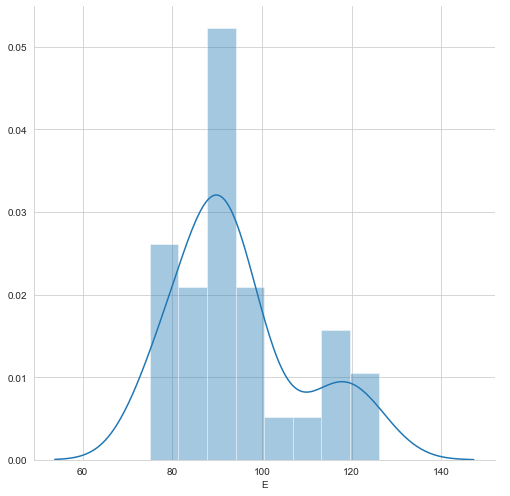

In [116]:
sns.FacetGrid(df,size=7)\
   .map(sns.distplot,"E")\
   .add_legend();
plt.show()

<AxesSubplot:xlabel='E'>

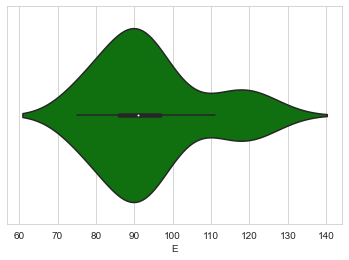

In [117]:
sns.violinplot(x=df['E'], inner = "box", color='green')

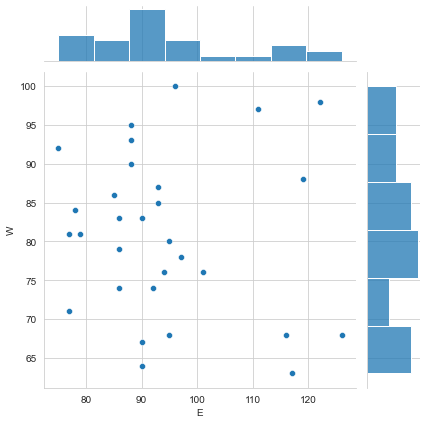

In [118]:
sns.jointplot(df['E'],df['W'])

<AxesSubplot:xlabel='W', ylabel='E'>

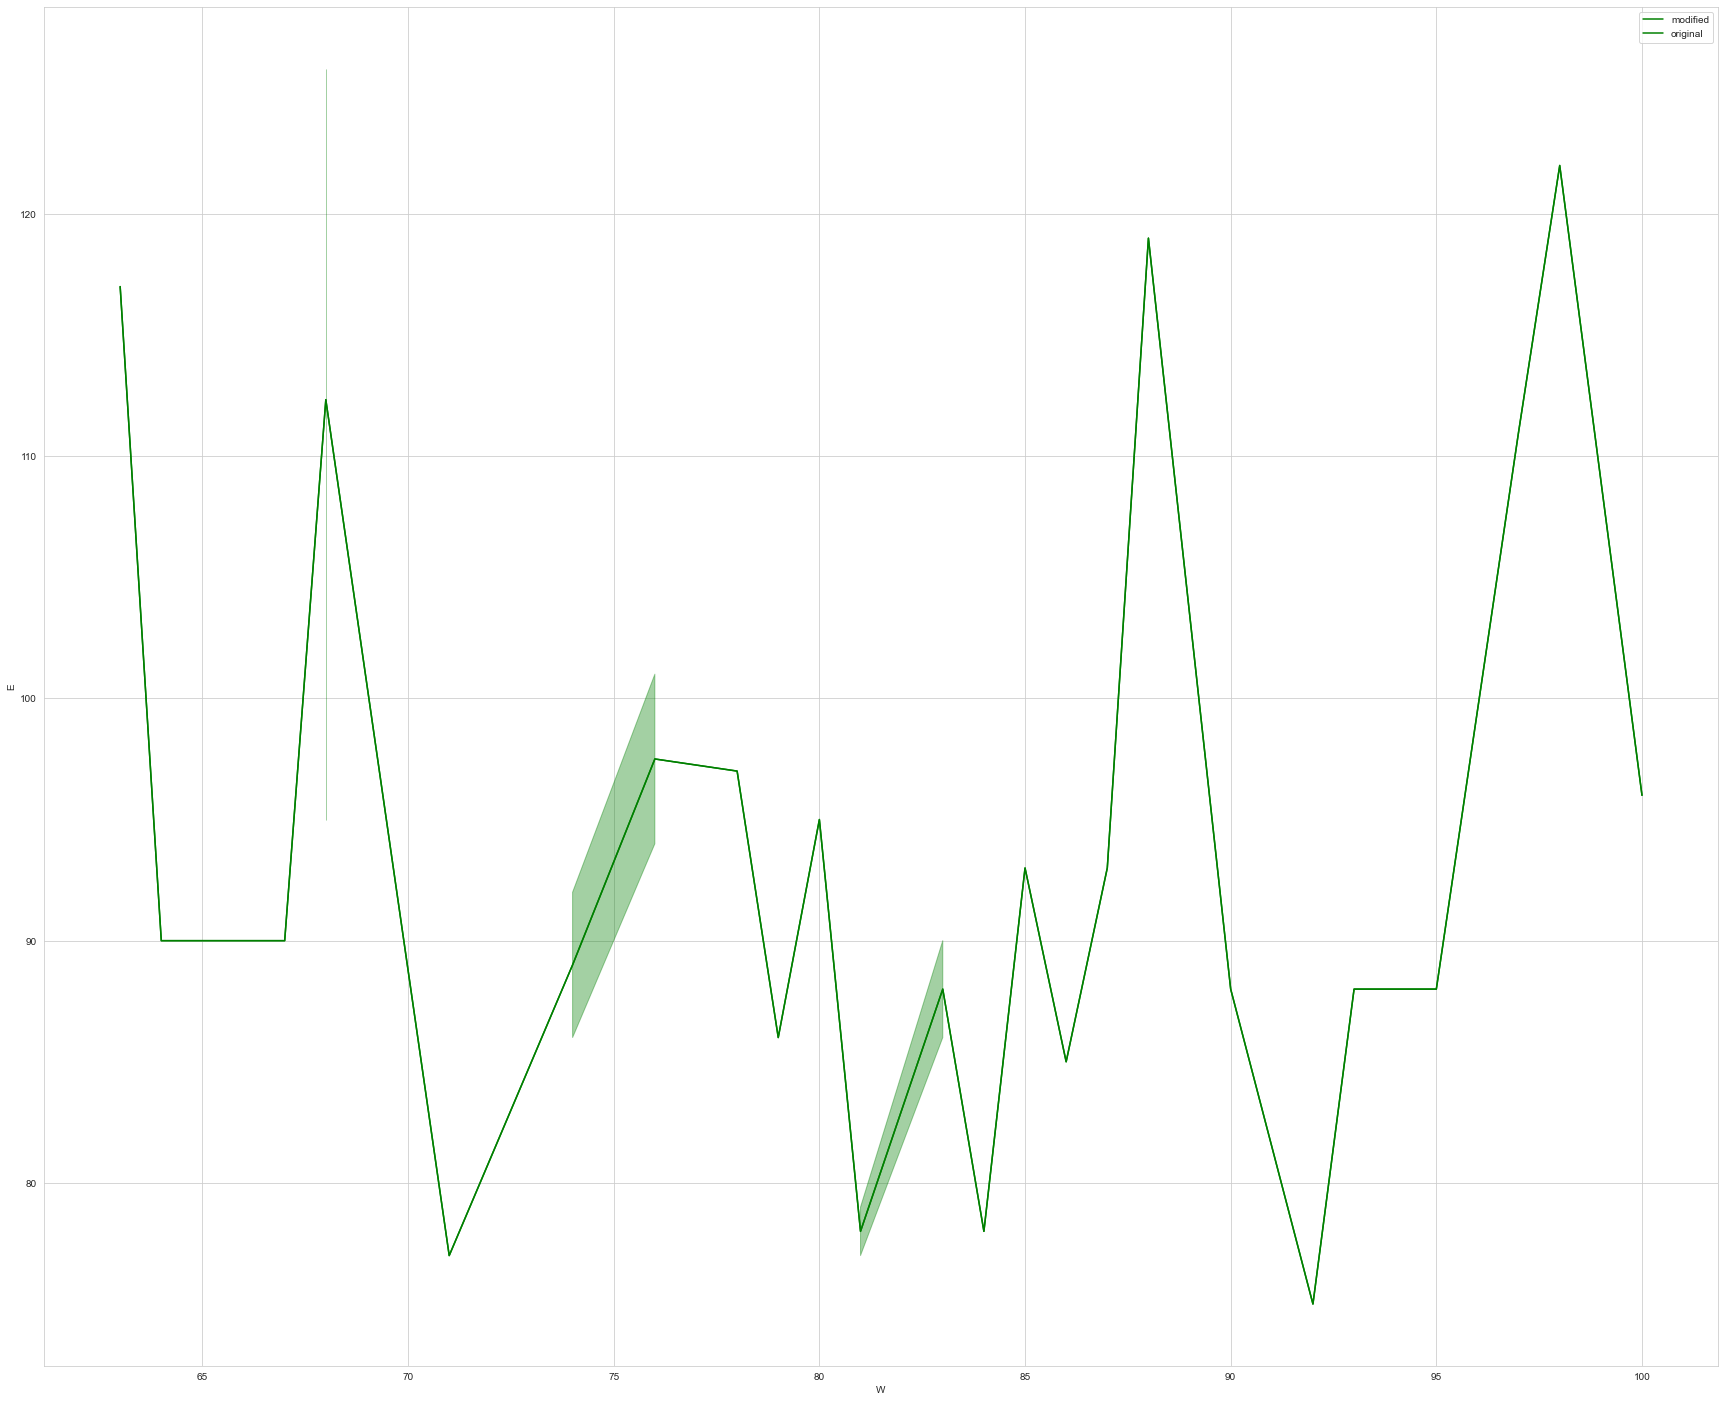

In [119]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df['W'], y=df['E'].interpolate(), color='green', label = 'modified')
sns.lineplot(x=df['W'], y=df['E'].fillna(np.inf), color='green', label = 'original')

<AxesSubplot:xlabel='W', ylabel='E'>

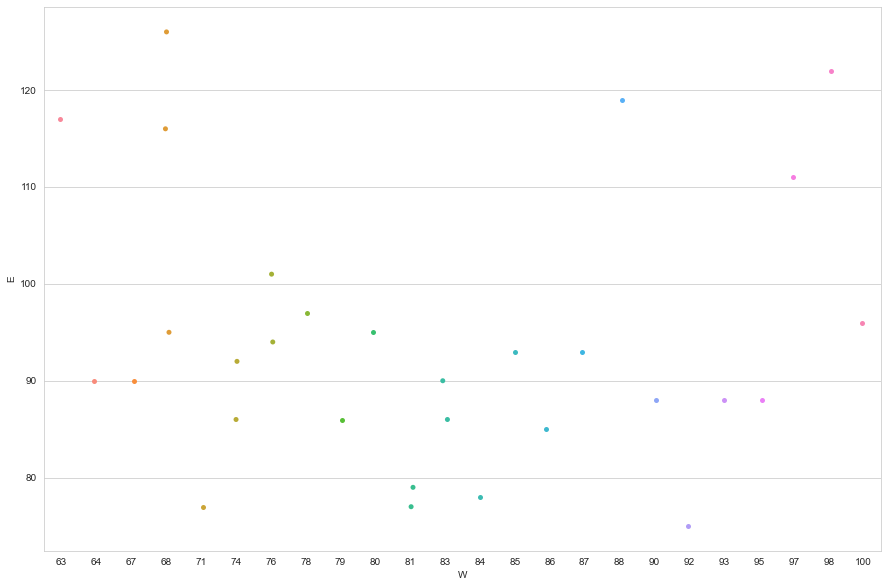

In [121]:
plt.figure(figsize=(15,10))
sns.stripplot(df['W'],df['E'])

#### From The Above Plots And Charts I can see 90 errors have been made in this baseball dataset.

# Using W Label for predicting the Models

In [90]:
# dividing features and label

x = df.drop('W',axis=1)
y = df.W

#### Hence dividing Dataset in Features & labels

## Histogram plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.
#### b)From the shape of the bin, I can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

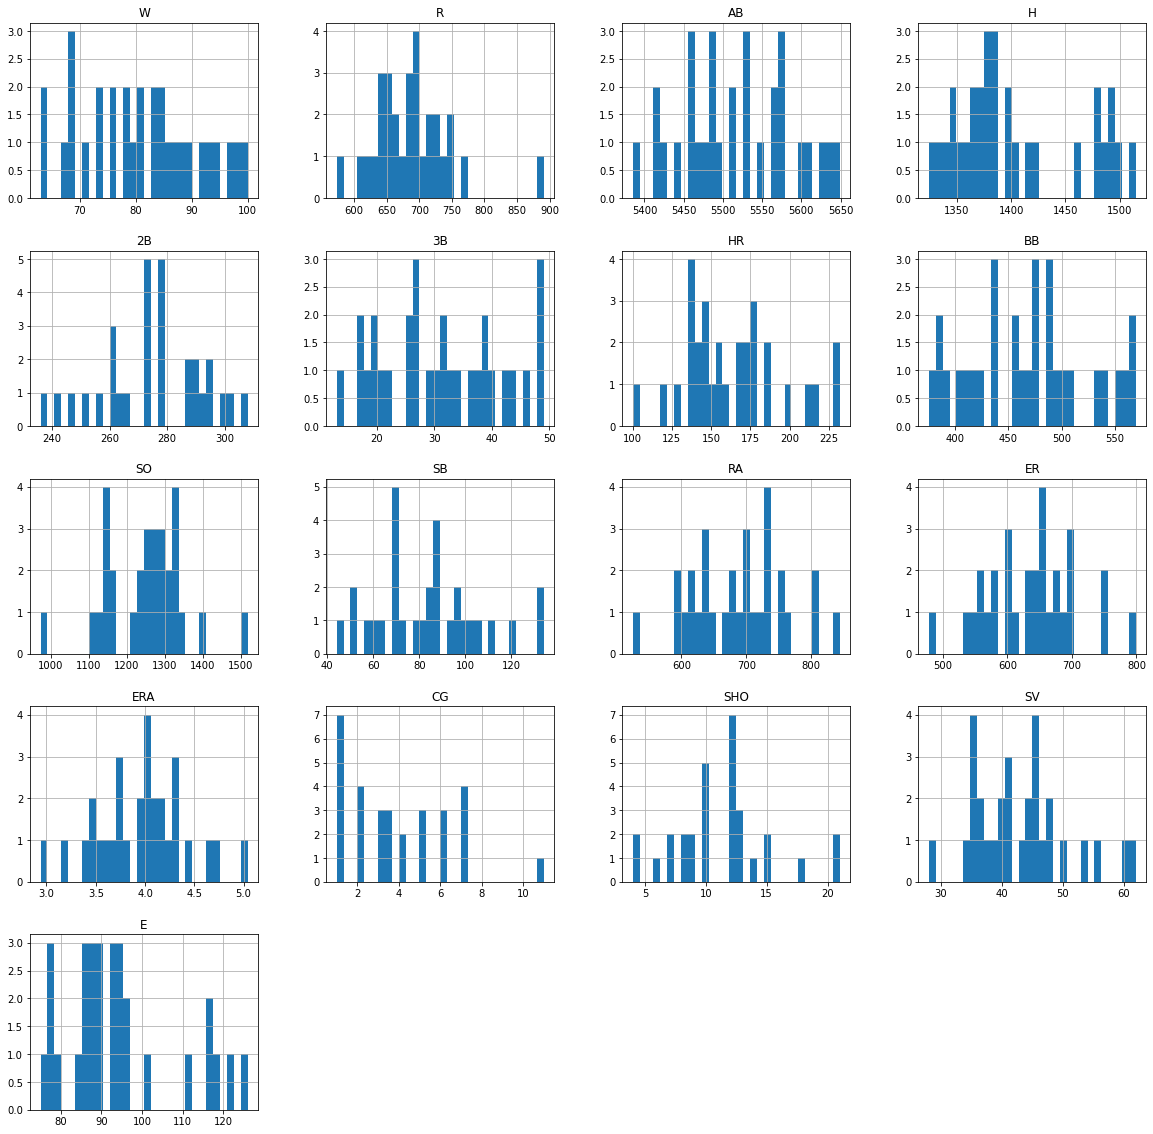

In [91]:
# using the the histogrom plot 

df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

# Factor Plot

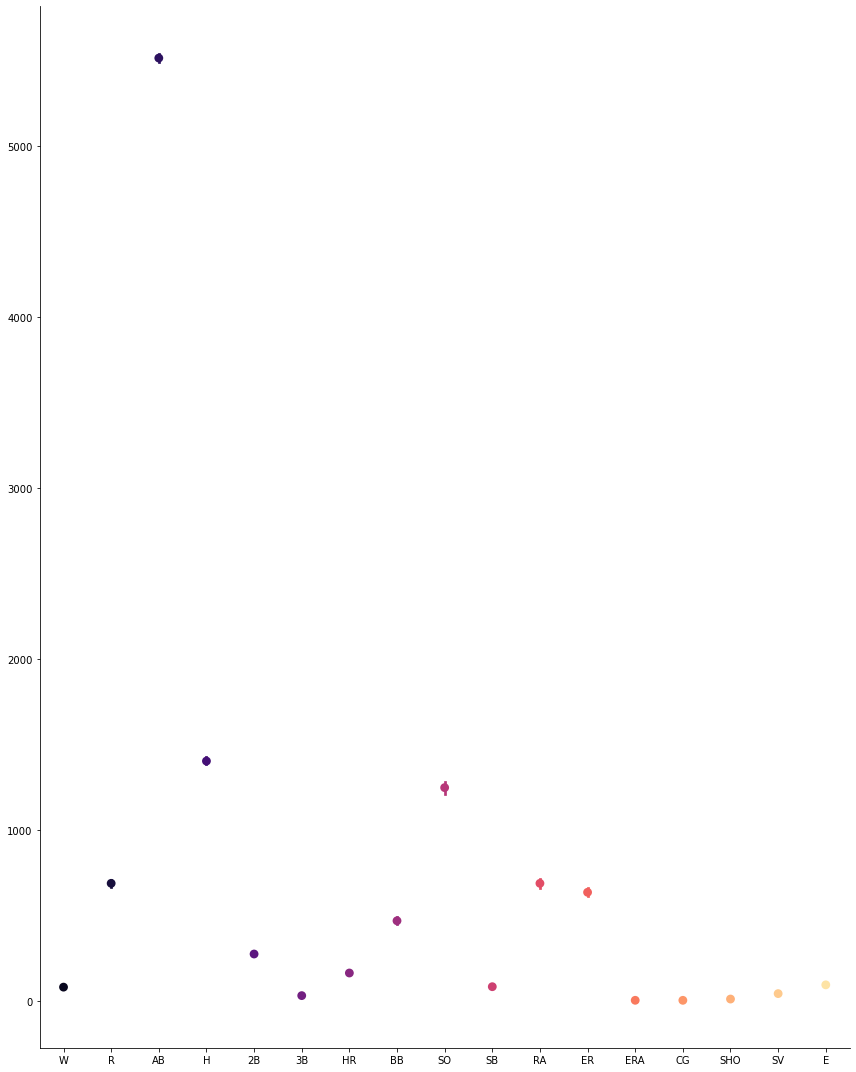

In [19]:
sns.factorplot(data=df,
        
                   aspect=0.8,
                   height=15,
                   size=15,
                   palette='magma',
                   join=False,
              )

## Box Plot

W         AxesSubplot(0.125,0.749828;0.168478x0.130172)
R      AxesSubplot(0.327174,0.749828;0.168478x0.130172)
AB     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
H      AxesSubplot(0.731522,0.749828;0.168478x0.130172)
2B        AxesSubplot(0.125,0.593621;0.168478x0.130172)
3B     AxesSubplot(0.327174,0.593621;0.168478x0.130172)
HR     AxesSubplot(0.529348,0.593621;0.168478x0.130172)
BB     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
SO        AxesSubplot(0.125,0.437414;0.168478x0.130172)
SB     AxesSubplot(0.327174,0.437414;0.168478x0.130172)
RA     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
ER     AxesSubplot(0.731522,0.437414;0.168478x0.130172)
ERA       AxesSubplot(0.125,0.281207;0.168478x0.130172)
CG     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
SHO    AxesSubplot(0.529348,0.281207;0.168478x0.130172)
SV     AxesSubplot(0.731522,0.281207;0.168478x0.130172)
E            AxesSubplot(0.125,0.125;0.168478x0.130172)
dtype: object

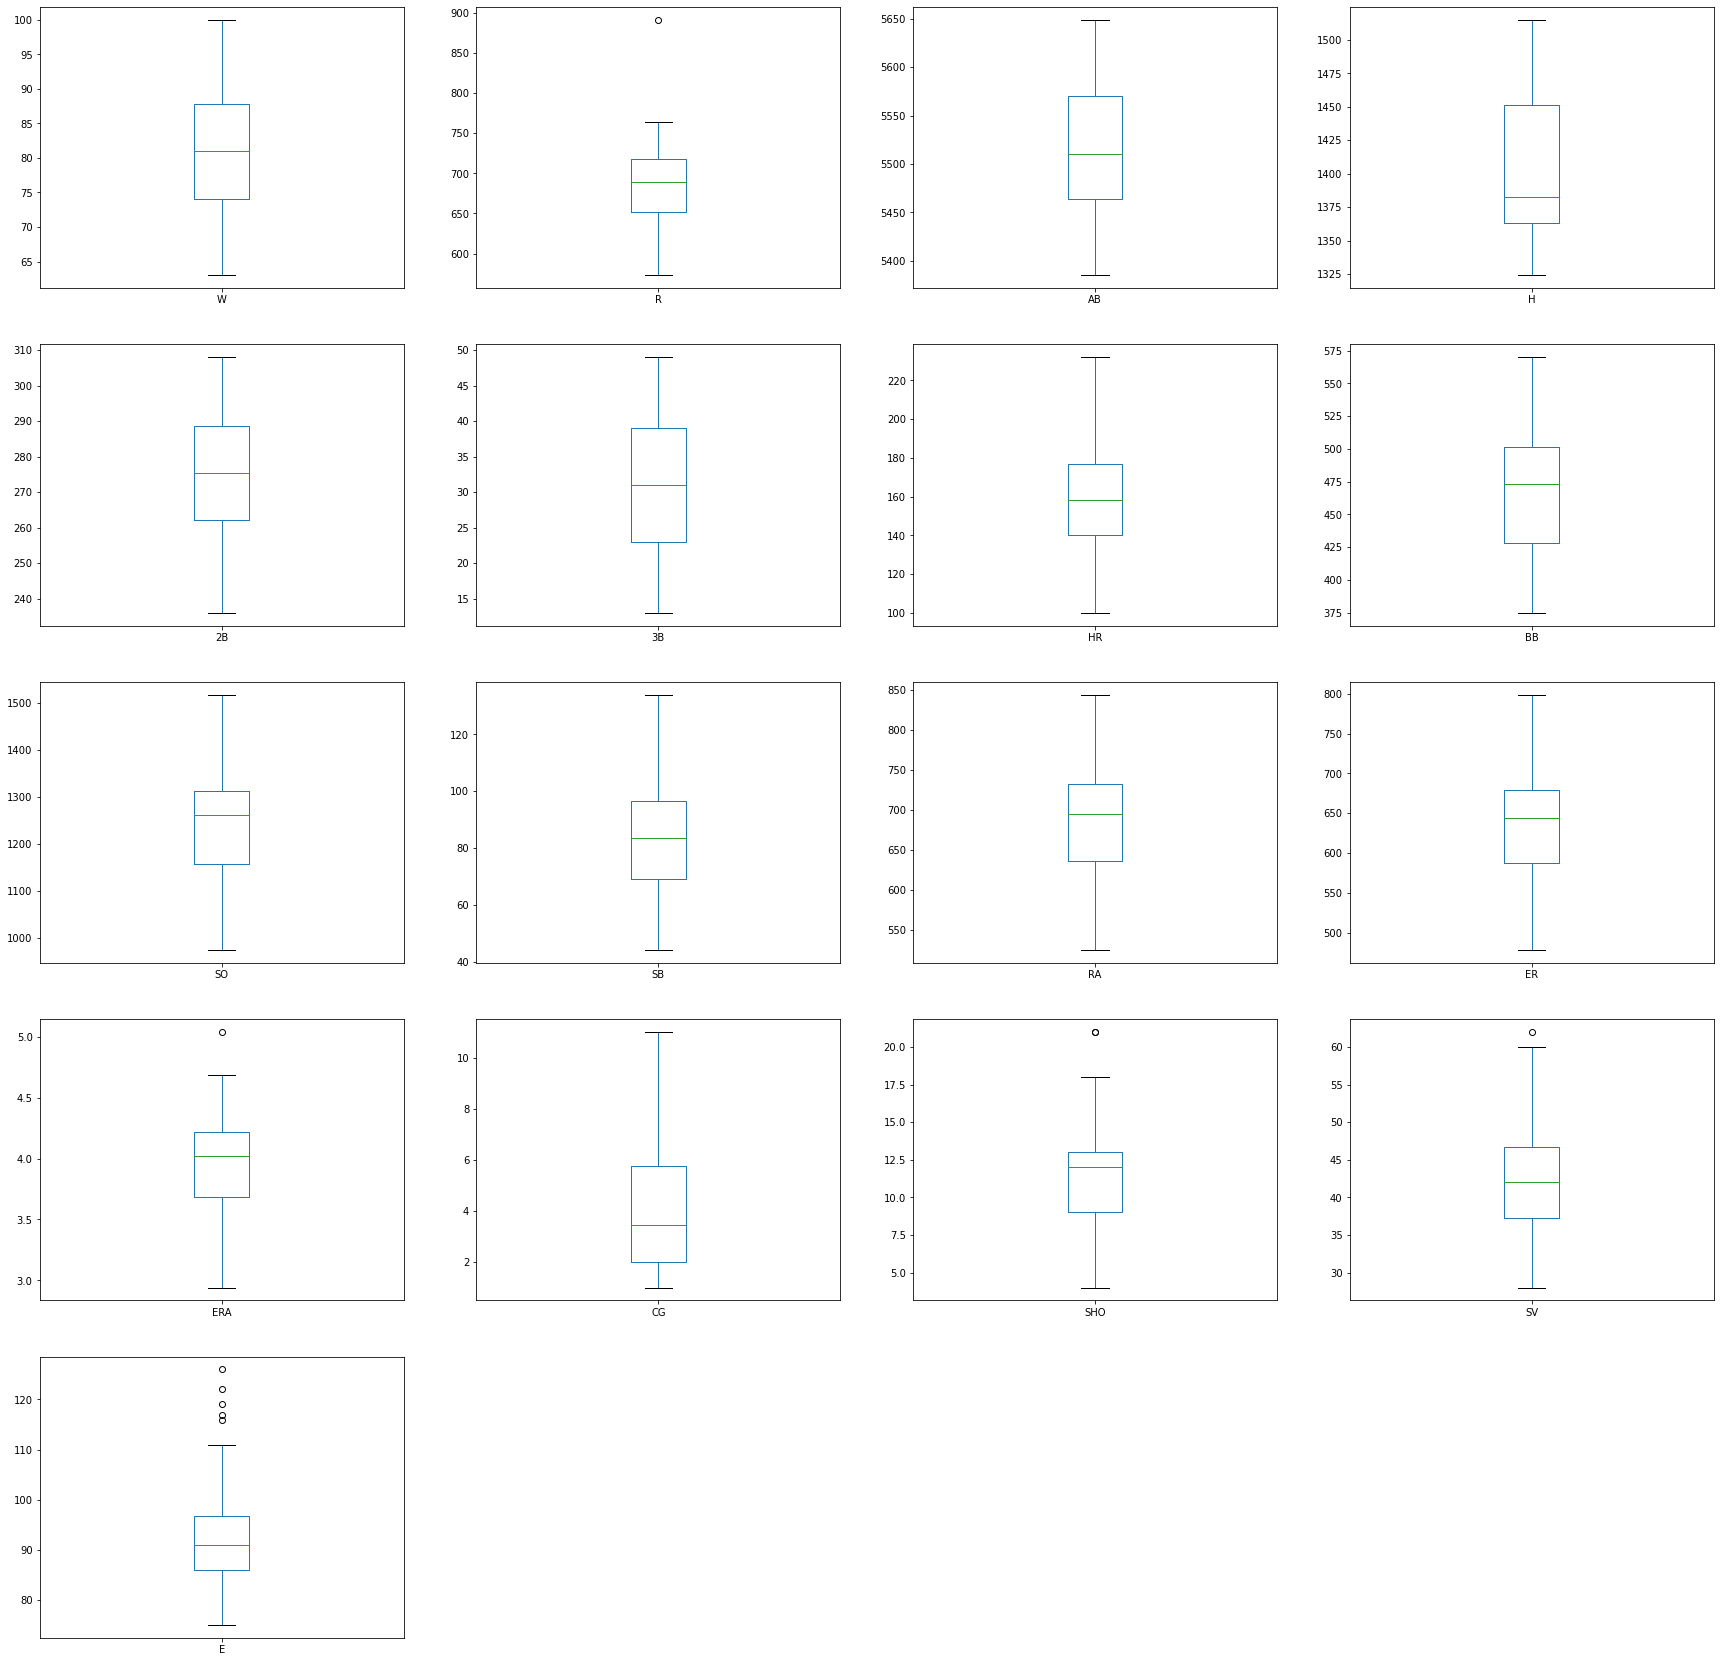

In [92]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))

##### From above image we can clear see that there are no number of black dots.


## StandardScaler

In [93]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.73660011, -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.73660011,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.91931954, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.29446636, -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

#### Applying the standard scaler to scaled the dataset in one range & on x variable.

## VIF - variance inflation factor

#### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [94]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif Features
0     11.328307        R
1     13.179404       AB
2     11.663062        H
3      3.285044       2B
4      3.269002       3B
5     10.033906       HR
6      3.373978       BB
7      2.652991       SO
8      2.153005       SB
9    187.507984       RA
10  1639.932146       ER
11  1214.857975      ERA
12     2.735650       CG
13     3.668974      SHO
14     6.187157       SV
15     2.188195        E

#### According to my concern about vif in this dataset all the values are greater than than 10 and overall model variance there is multicollinearity exists.

# Finding correlation of features vs target using corrwith

In [95]:
df.drop('W',axis=1).corrwith(df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.121311
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

# Visualize the correlation

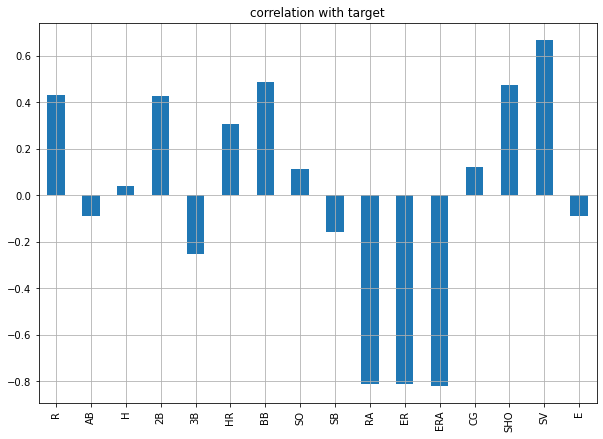

In [96]:
df.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 9 columns are positively related to target value

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.
Denoted by r, it takes values between -1 and +1.

In [97]:
df.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.121311  0.222222 -0.068802  0.197888  0.206027 -0.104248  0.151876   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.121311   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.222222   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.068802   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.197888   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.206027   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.104248   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.151876   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.382151   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.076233   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.015614   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.083073   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.084599   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.072805   
CG   0.382151 -0.076233 -0.015614 -0.083073 -0.084599 -0.072805  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.279482   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.388913   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.178510   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.279482 -0.388913 -0.178510  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

#### Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:
##### Positive correlated value
##### Negative correlated value The most the value is positive means that column is much co related and vice versa.

# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

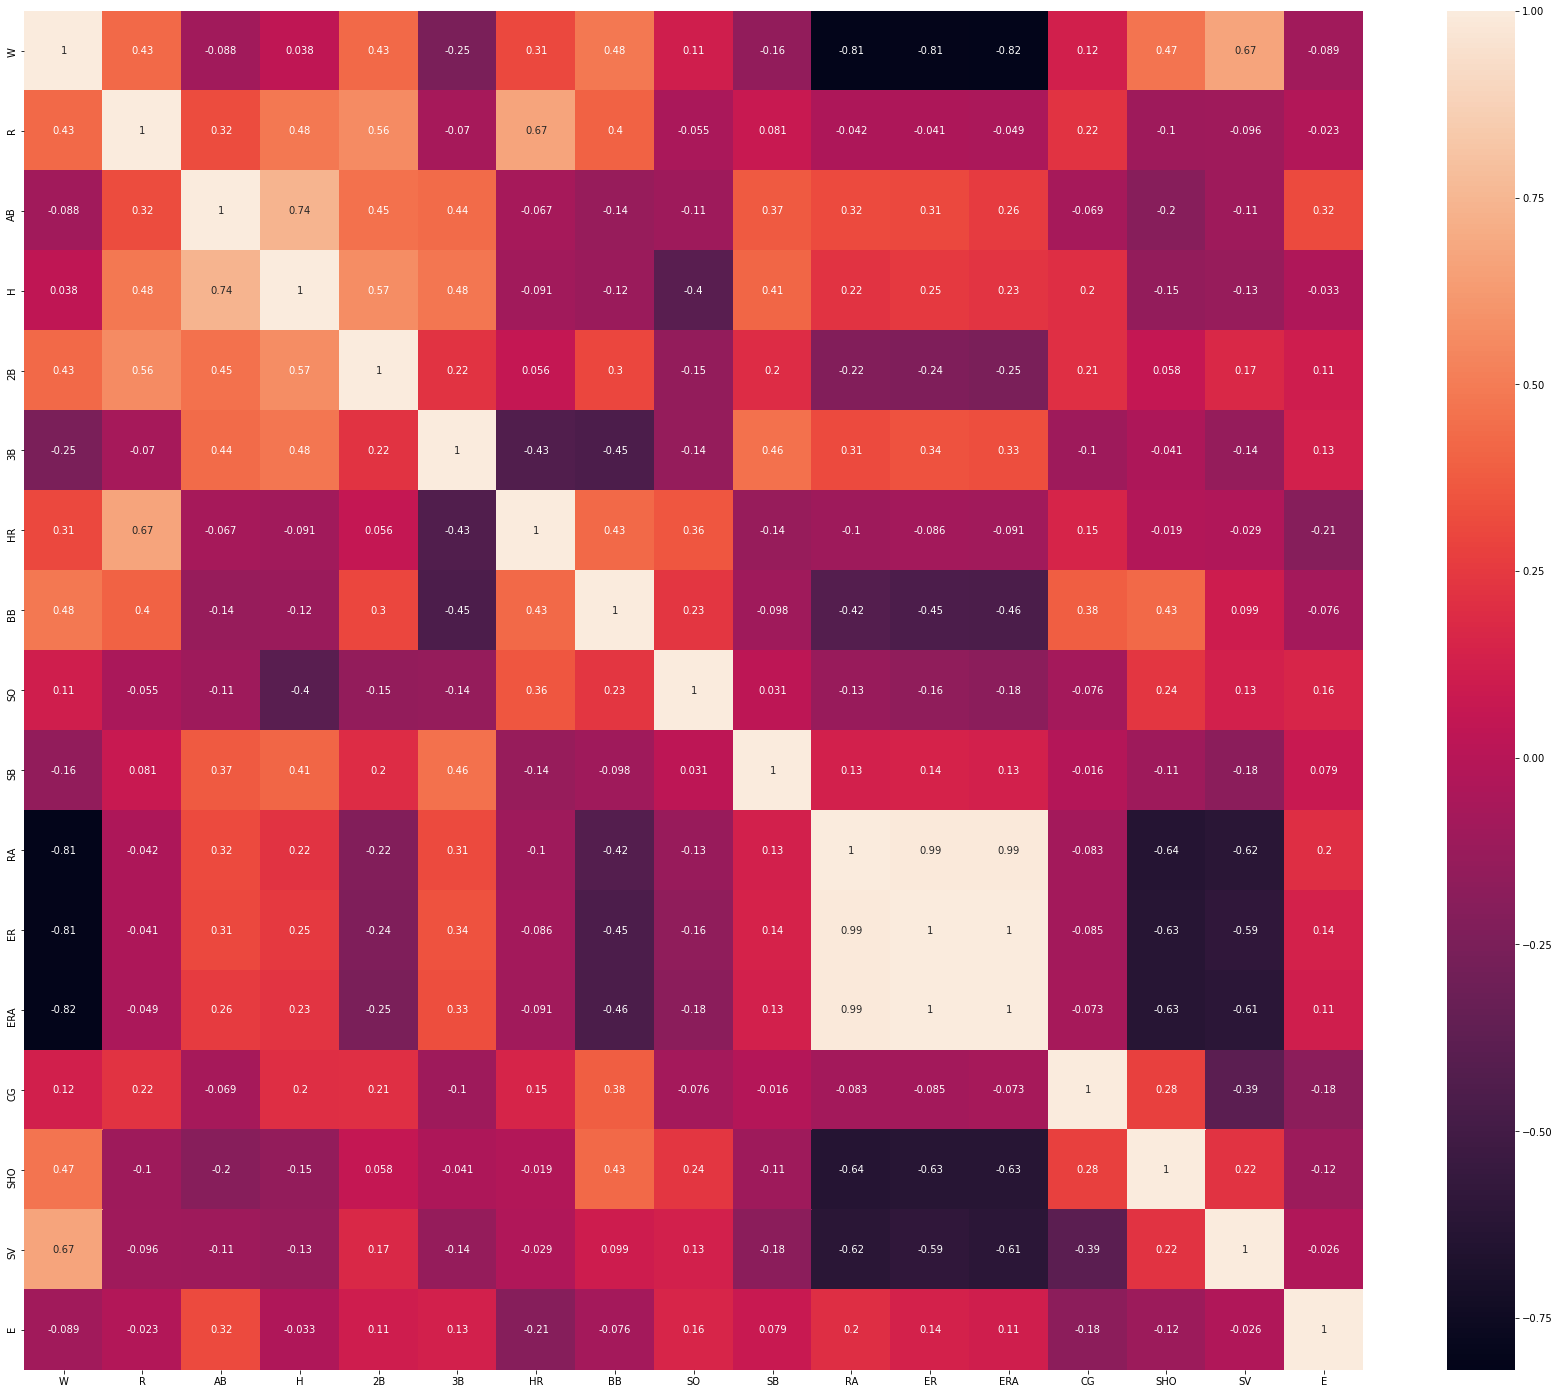

In [98]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# 7. Machine Learning

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
###### So in this dataset while predicting Next_Tmax label first, I have used these Algorithmns for Model Building:
###### a)Linear Regression model
###### b)Random Forest Regressor Model
###### c)Decision Tree Regressor Model
###### d)AdaBoost Regressor

# Train Test Split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset with size 0.25.
#### In this data into training and testing with 75 percent Training and 25 percent testing.

# AdaBoost Regressor

#### An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.
#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [100]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [101]:
# adjusted r2 score
ada.score(x_train,y_train)

0.9915505268472637

In [102]:
ada.score(x_test,y_test)

0.5540652988866437

In [103]:
y_pred = ada.predict(x_test)
y_pred

array([68.85714286, 78.        , 80.        , 68.        , 79.5       ,
       68.        , 85.33333333, 84.        ])

# Scatter plot of AdaBoost Regressor Model

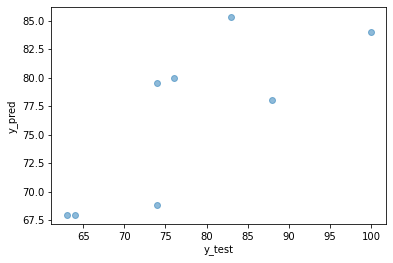

In [104]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [105]:
mean_squared_error(y_test,y_pred)

59.392928004535136

# RMSE

In [106]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.706680738459012

# r2 score

In [107]:
r2_score(y_test,y_pred)

0.5540652988866437

## AdaBoost Regressor Model : 55.40%

#### In prediction AdaBoost Regressor Model with W:
###### I had done this prediction by taking W as an output variable which is continuity in nature so that why I’m using the regression technique.
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of AdaBoost Regressor Model - 55.40%.¶

# Linear Regression model

#### Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

In [108]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

#### First I have to fit the Training data of LinearRegression.

In [109]:
# adjusted r2 score
rg.score(x_train,y_train)

0.9531593809931665

In [110]:
rg.score(x_test,y_test)

0.8876063589004249

In [111]:
y_pred = rg.predict(x_test)
y_pred

array([66.21097391, 84.98468453, 74.42062102, 63.44630053, 77.31055282,
       57.80854299, 85.3677816 , 98.08271723])

# Scatter plot of Linear Regression

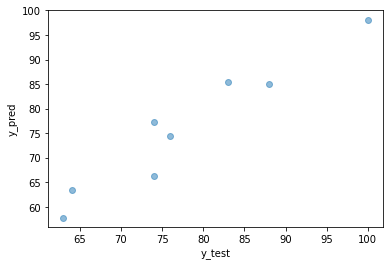

In [112]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [113]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

14.96942807394965

# RMSE

In [114]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.869034514442802

# r2 score

In [115]:
r2_score(y_test,y_pred)

0.8876063589004249

### Linear Regression model - 88.76%

#### In prediction Linear Regression model with W:
#### I had done this prediction by taking W as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Linear Regression model - 88.76%

## Random Forest Regressor Model

#### Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [116]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

#### First I have to fit the Training data of RandomForestRegressor.

In [117]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9203914780901057

In [118]:
rf.score(x_test,y_test)

0.6138111684655092

In [119]:
y_pred = rf.predict(x_test)
y_pred

array([72.69, 76.92, 78.53, 73.78, 74.8 , 68.92, 86.24, 88.22])

# Scatter plot of Random Forest Regressor Model

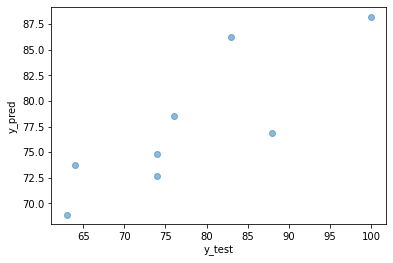

In [120]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [121]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

51.435525

# RMSE

In [122]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.171856454224387

# r2 Score

In [123]:
r2_score(y_test,y_pred)

0.6138111684655092

### Random Forest Regressor Model 61.38%

#### In prediction Random Forest Regressor with W:
#### I had done this prediction by taking W as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Random Forest Regressor - 61.38%

## Decision Tree Regressor Model

#### Decision tree builds regression in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [132]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [133]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [134]:
dt.score(x_test,y_test)

0.5213514781792585

In [135]:
y_pred = dt.predict(x_test)
y_pred

array([78., 78., 68., 78., 68., 68., 86., 92.])

# Scatter plot of Decision Tree Regressor Model

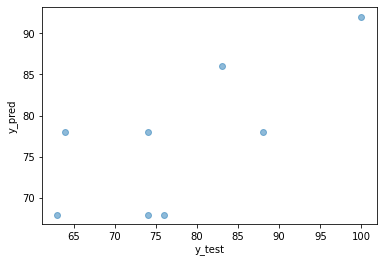

In [136]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Mse

In [137]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

63.75

# Rmse

In [138]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.984359711335656

# r2_score

In [139]:
r2_score(y_test,y_pred)

0.5213514781792585

### Decision Tree Regressor Model - 52.13%

#### In prediction Decision Tree Regressor Modelr with W:
###### I had done this prediction by taking W as an output variable which is continuity in nature so that why I’m using the regression technique.
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Decision Tree Regressor Model - 52.13%

# Regularization

#### A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
#### Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.¶

In [140]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [141]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [142]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.16498349269461635

In [143]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.16498349269461635)

In [144]:
lasso_reg.score(x_test,y_test)

0.8982089855920918

#### I have try to improve the accuracy score by using lasso regularization 89.82% and there is a increase in Accuracy Value.

# Observation

### After using best features with the help of lassocv our lasso score is 89.82% which is more than the score of 3 models predicted above.
### The highest score model is Linear Regression (88.76%), moreover lasso score(89.82%) it means lasso improved the score by 1% which is good.

### According to the above 4 model prediction the best model is  Linear Regression - 88.76%.

## Saving the Best Model

In [146]:
import pickle

In [147]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### After completing Basebaall prediction with W Label I got Linear Regression - 88.76% accuracy score high so I save Linear Regression Model.

# Conclusion

#### I’ll briefly discuss how I approached this problem of predicting baseball.
###### a) I have baseball datastet from which I had to extract information.
###### b) I have done 1 label as the dataset speaks:
           W - Wins

###### c) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
###### d) After from all datasets, I preprocessed the data using replacing all zeros and filling all missing values.
###### e) I did exploratory data analysis on main data frame and tried to see all visualizations.
###### f) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
###### g) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
###### h) After from all these i split the Features & Labels into 2 parts.
###### i) On this data, I have applied our machine learning models such as Linear Regression, Random Forest Reggessor,Decision Tree Regressor and AdaBoostRegressor.
###### j) After which I found Linear Regression - 88.76% has the High r2 score and best among all the models.
###### According to the above 4 model prediction the best model is Linear Regression - 88.76%.